# Front Matter: CASA0013: Foundations of Spatial Data Science

## Title of Briefing

### Student ID

### Word Count:

# Reproducible Analysis

## Classification of Airbnb penetration in London 

This notebook holds the analysis for the classification of Airbnb penetration in London. 
After a first exploration of the datasets with visualisations that seek to quantify the current picture of Airbnb listings in London, the London wards are classified by their amaount of listings (low, medium, large), followed by a geodemographic classification of the neighboorhods that attempts to identify patterns expaining and perhaps predicting the presence or absense of listings. 

Data used for this analysis were obtained from the following sources:
* Airbnb listings, compiled 10 October 2021: <http://insideairbnb.com/get-the-data.html>
* London Wards data: <https://data.london.gov.uk/dataset/ward-profiles-and-atlas>
* London Wards geography: <https://data.london.gov.uk/dataset/statistical-gis-boundary-files-london>

For ease of access the data has been saved in the following github repository: <https://github.com/DaphneBdn/fsds_cw3>

### Libraries

In [1]:
import os
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import seaborn as sns

## Data import

Airbnb Data

In [2]:
# Load in the Airbnb data 
df = pd.read_csv('https://github.com/DaphneBdn/fsds_assessment3/blob/main/Data/raw/listings.csv.gz?raw=true', compression='gzip')
df.head(3)

id                         listing_url       scrape_id last_scraped  \
0  13913  https://www.airbnb.com/rooms/13913  20211010233627   2021-10-12   
1  15400  https://www.airbnb.com/rooms/15400  20211010233627   2021-10-12   
2  17402  https://www.airbnb.com/rooms/17402  20211010233627   2021-10-12   

                                    name  \
0    Holiday London DB Room Let-on going   
1    Bright Chelsea  Apartment. Chelsea!   
2  Superb 3-Bed/2 Bath & Wifi: Trendy W1   

                                         description  \
0  My bright double bedroom with a large window h...   
1  Lots of windows and light.  St Luke's Gardens ...   
2  You'll have a wonderful stay in this superb mo...   

                               neighborhood_overview  \
0  Finsbury Park is a friendly melting pot commun...   
1                                     It is Chelsea.   
2  Location, location, location! You won't find b...   

                                         picture_url  host_id  \
0  https://a0.muscache.com/pictures/miso/Hosting-...    54730   
1  https://a0.muscache.com/pictures/428392/462d26...    60302   
2  https://a0.muscache.com/pictures/39d5309d-fba7...    67564   

                                  host_url  ... review_scores_communication  \
0  https://www.airbnb.com/users/show/54730  ...                        4.89   
1  https://www.airbnb.com/users/show/60302  ...                        4.82   
2  https://www.airbnb.com/users/show/67564  ...                        4.66   

  review_scores_location review_scores_value license instant_bookable  \
0                   4.63                4.74     NaN                f   
1                   4.93                4.73     NaN                f   
2                   4.85                4.59     NaN                f   

  calculated_host_listings_count calculated_host_listings_count_entire_homes  \
0                              2                                           1   
1                              1                                           1   
2                              2                                           2   

  calculated_host_listings_count_private_rooms  \
0                                            1   
1                                            0   
2                                            0   

  calculated_host_listings_count_shared_rooms reviews_per_month  
0                                           0              0.17  
1                                           0              0.79  
2                                           0              0.35  

[3 rows x 74 columns]

In [3]:
# extract the column names
cols=df.columns
print(cols)
print(f"The Inside Airbnb dataset has {len(cols)} columns")

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_upd

### Investigate NA values

In [4]:
# change settings to display all rows
pd.set_option('display.max_rows', None)
# print out the count of NA values per column
df.isna().sum().sort_values(ascending=False)

neighbourhood_group_cleansed                    67903
calendar_updated                                67903
license                                         67903
bathrooms                                       67903
host_response_rate                              34288
host_response_time                              34288
host_acceptance_rate                            33907
host_about                                      30360
neighborhood_overview                           26939
neighbourhood                                   26938
review_scores_value                             20472
review_scores_location                          20468
review_scores_checkin                           20467
review_scores_communication                     20430
review_scores_accuracy                          20427
review_scores_cleanliness                       20415
first_review                                    19028
reviews_per_month                               19028
last_review                 

After inspecting the data the key things to note are: 
* There seem to be no NA values in the longitude and latitude column
* There are xx listings in total
* Date type needs to be adjusted (add here)?
* price column

In [5]:
# change settings back 
pd.reset_option('all')

As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead.

: boolean
    use_inf_as_null had been deprecated and will be removed in a future
    version. Use `use_inf_as_na` instead.



/opt/conda/envs/sds2021/lib/python3.9/site-packages/pandas/_config/config.py:630: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead.
  warnings.warn(d.msg, FutureWarning)
/opt/conda/envs/sds2021/lib/python3.9/site-packages/pandas/_config/config.py:630: FutureWarning: 
: boolean
    use_inf_as_null had been deprecated and will be removed in a future
    version. Use `use_inf_as_na` instead.

  warnings.warn(d.msg, FutureWarning)


In [6]:
# use pandas function replace to replace $ and comma eg $1,000

df["price"]=df.price.str.replace('$','').str.replace(',','').astype('float')
df.head()

/tmp/ipykernel_5615/2720214001.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df["price"]=df.price.str.replace('$','').str.replace(',','').astype('float')


id                         listing_url       scrape_id last_scraped  \
0  13913  https://www.airbnb.com/rooms/13913  20211010233627   2021-10-12   
1  15400  https://www.airbnb.com/rooms/15400  20211010233627   2021-10-12   
2  17402  https://www.airbnb.com/rooms/17402  20211010233627   2021-10-12   
3  17506  https://www.airbnb.com/rooms/17506  20211010233627   2021-10-12   
4  24328  https://www.airbnb.com/rooms/24328  20211010233627   2021-10-12   

                                                name  \
0                Holiday London DB Room Let-on going   
1                Bright Chelsea  Apartment. Chelsea!   
2              Superb 3-Bed/2 Bath & Wifi: Trendy W1   
3  Boutique Chelsea/Fulham Double bed 5-star ensuite   
4  Battersea bedroom & studio, parking, shared ga...   

                                         description  \
0  My bright double bedroom with a large window h...   
1  Lots of windows and light.  St Luke's Gardens ...   
2  You'll have a wonderful stay in this superb mo...   
3  Enjoy a chic stay in this elegant but fully mo...   
4  Artist house, bright high ceiling rooms, priva...   

                               neighborhood_overview  \
0  Finsbury Park is a friendly melting pot commun...   
1                                     It is Chelsea.   
2  Location, location, location! You won't find b...   
3  Fulham is 'villagey' and residential – a real ...   
4  - Battersea is a quiet family area, easy acces...   

                                         picture_url  host_id  \
0  https://a0.muscache.com/pictures/miso/Hosting-...    54730   
1  https://a0.muscache.com/pictures/428392/462d26...    60302   
2  https://a0.muscache.com/pictures/39d5309d-fba7...    67564   
3  https://a0.muscache.com/pictures/11901327/e63d...    67915   
4  https://a0.muscache.com/pictures/c4ffa398-ebfd...    41759   

                                  host_url  ... review_scores_communication  \
0  https://www.airbnb.com/users/show/54730  ...                        4.89   
1  https://www.airbnb.com/users/show/60302  ...                        4.82   
2  https://www.airbnb.com/users/show/67564  ...                        4.66   
3  https://www.airbnb.com/users/show/67915  ...                         NaN   
4  https://www.airbnb.com/users/show/41759  ...                        4.93   

  review_scores_location review_scores_value license instant_bookable  \
0                   4.63                4.74     NaN                f   
1                   4.93                4.73     NaN                f   
2                   4.85                4.59     NaN                f   
3                    NaN                 NaN     NaN                f   
4                   4.58                4.64     NaN                f   

  calculated_host_listings_count calculated_host_listings_count_entire_homes  \
0                              2                                           1   
1                              1                                           1   
2                              2                                           2   
3                              2                                           0   
4                              1                                           1   

  calculated_host_listings_count_private_rooms  \
0                                            1   
1                                            0   
2                                            0   
3                                            2   
4                                            0   

  calculated_host_listings_count_shared_rooms reviews_per_month  
0                                           0              0.17  
1                                           0              0.79  
2                                           0              0.35  
3                                           0               NaN  
4                                           0              0.77  

[5 rows x 74 columns]

In [7]:
# store the columns of interest in a list
sub_cols=['id', 'name',
       'latitude','longitude', 'property_type', 'room_type', 'price',
       'availability_365', 'number_of_reviews_l30d', 'first_review',
       'last_review']

In [8]:
# create a subframe with the stored columns
df= df[sub_cols]
df.set_index('id', inplace=True)
df.head()


name  latitude  longitude  \
id                                                                              
13913                Holiday London DB Room Let-on going  51.56861   -0.11270   
15400                Bright Chelsea  Apartment. Chelsea!  51.48780   -0.16813   
17402              Superb 3-Bed/2 Bath & Wifi: Trendy W1  51.52195   -0.14094   
17506  Boutique Chelsea/Fulham Double bed 5-star ensuite  51.47935   -0.19743   
24328  Battersea bedroom & studio, parking, shared ga...  51.47119   -0.16256   

                     property_type        room_type  price  availability_365  \
id                                                                             
13913  Private room in rental unit     Private room   65.0               339   
15400           Entire rental unit  Entire home/apt   75.0                 2   
17402           Entire rental unit  Entire home/apt  307.0               320   
17506    Private room in townhouse     Private room  150.0               364   
24328             Entire townhouse  Entire home/apt  200.0               273   

       number_of_reviews_l30d first_review last_review  
id                                                      
13913                       0   2011-07-11  2011-09-13  
15400                       0   2012-07-16  2019-08-10  
17402                       0   2011-09-18  2019-11-02  
17506                       0          NaN         NaN  
24328                       0   2011-11-01  2015-10-24

Convert the dataframe(df) into a geodataframe using the epsg code for the World Geodetic System 1984, then convert to British National Grid 

In [9]:
gdf = gpd.GeoDataFrame(df, 
                       geometry=gpd.points_from_xy(df.longitude, df.latitude, 
                       crs= 'epsg:4326'))
gdf = gdf.to_crs('epsg:27700')

<AxesSubplot:>

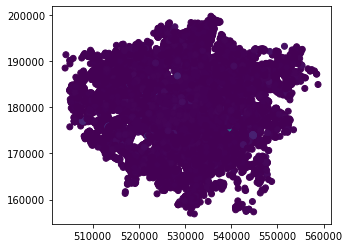

In [10]:
#check the geodataframe with a quick plot
gdf.plot(column="price")

### London Boundary 

create the boundary of London for maps

/opt/conda/envs/sds2021/lib/python3.9/site-packages/geopandas/geodataframe.py:577: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


<AxesSubplot:>

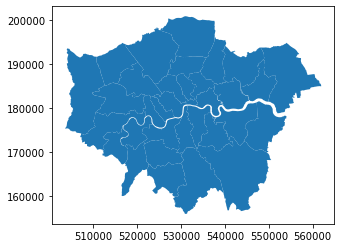

In [11]:
boros = gpd.read_file('https://github.com/jreades/i2p/blob/master/data/src/Boroughs.gpkg?raw=true')
boros.plot()

In [12]:
ldn = gpd.GeoDataFrame(gpd.GeoSeries(data=boros.unary_union, crs='epsg:27700')).rename(columns={0:'original'})


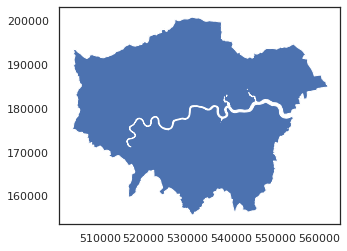

In [648]:
ldn['geometry'] = ldn.original.buffer(20)
ldn_shape = ldn.set_geometry('geometry')
ldn_shape.plot();

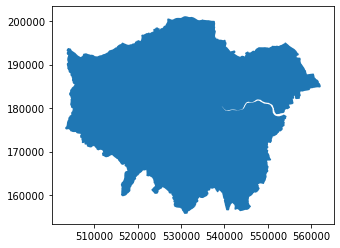

In [13]:
ldn['geometry'] = ldn.original.buffer(200)
ldn = ldn.set_geometry('geometry')
ldn.plot();

Airbnb point map

In [14]:
gdf.head()

name  latitude  longitude  \
id                                                                              
13913                Holiday London DB Room Let-on going  51.56861   -0.11270   
15400                Bright Chelsea  Apartment. Chelsea!  51.48780   -0.16813   
17402              Superb 3-Bed/2 Bath & Wifi: Trendy W1  51.52195   -0.14094   
17506  Boutique Chelsea/Fulham Double bed 5-star ensuite  51.47935   -0.19743   
24328  Battersea bedroom & studio, parking, shared ga...  51.47119   -0.16256   

                     property_type        room_type  price  availability_365  \
id                                                                             
13913  Private room in rental unit     Private room   65.0               339   
15400           Entire rental unit  Entire home/apt   75.0                 2   
17402           Entire rental unit  Entire home/apt  307.0               320   
17506    Private room in townhouse     Private room  150.0               364   
24328             Entire townhouse  Entire home/apt  200.0               273   

       number_of_reviews_l30d first_review last_review  \
id                                                       
13913                       0   2011-07-11  2011-09-13   
15400                       0   2012-07-16  2019-08-10   
17402                       0   2011-09-18  2019-11-02   
17506                       0          NaN         NaN   
24328                       0   2011-11-01  2015-10-24   

                            geometry  
id                                    
13913  POINT (530901.013 187213.787)  
15400  POINT (527284.576 178129.679)  
17402  POINT (529075.790 181974.865)  
17506  POINT (525273.544 177139.513)  
24328  POINT (527717.629 176292.280)

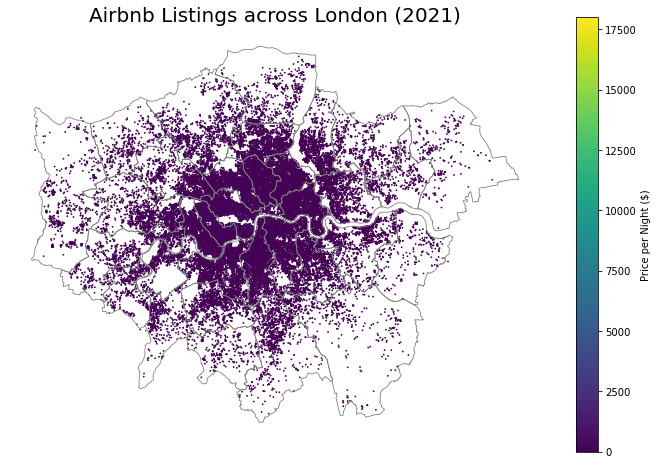

In [15]:
#create a base axis for the plot
fig, ax = plt.subplots(1,1, figsize = (12,8))

#plot the London outline 
boros.boundary.plot(ax=ax, edgecolor = "grey", linewidth=0.8)

#plot the airbnb listings
gdf.plot(ax = ax, column="price", cmap='viridis', markersize = 0.6, legend=True,
         legend_kwds={'label': 'Price per Night ($)'})

#set the axis off
ax.set_axis_off()

#add title
ax.set_title("Airbnb Listings across London (2021)", fontsize = 20)

plt.show()

#plt.savefig("Airbnb_map_dots.png", bbox_inches = 'tight')

In [16]:
# add comparison with a previous year
# add comparison with actieve listings
# add density per Borough or msoa?

In order to filter out the active listings , this analysis will consider the review as indicator. 
Any review in the past year from the date the data was compiled (2021-10-10) will deem the listing active

In [17]:
gdf.sample(4, random_state=42)

name  latitude  \
id                                                                      
42409608            Cosy two bedroom home full of character  51.43951   
39318693      Frills-free yet Clean and Comfortable Bedroom  51.51699   
29555250  Unmissable Luxurious Mews House in Central London  51.49980   
19248360           Wonderful Private room+tea/coffee&sweets  51.53640   

          longitude                        property_type        room_type  \
id                                                                          
42409608   -0.19965                   Entire rental unit  Entire home/apt   
39318693   -0.06882  Private room in condominium (condo)     Private room   
29555250   -0.14976              Entire residential home  Entire home/apt   
19248360    0.01036          Private room in rental unit     Private room   

          price  availability_365  number_of_reviews_l30d first_review  \
id                                                                       
42409608  100.0                 0                       0          NaN   
39318693   17.0                 0                       0   2019-10-25   
29555250  625.0               200                       0   2019-01-11   
19248360   25.0                 0                       0   2017-06-25   

         last_review                       geometry  
id                                                   
42409608         NaN  POINT (525228.295 172705.369)  
39318693  2019-10-27  POINT (534093.520 181552.877)  
29555250  2018-12-19  POINT (528526.190 179496.193)  
19248360  2018-10-11  POINT (539527.700 183859.253)

In [18]:
print(f"gdf now contains {gdf.shape[0]} rows.")

gdf now contains 67903 rows.


In [19]:
# first drop the NaN values fro the "last review" column
gdf.drop(gdf[gdf.last_review.isna()].index.values, axis=0, inplace=True)


In [20]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 48875 entries, 13913 to 52669884
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   name                    48867 non-null  object  
 1   latitude                48875 non-null  float64 
 2   longitude               48875 non-null  float64 
 3   property_type           48875 non-null  object  
 4   room_type               48875 non-null  object  
 5   price                   48875 non-null  float64 
 6   availability_365        48875 non-null  int64   
 7   number_of_reviews_l30d  48875 non-null  int64   
 8   first_review            48875 non-null  object  
 9   last_review             48875 non-null  object  
 10  geometry                48875 non-null  geometry
dtypes: float64(3), geometry(1), int64(2), object(5)
memory usage: 4.5+ MB


In [21]:
gdf["last_review "]= pd.to_datetime(gdf["last_review"], format='%Y-%m-%d')

In [22]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 48875 entries, 13913 to 52669884
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   name                    48867 non-null  object        
 1   latitude                48875 non-null  float64       
 2   longitude               48875 non-null  float64       
 3   property_type           48875 non-null  object        
 4   room_type               48875 non-null  object        
 5   price                   48875 non-null  float64       
 6   availability_365        48875 non-null  int64         
 7   number_of_reviews_l30d  48875 non-null  int64         
 8   first_review            48875 non-null  object        
 9   last_review             48875 non-null  object        
 10  geometry                48875 non-null  geometry      
 11  last_review             48875 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(3

In [23]:
# Filter for active listings
active_gdf = gdf.loc[gdf["last_review"] >= '2020-10-10']

# Display
active_gdf.sample(4, random_state=42)

name  latitude  \
id                                                                      
7019406                Spacious Classy Portobello Apartment  51.52359   
51033334      Superb 1 Bed Flat - Brick Lane (Free Parking)  51.52397   
47173303                    Beautiful room in Little Venice  51.52274   
26120791  Clean and Spacious Balcony Room - 15m to Hyde ...  51.53076   

          longitude                        property_type        room_type  \
id                                                                          
7019406    -0.20824                   Entire rental unit  Entire home/apt   
51033334   -0.06481           Entire condominium (condo)  Entire home/apt   
47173303   -0.19467  Private room in condominium (condo)     Private room   
26120791   -0.18641          Private room in rental unit     Private room   

          price  availability_365  number_of_reviews_l30d first_review  \
id                                                                       
7019406   170.0               365                       0   2018-08-06   
51033334  110.0                 0                       1   2021-07-26   
47173303   40.0                11                       0   2020-12-27   
26120791   50.0               115                       0   2018-07-16   

         last_review                       geometry last_review   
id                                                                
7019406   2021-06-29  POINT (524402.487 182040.773)   2021-06-29  
51033334  2021-10-04  POINT (534351.206 182336.422)   2021-10-04  
47173303  2021-05-25  POINT (525346.187 181969.387)   2021-05-25  
26120791  2021-07-24  POINT (525897.098 182875.417)   2021-07-24

In [24]:
print(f"active_gdf contains {active_gdf.shape[0]} rows.")

active_gdf contains 13577 rows.


### Comparison map 

NOTE: change colours

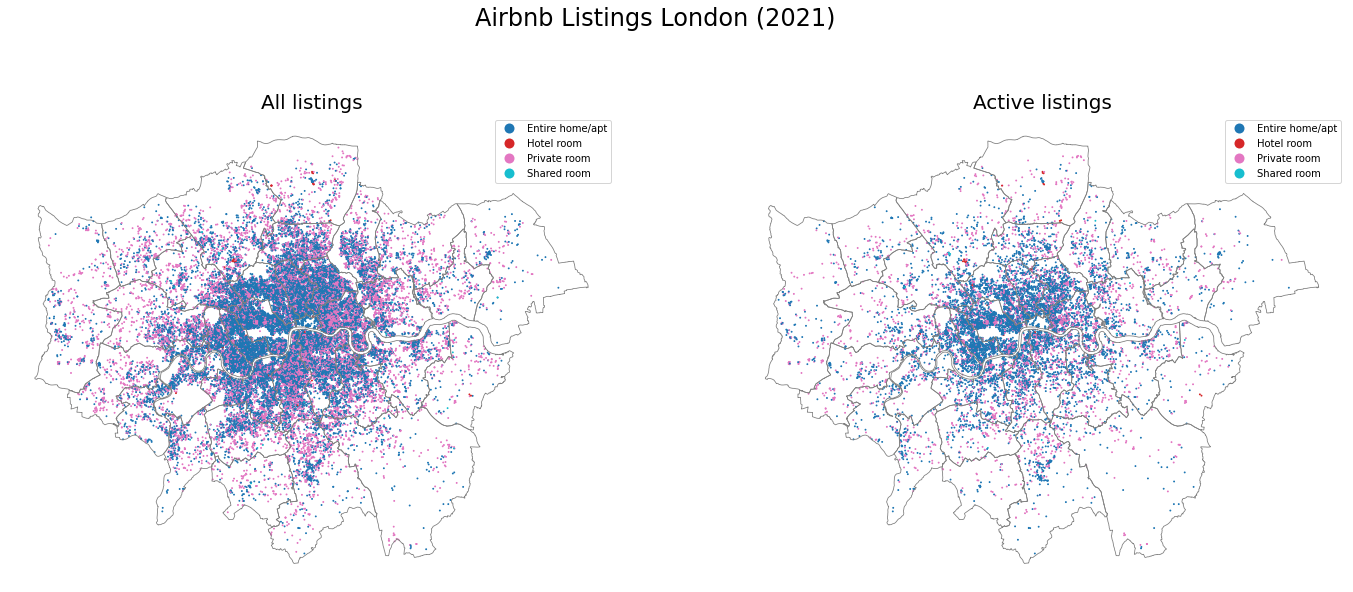

In [25]:
#create a base axis for the plot
fig, axes = plt.subplots(1,2, figsize = (24,16))

plt1 = 'All listings'
plt2 = 'Active listings'

#plot the London outline 
boros.boundary.plot(ax=axes[0], edgecolor = "grey", linewidth=0.8)
#plot the airbnb listings
gdf.plot(ax = axes[0], column="room_type" , cmap='tab10', markersize = 0.8, legend=True)

#plot the London outline 
boros.boundary.plot(ax=axes[1], edgecolor = "grey", linewidth=0.8)
#plot the active airbnb listings
active_gdf.plot(ax = axes[1], column="room_type", cmap='tab10', markersize = 0.8, legend=True)


#set the axis off
for ax in axes:
    ax.axis('off')

#add title

fig.suptitle('Airbnb Listings London (2021)', y=0.8,ha='center', size=24)
axes[0].set_title(plt1.capitalize(), size=20)
axes[1].set_title(plt2.capitalize(), size=20)

#plt.show()

plt.savefig("Active_Airbnb_map_comparison_dots.png", bbox_inches = 'tight')

In [26]:
### London Spatial Units (MSOAS)

<AxesSubplot:>

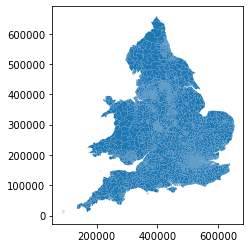

In [27]:
# Load in the MSOA data from the practicals. Tried using the file in uploaded to github repo, but it didnt work.
msoas = gpd.read_file('https://github.com/jreades/i2p/blob/master/data/src/Middle_Layer_Super_Output_Areas__December_2011__EW_BGC_V2-shp.zip?raw=true')
msoas.plot()

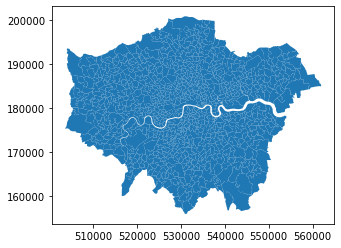

In [28]:
ldn_msoas = gpd.sjoin(msoas, ldn, op='within')
ldn_msoas.plot();

In [29]:
# delete the UK msoa data
del(msoas)

In [30]:
ldn_msoas.head()

OBJECTID   MSOA11CD                  MSOA11NM                 MSOA11NMW  \
0         1  E02000001        City of London 001        City of London 001   
1         2  E02000002  Barking and Dagenham 001  Barking and Dagenham 001   
2         3  E02000003  Barking and Dagenham 002  Barking and Dagenham 002   
3         4  E02000004  Barking and Dagenham 003  Barking and Dagenham 003   
4         5  E02000005  Barking and Dagenham 004  Barking and Dagenham 004   

    BNG_E   BNG_N      LONG       LAT    Shape__Are   Shape__Len  \
0  532384  181355 -0.093490  51.51561  2.906361e+06  8936.818478   
1  548267  189685  0.138756  51.58652  2.166163e+06  8150.405928   
2  548259  188520  0.138149  51.57605  2.143568e+06  9118.196243   
3  551004  186412  0.176828  51.55638  2.491467e+06  8206.551627   
4  548733  186824  0.144267  51.56069  1.186053e+06  6949.688798   

                                            geometry  index_right  \
0  POLYGON ((532135.138 182198.131, 532158.250 18...            0   
1  POLYGON ((548881.563 190845.265, 548881.125 19...            0   
2  POLYGON ((549102.438 189324.625, 548954.517 18...            0   
3  POLYGON ((551550.056 187364.705, 551478.000 18...            0   
4  POLYGON ((549099.634 187656.076, 549161.375 18...            0   

                                            original  
0  POLYGON ((534747.800 159517.800, 534588.000 15...  
1  POLYGON ((534747.800 159517.800, 534588.000 15...  
2  POLYGON ((534747.800 159517.800, 534588.000 15...  
3  POLYGON ((534747.800 159517.800, 534588.000 15...  
4  POLYGON ((534747.800 159517.800, 534588.000 15...

In [31]:
# tidy up the msoas 
keep= ["MSOA11CD", "MSOA11NM","Shape__Are","geometry"]
ldn_msoas= ldn_msoas[keep]
ldn_msoas.head()

MSOA11CD                  MSOA11NM    Shape__Are  \
0  E02000001        City of London 001  2.906361e+06   
1  E02000002  Barking and Dagenham 001  2.166163e+06   
2  E02000003  Barking and Dagenham 002  2.143568e+06   
3  E02000004  Barking and Dagenham 003  2.491467e+06   
4  E02000005  Barking and Dagenham 004  1.186053e+06   

                                            geometry  
0  POLYGON ((532135.138 182198.131, 532158.250 18...  
1  POLYGON ((548881.563 190845.265, 548881.125 19...  
2  POLYGON ((549102.438 189324.625, 548954.517 18...  
3  POLYGON ((551550.056 187364.705, 551478.000 18...  
4  POLYGON ((549099.634 187656.076, 549161.375 18...

<AxesSubplot:>

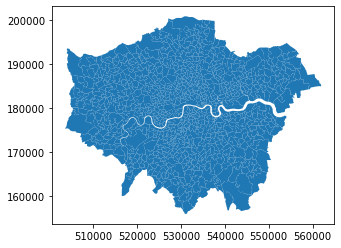

In [32]:
ldn_msoas.plot()

In [33]:
gdf.head()

name  latitude  longitude  \
id                                                                              
13913                Holiday London DB Room Let-on going  51.56861   -0.11270   
15400                Bright Chelsea  Apartment. Chelsea!  51.48780   -0.16813   
17402              Superb 3-Bed/2 Bath & Wifi: Trendy W1  51.52195   -0.14094   
24328  Battersea bedroom & studio, parking, shared ga...  51.47119   -0.16256   
25123                  Clean big Room in London (Room 1)  51.57438   -0.21081   

                          property_type        room_type  price  \
id                                                                
13913       Private room in rental unit     Private room   65.0   
15400                Entire rental unit  Entire home/apt   75.0   
17402                Entire rental unit  Entire home/apt  307.0   
24328                  Entire townhouse  Entire home/apt  200.0   
25123  Private room in residential home     Private room   29.0   

       availability_365  number_of_reviews_l30d first_review last_review  \
id                                                                         
13913               339                       0   2011-07-11  2011-09-13   
15400                 2                       0   2012-07-16  2019-08-10   
17402               320                       0   2011-09-18  2019-11-02   
24328               273                       0   2011-11-01  2015-10-24   
25123                 0                       0   2010-09-01  2018-08-06   

                            geometry last_review   
id                                                 
13913  POINT (530901.013 187213.787)   2011-09-13  
15400  POINT (527284.576 178129.679)   2019-08-10  
17402  POINT (529075.790 181974.865)   2019-11-02  
24328  POINT (527717.629 176292.280)   2015-10-24  
25123  POINT (524086.053 187684.528)   2018-08-06

### listings per msoa

In [34]:
joined = gpd.sjoin(gdf, ldn_msoas, how='right', op='within')
joined.head()

index_left                                               name  latitude  \
0  16688976.0                     Amazing flat near Tower Bridge  51.51061   
0  44654884.0  Special Modern One Bedroom in the City of London!  51.51098   
0  16836451.0          Beautiful apartment in the City of London  51.51100   
0  24806405.0  Double room with private bathroom at Tower Bridge  51.51106   
0  10064124.0     The Tower Luxury Studio & Sofa Bed - Best Area  51.51113   

   longitude                        property_type        room_type  price  \
0   -0.07319                   Entire rental unit  Entire home/apt   67.0   
0   -0.07381                   Entire rental unit  Entire home/apt  110.0   
0   -0.07332                   Entire rental unit  Entire home/apt   95.0   
0   -0.07364  Private room in condominium (condo)     Private room   92.0   
0   -0.07288            Entire serviced apartment  Entire home/apt   90.0   

   availability_365  number_of_reviews_l30d first_review last_review  \
0               0.0                     0.0   2017-10-24  2018-07-08   
0             266.0                     0.0   2021-05-08  2021-05-08   
0             241.0                     0.0   2017-09-12  2017-09-12   
0               0.0                     0.0   2018-05-19  2018-12-09   
0             291.0                     2.0   2016-04-23  2018-02-01   

  last_review    MSOA11CD            MSOA11NM    Shape__Are  \
0   2018-07-08  E02000001  City of London 001  2.906361e+06   
0   2021-05-08  E02000001  City of London 001  2.906361e+06   
0   2017-09-12  E02000001  City of London 001  2.906361e+06   
0   2018-12-09  E02000001  City of London 001  2.906361e+06   
0   2018-02-01  E02000001  City of London 001  2.906361e+06   

                                            geometry  
0  POLYGON ((532135.138 182198.131, 532158.250 18...  
0  POLYGON ((532135.138 182198.131, 532158.250 18...  
0  POLYGON ((532135.138 182198.131, 532158.250 18...  
0  POLYGON ((532135.138 182198.131, 532158.250 18...  
0  POLYGON ((532135.138 182198.131, 532158.250 18...

In [35]:
#insert new columns

# count of listings per msoa
joined["listings_count"]=joined.groupby(["MSOA11CD"])["index_left"].transform("count")

In [36]:
#calculate density of listings per ward

joined["listings_density"]=joined["listings_count"]/joined["Shape__Are"]*10000
joined.head()


index_left                                               name  latitude  \
0  16688976.0                     Amazing flat near Tower Bridge  51.51061   
0  44654884.0  Special Modern One Bedroom in the City of London!  51.51098   
0  16836451.0          Beautiful apartment in the City of London  51.51100   
0  24806405.0  Double room with private bathroom at Tower Bridge  51.51106   
0  10064124.0     The Tower Luxury Studio & Sofa Bed - Best Area  51.51113   

   longitude                        property_type        room_type  price  \
0   -0.07319                   Entire rental unit  Entire home/apt   67.0   
0   -0.07381                   Entire rental unit  Entire home/apt  110.0   
0   -0.07332                   Entire rental unit  Entire home/apt   95.0   
0   -0.07364  Private room in condominium (condo)     Private room   92.0   
0   -0.07288            Entire serviced apartment  Entire home/apt   90.0   

   availability_365  number_of_reviews_l30d first_review last_review  \
0               0.0                     0.0   2017-10-24  2018-07-08   
0             266.0                     0.0   2021-05-08  2021-05-08   
0             241.0                     0.0   2017-09-12  2017-09-12   
0               0.0                     0.0   2018-05-19  2018-12-09   
0             291.0                     2.0   2016-04-23  2018-02-01   

  last_review    MSOA11CD            MSOA11NM    Shape__Are  \
0   2018-07-08  E02000001  City of London 001  2.906361e+06   
0   2021-05-08  E02000001  City of London 001  2.906361e+06   
0   2017-09-12  E02000001  City of London 001  2.906361e+06   
0   2018-12-09  E02000001  City of London 001  2.906361e+06   
0   2018-02-01  E02000001  City of London 001  2.906361e+06   

                                            geometry  listings_count  \
0  POLYGON ((532135.138 182198.131, 532158.250 18...             249   
0  POLYGON ((532135.138 182198.131, 532158.250 18...             249   
0  POLYGON ((532135.138 182198.131, 532158.250 18...             249   
0  POLYGON ((532135.138 182198.131, 532158.250 18...             249   
0  POLYGON ((532135.138 182198.131, 532158.250 18...             249   

   listings_density  
0          0.856741  
0          0.856741  
0          0.856741  
0          0.856741  
0          0.856741

In [37]:
#Some msoas have no listings which will result in 0 values 
(joined['listings_count']==0).sum()

5

In [38]:
joined.loc[joined['listings_count']==0]

index_left name  latitude  longitude property_type room_type  price  \
156         NaN  NaN       NaN        NaN           NaN       NaN    NaN   
222         NaN  NaN       NaN        NaN           NaN       NaN    NaN   
459         NaN  NaN       NaN        NaN           NaN       NaN    NaN   
479         NaN  NaN       NaN        NaN           NaN       NaN    NaN   
817         NaN  NaN       NaN        NaN           NaN       NaN    NaN   

     availability_365  number_of_reviews_l30d first_review last_review  \
156               NaN                     NaN          NaN         NaN   
222               NaN                     NaN          NaN         NaN   
459               NaN                     NaN          NaN         NaN   
479               NaN                     NaN          NaN         NaN   
817               NaN                     NaN          NaN         NaN   

    last_review    MSOA11CD        MSOA11NM    Shape__Are  \
156          NaT  E02000161     Bromley 035  1.725063e+06   
222          NaT  E02000229     Croydon 036  1.322178e+06   
459          NaT  E02000478    Havering 015  2.486474e+06   
479          NaT  E02000498  Hillingdon 005  3.143722e+06   
817          NaT  E02000848      Sutton 009  1.154120e+06   

                                              geometry  listings_count  \
156  POLYGON ((545600.775 165674.398, 545702.779 16...               0   
222  POLYGON ((538964.976 162500.106, 538977.000 16...               0   
459  POLYGON ((554425.877 189182.586, 554381.056 18...               0   
479  POLYGON ((507930.801 189781.169, 508161.678 18...               0   
817  POLYGON ((524013.202 165651.568, 524025.533 16...               0   

     listings_density  
156               0.0  
222               0.0  
459               0.0  
479               0.0  
817               0.0

In [39]:
# change the 0 values to 0.0001 in the listings_density columns so that log transformation will work

for x in joined.loc[joined['listings_count']==0].index:
    joined.at[x,"listings_density"]=0.0001

In [40]:
# check it worked
joined.loc[joined['listings_count']==0]

index_left name  latitude  longitude property_type room_type  price  \
156         NaN  NaN       NaN        NaN           NaN       NaN    NaN   
222         NaN  NaN       NaN        NaN           NaN       NaN    NaN   
459         NaN  NaN       NaN        NaN           NaN       NaN    NaN   
479         NaN  NaN       NaN        NaN           NaN       NaN    NaN   
817         NaN  NaN       NaN        NaN           NaN       NaN    NaN   

     availability_365  number_of_reviews_l30d first_review last_review  \
156               NaN                     NaN          NaN         NaN   
222               NaN                     NaN          NaN         NaN   
459               NaN                     NaN          NaN         NaN   
479               NaN                     NaN          NaN         NaN   
817               NaN                     NaN          NaN         NaN   

    last_review    MSOA11CD        MSOA11NM    Shape__Are  \
156          NaT  E02000161     Bromley 035  1.725063e+06   
222          NaT  E02000229     Croydon 036  1.322178e+06   
459          NaT  E02000478    Havering 015  2.486474e+06   
479          NaT  E02000498  Hillingdon 005  3.143722e+06   
817          NaT  E02000848      Sutton 009  1.154120e+06   

                                              geometry  listings_count  \
156  POLYGON ((545600.775 165674.398, 545702.779 16...               0   
222  POLYGON ((538964.976 162500.106, 538977.000 16...               0   
459  POLYGON ((554425.877 189182.586, 554381.056 18...               0   
479  POLYGON ((507930.801 189781.169, 508161.678 18...               0   
817  POLYGON ((524013.202 165651.568, 524025.533 16...               0   

     listings_density  
156            0.0001  
222            0.0001  
459            0.0001  
479            0.0001  
817            0.0001

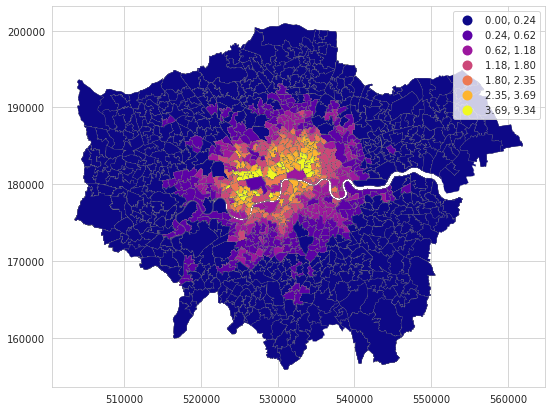

In [41]:
sns.set_style('whitegrid')
#ax = wards_total.plot(facecolor=(0.8, 0.8, 0.8, 0.5), edgecolor='gray', linewidth=0.25, figsize=(10,10))
#gdf_total.plot(ax=ax, column='list_density', cmap='viridis', edgecolor='none', legend=True);


# basic map 

joined.plot(column='listings_density', cmap='plasma', 
         scheme='quantiles', k=7, edgecolor='grey',linewidth=0.2, legend=True, figsize=(9,7));

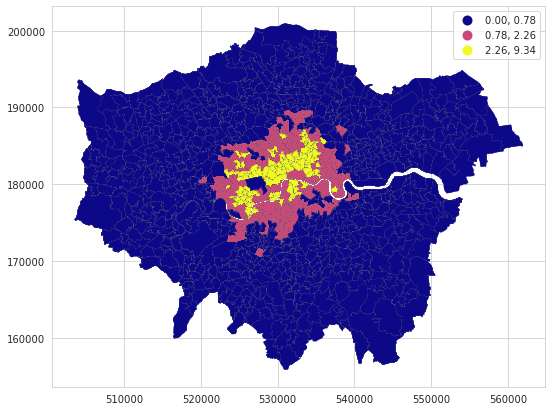

In [42]:

sns.set_style('whitegrid')

joined.plot(column='listings_density', cmap='plasma', 
         scheme='quantiles', k=3, edgecolor='grey',linewidth=0.1, legend=True, figsize=(9,7));


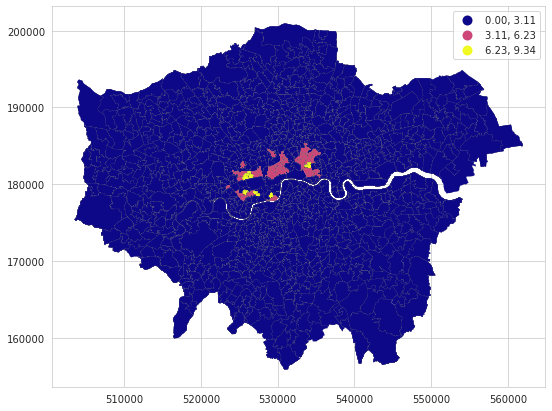

In [43]:

sns.set_style('whitegrid')

joined.plot(column='listings_density', cmap='plasma', 
         scheme='equalinterval', k=3, edgecolor='grey',linewidth=0.1, legend=True, figsize=(9,7));


In [44]:
"""
Invalid scheme. Scheme must be in the set: dict_keys(['boxplot', 
                                                      'equalinterval',
                                                      'fisherjenks',
                                                      'fisherjenkssampled', 
                                                      'headtailbreaks', 
                                                      'jenkscaspall', 
                                                      'jenkscaspallforced',
                                                      'jenkscaspallsampled',
                                                      'maxp',
                                                      'maximumbreaks',
                                                      'naturalbreaks', 
                                                      'quantiles', 
                                                      'percentiles', 
                                                      'stdmean', 
                                                      'userdefined']
"""

"\nInvalid scheme. Scheme must be in the set: dict_keys(['boxplot', \n                                                      'equalinterval',\n                                                      'fisherjenks',\n                                                      'fisherjenkssampled', \n                                                      'headtailbreaks', \n                                                      'jenkscaspall', \n                                                      'jenkscaspallforced',\n                                                      'jenkscaspallsampled',\n                                                      'maxp',\n                                                      'maximumbreaks',\n                                                      'naturalbreaks', \n                                                      'quantiles', \n                                                      'percentiles', \n                                                      'stdmea

<Axes:>

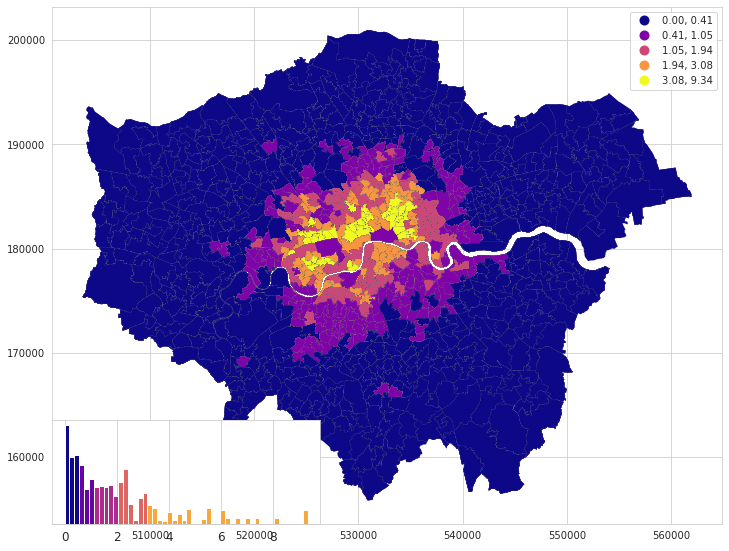

In [45]:
import pysal as ps
# https://github.com/pysal/mapclassify
import mapclassify as mc
# https://jiffyclub.github.io/palettable/
import palettable.matplotlib as palmpl
from legendgram import legendgram

f,ax = plt.subplots(figsize=(12,10))
joined.plot(column='listings_density', scheme='quantiles', cmap='plasma',edgecolor='grey',linewidth=0.1, k=5, ax=ax, legend=True)
q = mc.Quantiles(joined.listings_density.values, k=5)

# https://github.com/pysal/legendgram/blob/master/legendgram/legendgram.py
legendgram(f, ax, 
               joined.listings_density, q.bins, pal=palmpl.Plasma_5,
               legend_size=(.4,.2), # legend size in fractions of the axis
               loc = 'lower left', # mpl-style legend loc
              # clip = (0,500), # clip range of the histogram
               frameon=True)

In [46]:
joined.listings_density.isnull().sum()


0

<AxesSubplot:ylabel='Frequency'>

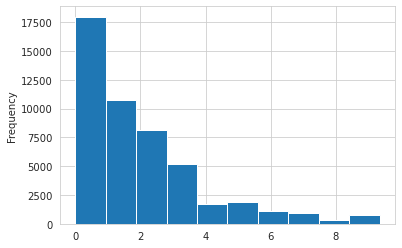

In [47]:
joined['listings_density'].plot.hist() # histogram

In [48]:
joined["ln_listings_density"]= np.log(joined["listings_density"])

<AxesSubplot:ylabel='Frequency'>

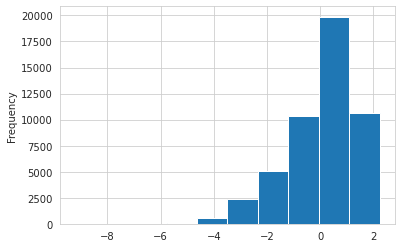

In [49]:
joined['ln_listings_density'].plot.hist() # histogram

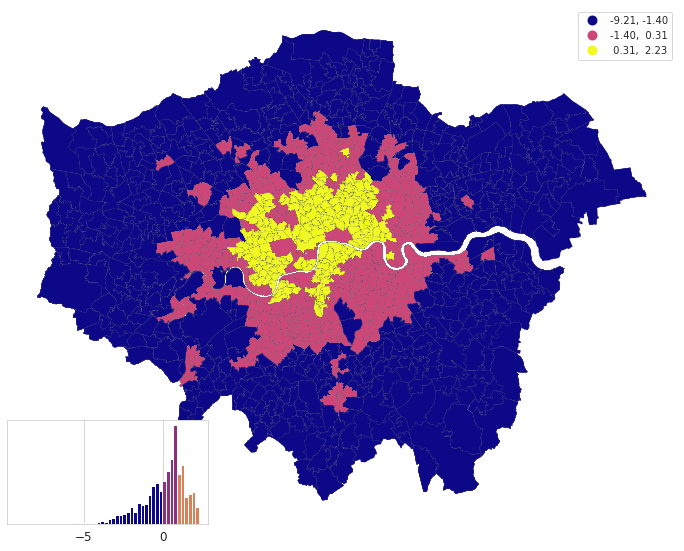

In [50]:
import pysal as ps
# https://github.com/pysal/mapclassify
import mapclassify as mc
# https://jiffyclub.github.io/palettable/
import palettable.matplotlib as palmpl
from legendgram import legendgram

f,ax = plt.subplots(figsize=(12,10))
joined.plot(column='ln_listings_density', scheme='naturalbreaks', cmap='plasma',edgecolor='grey',linewidth=0.1, k=3, ax=ax, legend=True)
q = mc.Quantiles(joined.ln_listings_density.values, k=3)
#set the axis off
ax.set_axis_off()
# https://github.com/pysal/legendgram/blob/master/legendgram/legendgram.py
legendgram(f, ax, 
               joined.ln_listings_density, q.bins, pal=palmpl.Plasma_3,
               legend_size=(.3,.2), # legend size in fractions of the axis
               loc = 'lower left', # mpl-style legend loc
              # clip = (0,500), # clip range of the histogram
               frameon=True)
plt.savefig("Airbnb_density.png", bbox_inches = 'tight')


------------------------------------------------

### msoa atlas

In [52]:
# Load in the Airbnb data 
atlas = pd.read_csv('https://github.com/DaphneBdn/fsds_assessment3/blob/main/Data/clean/MSOA_Atlas.csv?raw=true')
atlas.head(3)

MSOA Code                 MSOA Name  Age - All Ages  Age - 0-15  \
0  E02000001        City of London 001          7375.0       620.0   
1  E02000002  Barking and Dagenham 001          6775.0      1751.0   
2  E02000003  Barking and Dagenham 002         10045.0      2247.0   

   Age - 16-29  Age - 30-44  Age - 45-64  Age - 65+  Age - Working-age  \
0       1665.0       2045.0       2010.0     1035.0             5720.0   
1       1277.0       1388.0       1258.0     1101.0             3923.0   
2       1959.0       2300.0       2259.0     1280.0             6518.0   

   Households - All Households  ...  Total Median hh Income  \
0                       4385.0  ...            46788.295472   
1                       2713.0  ...            27058.703760   
2                       3834.0  ...            36834.528738   

   Vehicles - No cars or vans in hh  Vehicles - 1 car or van in hh  \
0                            3043.0                         1100.0   
1                            1020.0                         1186.0   
2                            1196.0                         1753.0   

   Vehicles - 2 cars or vans in hh  Vehicles - 3 cars or vans in hh  \
0                            173.0                             51.0   
1                            424.0                             66.0   
2                            691.0                            155.0   

   Vehicles - 4 or more cars or vans in hh  \
0                                     18.0   
1                                     17.0   
2                                     39.0   

   Vehicles - Sum of all cars or vans in the area  Vehicles - Cars per hh  \
0                                          1692.0                0.385861   
1                                          2305.0                0.849613   
2                                          3766.0                0.982264   

                Borough                  Subregion  
0        City of London                 Inner West  
1  Barking and Dagenham  Outer East and North East  
2  Barking and Dagenham  Outer East and North East  

[3 rows x 78 columns]

In [53]:
# extract the column names
cols=df.columns
print(cols)
print(f"The Inside Airbnb dataset has {len(cols)} columns")

Index(['name', 'latitude', 'longitude', 'property_type', 'room_type', 'price',
       'availability_365', 'number_of_reviews_l30d', 'first_review',
       'last_review', 'geometry'],
      dtype='object')
The Inside Airbnb dataset has 11 columns


In [ ]:
cols_atlas=atlas.columns
print(cols_atlas)

In [54]:
variables= ['MSOA Code',
            "Total Median hh Income", 
            "White",
            'BAME',
            'Qualifications - Level 4 and above',
            'Flat, maisonette or apartment', 
            'Detached',
            'Tenure - Owned outright',
            'Tenure - Private rented'
           ]

In [55]:
atlas_sub=atlas[variables]
atlas_sub.head(2)

MSOA Code  Total Median hh Income   White    BAME  \
0  E02000001            46788.295472  5799.0  1576.0   
1  E02000002            27058.703760  4403.0  2372.0   

   Qualifications - Level 4 and above  Flat, maisonette or apartment  \
0                              4618.0                         5416.0   
1                               914.0                         1087.0   

   Detached  Tenure - Owned outright  Tenure - Private rented  
0      22.0                   1093.0                   1573.0  
1      99.0                    596.0                    269.0

In [56]:
joined.head(2)

index_left                                               name  latitude  \
0  16688976.0                     Amazing flat near Tower Bridge  51.51061   
0  44654884.0  Special Modern One Bedroom in the City of London!  51.51098   

   longitude       property_type        room_type  price  availability_365  \
0   -0.07319  Entire rental unit  Entire home/apt   67.0               0.0   
0   -0.07381  Entire rental unit  Entire home/apt  110.0             266.0   

   number_of_reviews_l30d first_review last_review last_review    MSOA11CD  \
0                     0.0   2017-10-24  2018-07-08   2018-07-08  E02000001   
0                     0.0   2021-05-08  2021-05-08   2021-05-08  E02000001   

             MSOA11NM    Shape__Are  \
0  City of London 001  2.906361e+06   
0  City of London 001  2.906361e+06   

                                            geometry  listings_count  \
0  POLYGON ((532135.138 182198.131, 532158.250 18...             249   
0  POLYGON ((532135.138 182198.131, 532158.250 18...             249   

   listings_density  ln_listings_density  
0          0.856741            -0.154619  
0          0.856741            -0.154619

In [57]:
#merge the atlas data with the previously joined dataframe file 
London_atlas = pd.merge(atlas_sub, joined, right_on = "MSOA11CD", left_on = "MSOA Code" , how = "left")

London_atlas.head(10)


London_atlas.drop_duplicates(subset='MSOA Code', inplace=True)

In [58]:
London_atlas

MSOA Code  Total Median hh Income   White    BAME  \
0      E02000001            46788.295472  5799.0  1576.0   
249    E02000002            27058.703760  4403.0  2372.0   
256    E02000003            36834.528738  5486.0  4559.0   
264    E02000004            39668.206433  5006.0  1176.0   
265    E02000005            29155.683536  5674.0  2888.0   
...          ...                     ...     ...     ...   
48041  E02000979            51320.230819  5950.0  2131.0   
48192  E02000980            36808.092232  5900.0  2784.0   
48320  E02000981            51738.479283  7115.0  1876.0   
48618  E02000982            34920.107416  5288.0  2938.0   
48734  E02000983            35967.603958  5925.0  2509.0   

       Qualifications - Level 4 and above  Flat, maisonette or apartment  \
0                                  4618.0                         5416.0   
249                                 914.0                         1087.0   
256                                1829.0                         1256.0   
264                                 891.0                          314.0   
265                                1119.0                          373.0   
...                                   ...                            ...   
48041                              3726.0                         4305.0   
48192                              3716.0                         4834.0   
48320                              5028.0                         4700.0   
48618                              2960.0                         4207.0   
48734                              3341.0                         4786.0   

       Detached  Tenure - Owned outright  Tenure - Private rented  index_left  \
0          22.0                   1093.0                   1573.0  16688976.0   
249        99.0                    596.0                    269.0  37494922.0   
256       161.0                   1028.0                    830.0  34679883.0   
264        92.0                    718.0                    228.0  40972647.0   
265       136.0                    711.0                    482.0  35405126.0   
...         ...                      ...                      ...         ...   
48041      30.0                    822.0                   1335.0  32380123.0   
48192      12.0                    745.0                   1144.0  22332861.0   
48320      30.0                    970.0                   1791.0   7885856.0   
48618      19.0                    604.0                   1077.0  22317817.0   
48734      19.0                    647.0                   1754.0  15092687.0   

       ... first_review  last_review  last_review    MSOA11CD  \
0      ...   2017-10-24   2018-07-08    2018-07-08  E02000001   
249    ...   2019-08-07   2020-01-01    2020-01-01  E02000002   
256    ...   2019-06-18   2021-05-25    2021-05-25  E02000003   
264    ...   2020-01-31   2021-07-31    2021-07-31  E02000004   
265    ...   2019-06-15   2019-06-24    2019-06-24  E02000005   
...    ...          ...          ...           ...        ...   
48041  ...   2019-03-10   2020-03-03    2020-03-03  E02000979   
48192  ...   2019-01-03   2020-01-16    2020-01-16  E02000980   
48320  ...   2015-09-12   2019-07-27    2019-07-27  E02000981   
48618  ...   2019-01-02   2019-05-19    2019-05-19  E02000982   
48734  ...   2016-11-01   2020-10-15    2020-10-15  E02000983   

                       MSOA11NM    Shape__Are  \
0            City of London 001  2.906361e+06   
249    Barking and Dagenham 001  2.166163e+06   
256    Barking and Dagenham 002  2.143568e+06   
264    Barking and Dagenham 003  2.491467e+06   
265    Barking and Dagenham 004  1.186053e+06   
...                         ...           ...   
48041           Westminster 020  1.399979e+06   
48192           Westminster 021  4.465386e+05   
48320           Westminster 022  3.648544e+05   
48618           Westminster 023  6.549622e+05   
48734           Westminster 024  3.750691e+05   

                              

In [ ]:
# map here the variability in each variable (see philips code!)
#  ΝΕΕD TO STANDARDISE, NORMALISE DATA?

In [59]:
# extract columns for clustering

clust= ["MSOA Code",
        "listings_density",
            "Total Median hh Income", 
            "White",
            'BAME',
            'Qualifications - Level 4 and above',
            'Flat, maisonette or apartment', 
            'Detached',
            'Tenure - Owned outright',
            'Tenure - Private rented'
           ]

London_clust= London_atlas[clust]


London_clust

MSOA Code  listings_density  Total Median hh Income   White    BAME  \
0      E02000001          0.856741            46788.295472  5799.0  1576.0   
249    E02000002          0.032315            27058.703760  4403.0  2372.0   
256    E02000003          0.037321            36834.528738  5486.0  4559.0   
264    E02000004          0.004014            39668.206433  5006.0  1176.0   
265    E02000005          0.042157            29155.683536  5674.0  2888.0   
...          ...               ...                     ...     ...     ...   
48041  E02000979          1.078588            51320.230819  5950.0  2131.0   
48192  E02000980          2.866494            36808.092232  5900.0  2784.0   
48320  E02000981          8.167641            51738.479283  7115.0  1876.0   
48618  E02000982          1.771095            34920.107416  5288.0  2938.0   
48734  E02000983          3.546013            35967.603958  5925.0  2509.0   

       Qualifications - Level 4 and above  Flat, maisonette or apartment  \
0                                  4618.0                         5416.0   
249                                 914.0                         1087.0   
256                                1829.0                         1256.0   
264                                 891.0                          314.0   
265                                1119.0                          373.0   
...                                   ...                            ...   
48041                              3726.0                         4305.0   
48192                              3716.0                         4834.0   
48320                              5028.0                         4700.0   
48618                              2960.0                         4207.0   
48734                              3341.0                         4786.0   

       Detached  Tenure - Owned outright  Tenure - Private rented  
0          22.0                   1093.0                   1573.0  
249        99.0                    596.0                    269.0  
256       161.0                   1028.0                    830.0  
264        92.0                    718.0                    228.0  
265       136.0                    711.0                    482.0  
...         ...                      ...                      ...  
48041      30.0                    822.0                   1335.0  
48192      12.0                    745.0                   1144.0  
48320      30.0                    970.0                   1791.0  
48618      19.0                    604.0                   1077.0  
48734      19.0                    647.0                   1754.0  

[983 rows x 10 columns]

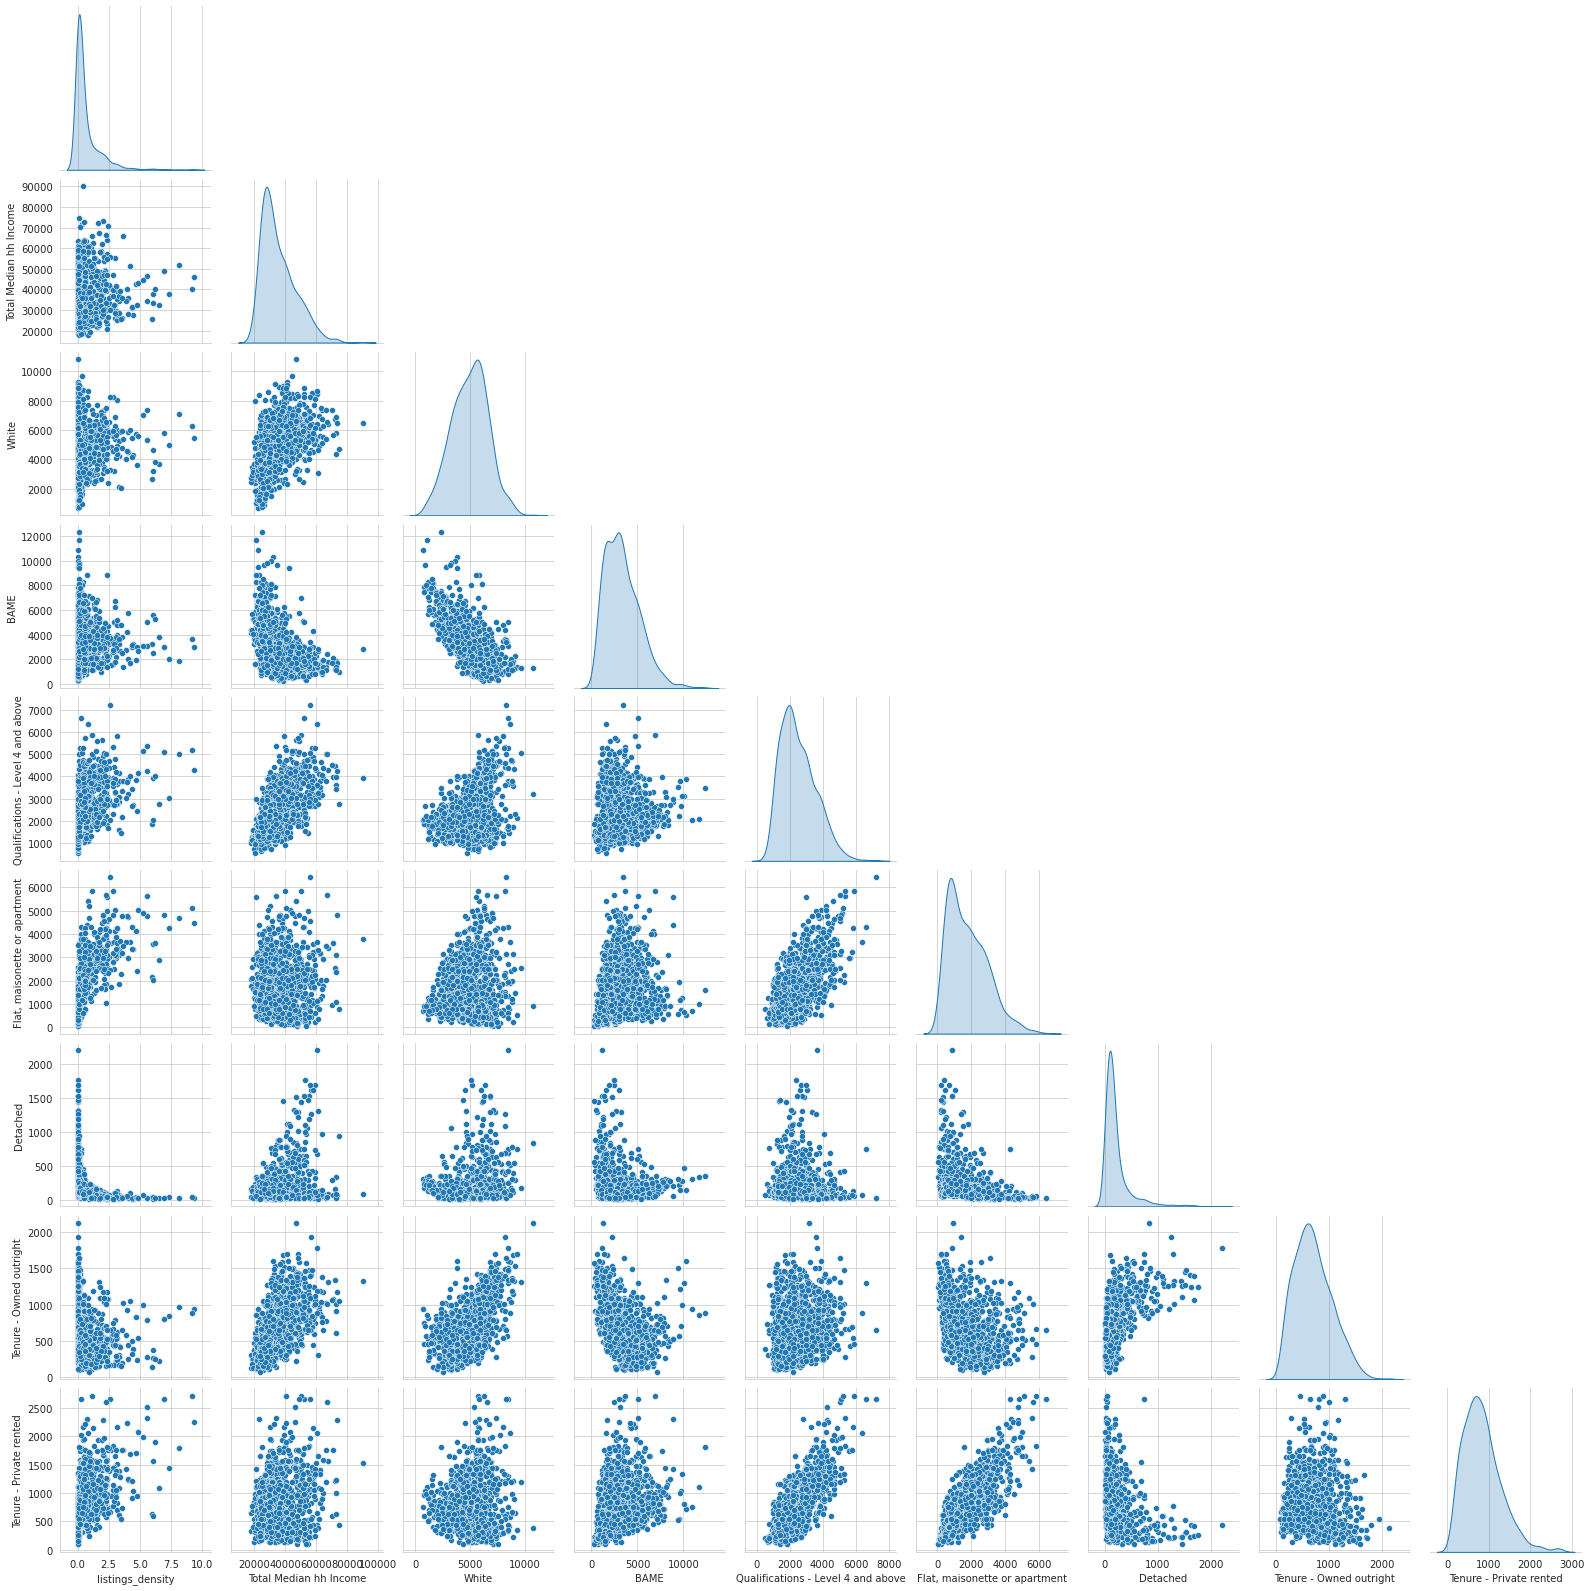

In [60]:
sns.pairplot(data=London_clust, diag_kind='kde', corner=True)

In [61]:
print(type(London_clust))

<class 'pandas.core.frame.DataFrame'>


In [62]:
London_clust2=London_clust.set_index("MSOA Code")
London_clust2

listings_density  Total Median hh Income   White    BAME  \
MSOA Code                                                             
E02000001          0.856741            46788.295472  5799.0  1576.0   
E02000002          0.032315            27058.703760  4403.0  2372.0   
E02000003          0.037321            36834.528738  5486.0  4559.0   
E02000004          0.004014            39668.206433  5006.0  1176.0   
E02000005          0.042157            29155.683536  5674.0  2888.0   
...                     ...                     ...     ...     ...   
E02000979          1.078588            51320.230819  5950.0  2131.0   
E02000980          2.866494            36808.092232  5900.0  2784.0   
E02000981          8.167641            51738.479283  7115.0  1876.0   
E02000982          1.771095            34920.107416  5288.0  2938.0   
E02000983          3.546013            35967.603958  5925.0  2509.0   

           Qualifications - Level 4 and above  Flat, maisonette or apartment  \
MSOA Code                                                                      
E02000001                              4618.0                         5416.0   
E02000002                               914.0                         1087.0   
E02000003                              1829.0                         1256.0   
E02000004                               891.0                          314.0   
E02000005                              1119.0                          373.0   
...                                       ...                            ...   
E02000979                              3726.0                         4305.0   
E02000980                              3716.0                         4834.0   
E02000981                              5028.0                         4700.0   
E02000982                              2960.0                         4207.0   
E02000983                              3341.0                         4786.0   

           Detached  Tenure - Owned outright  Tenure - Private rented  
MSOA Code                                                              
E02000001      22.0                   1093.0                   1573.0  
E02000002      99.0                    596.0                    269.0  
E02000003     161.0                   1028.0                    830.0  
E02000004      92.0                    718.0                    228.0  
E02000005     136.0                    711.0                    482.0  
...             ...                      ...                      ...  
E02000979      30.0                    822.0                   1335.0  
E02000980      12.0                    745.0                   1144.0  
E02000981      30.0                    970.0                   1791.0  
E02000982      19.0                    604.0                   1077.0  
E02000983      19.0                    647.0                   1754.0  

[983 rows x 9 columns]

In [66]:
#import the necessary module
from sklearn.cluster import AgglomerativeClustering

#create the model that we want, setting the linkage to ward, the distance threshold to 4 and 
#set the number of clusters to none so that we can plot the dendrogram afterwards
model = AgglomerativeClustering(linkage="ward", distance_threshold = 10000 , n_clusters=None)
#fit the model to the data
model.fit(London_clust2)



AgglomerativeClustering(distance_threshold=10000, n_clusters=None)

In [67]:
London_clust2["Aggl_clus"] = model.labels_


In [68]:
London_clust2.head(10)

listings_density  Total Median hh Income   White    BAME  \
MSOA Code                                                             
E02000001          0.856741            46788.295472  5799.0  1576.0   
E02000002          0.032315            27058.703760  4403.0  2372.0   
E02000003          0.037321            36834.528738  5486.0  4559.0   
E02000004          0.004014            39668.206433  5006.0  1176.0   
E02000005          0.042157            29155.683536  5674.0  2888.0   
E02000007          0.098045            25568.601831  5906.0  2885.0   
E02000008          0.035223            26749.839238  8057.0  3512.0   
E02000009          0.062083            27346.885638  5136.0  3259.0   
E02000010          0.116217            27077.141437  5962.0  2653.0   
E02000011          0.074902            33153.027415  4106.0  2081.0   

           Qualifications - Level 4 and above  Flat, maisonette or apartment  \
MSOA Code                                                                      
E02000001                              4618.0                         5416.0   
E02000002                               914.0                         1087.0   
E02000003                              1829.0                         1256.0   
E02000004                               891.0                          314.0   
E02000005                              1119.0                          373.0   
E02000007                              1129.0                         1471.0   
E02000008                              1401.0                          764.0   
E02000009                              1240.0                          663.0   
E02000010                              1091.0                          477.0   
E02000011                               938.0                          588.0   

           Detached  Tenure - Owned outright  Tenure - Private rented  \
MSOA Code                                                               
E02000001      22.0                   1093.0                   1573.0   
E02000002      99.0                    596.0                    269.0   
E02000003     161.0                   1028.0                    830.0   
E02000004      92.0                    718.0                    228.0   
E02000005     136.0                    711.0                    482.0   
E02000007      82.0                    558.0                    333.0   
E02000008     188.0                    708.0                    641.0   
E02000009     129.0                    488.0                    619.0   
E02000010     125.0                    463.0                    517.0   
E02000011     128.0                    672.0                    440.0   

           Aggl_clus  
MSOA Code             
E02000001         13  
E02000002          4  
E02000003          8  
E02000004         32  
E02000005          7  
E02000007          4  
E02000008          4  
E02000009          4  
E02000010          4  
E02000011         19

In [69]:
agglom_sizes = London_clust2.groupby("Aggl_clus").size()
agglom_sizes

Aggl_clus
0     42
1     56
2     30
3     20
4     47
5     39
6      8
7     31
8     35
9     31
10    34
11    25
12    25
13    23
14    32
15    29
16    22
17    25
18    11
19    28
20    31
21     7
22    31
23    24
24    22
25     6
26    19
27     6
28    22
29    23
30    19
31     1
32    23
33    22
34    10
35     6
36     7
37     4
38    12
39     3
40    14
41    15
42     2
43     8
44    16
45    24
46    13
dtype: int64

# Hierarchical Clustering - listings density (test)


test hierarchical clustering on the lisitngs density column only

In [191]:
list=["MSOA Code",
     "ln_listings_density"]

In [192]:
# subset the data
list_clust= London_atlas[list]
list_clust.set_index("MSOA Code", inplace=True)
list_clust


ln_listings_density
MSOA Code                     
E02000001            -0.154619
E02000002            -3.432218
E02000003            -3.288200
E02000004            -5.518042
E02000005            -3.166363
...                        ...
E02000979             0.075652
E02000980             1.053090
E02000981             2.100180
E02000982             0.571598
E02000983             1.265824

[983 rows x 1 columns]

In [193]:
#import the necessary module
from sklearn.cluster import AgglomerativeClustering

#create the model setting the number of clusters 
model = AgglomerativeClustering(linkage="ward", distance_threshold = 4 , n_clusters=None)
#fit the model to the data
model.fit(list_clust)


AgglomerativeClustering(distance_threshold=4, n_clusters=None)

In [194]:
# add the cluster membership back to the dataframe
list_clust["Aggl_clus"] = model.labels_


/opt/conda/envs/sds2021/lib/python3.9/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [195]:
# reset the index in order to join with the shapefile on the MSOA code
list_clust.reset_index(inplace=True)
# join the dataframe to the geodataframe (Note: the geopandas dataframe needs to be the left, so that the resulting objects remains a geodataframe)
list_clust_joined= pd.merge(ldn_msoas, list_clust, left_on="MSOA11CD", right_on="MSOA Code" )
#check the result
list_clust_joined.head()

MSOA11CD                  MSOA11NM    Shape__Are  \
0  E02000001        City of London 001  2.906361e+06   
1  E02000002  Barking and Dagenham 001  2.166163e+06   
2  E02000003  Barking and Dagenham 002  2.143568e+06   
3  E02000004  Barking and Dagenham 003  2.491467e+06   
4  E02000005  Barking and Dagenham 004  1.186053e+06   

                                            geometry  MSOA Code  \
0  POLYGON ((532135.138 182198.131, 532158.250 18...  E02000001   
1  POLYGON ((548881.563 190845.265, 548881.125 19...  E02000002   
2  POLYGON ((549102.438 189324.625, 548954.517 18...  E02000003   
3  POLYGON ((551550.056 187364.705, 551478.000 18...  E02000004   
4  POLYGON ((549099.634 187656.076, 549161.375 18...  E02000005   

   ln_listings_density  Aggl_clus  
0            -0.154619          1  
1            -3.432218          0  
2            -3.288200          0  
3            -5.518042          4  
4            -3.166363          7

In [196]:
print(type(list_clust_joined))

<class 'geopandas.geodataframe.GeoDataFrame'>


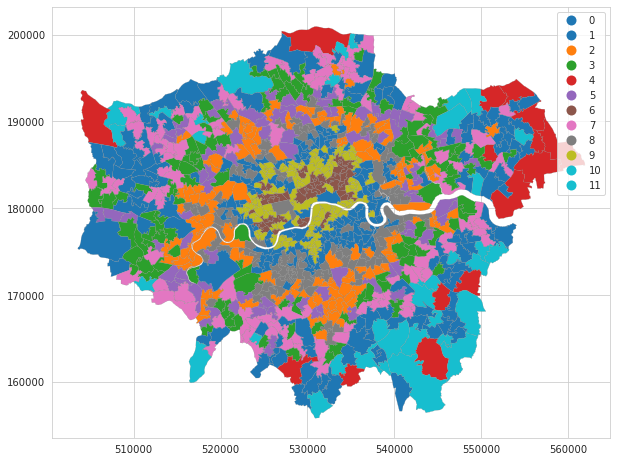

In [197]:
# map the clusters

list_clust_joined.plot(column='Aggl_clus',categorical = True, legend=True,
          edgecolor='grey',linewidth=0.2, figsize=(10,8));

ax.set_axis_off()

In [198]:
# check the size of each cluster
agglom_sizes = list_clust_joined.groupby("Aggl_clus").size()
agglom_sizes

Aggl_clus
0     119
1     118
2     130
3     116
4      15
5      90
6      53
7      98
8     110
9      99
10     30
11      5
dtype: int64

Dendogram

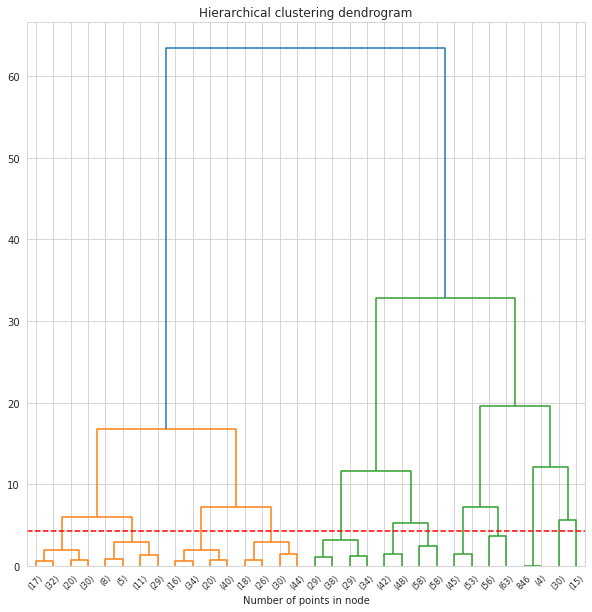

In [199]:
# the code below was copied from Philip Wilkinson: https://github.com/PhilipDW183/London_crime_clusters/blob/main/London_Crime.ipynb 

import numpy as np
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):
    
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count +=1
            else:
                current_count += counts[child_idx-n_samples]
        counts[i] = current_count
        
    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                     counts]).astype(float)
    
    dendrogram(linkage_matrix, **kwargs)

fig, ax = plt.subplots(figsize = (10,10))
ax.set_title("Hierarchical clustering dendrogram")
#plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p=4)
plt.axhline(y = 4.3, color = "r", linestyle = "--")
ax.set_xlabel("Number of points in node")
plt.show()

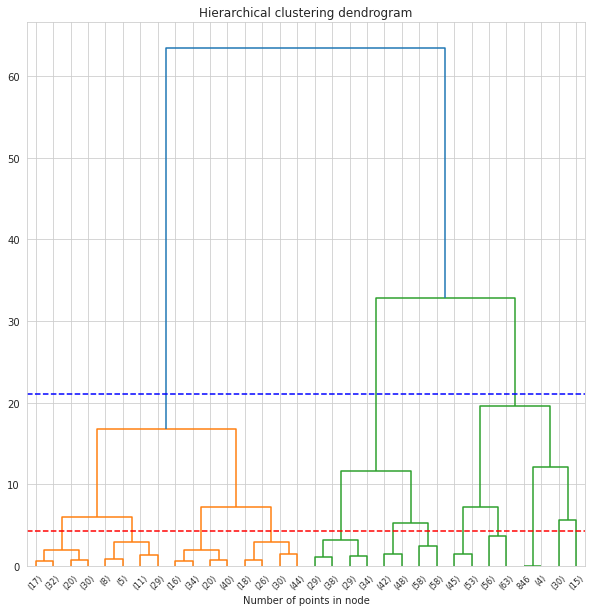

In [212]:
fig, ax = plt.subplots(figsize = (10,10))
ax.set_title("Hierarchical clustering dendrogram")
#plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p=4)
plt.axhline(y = 4.3, color = "r", linestyle = "--")
plt.axhline(y = 21, color = "b", linestyle = "--")
ax.set_xlabel("Number of points in node")
plt.show()

The dendogram shows that at a slightly larger distance that the current(4), we would have one less cluster (7 and 8 should merge)
However the longest distances seem to be occur around 21, which would result into 3 clusters


In [213]:
# subset the data
list_clust= London_atlas[list]
list_clust.set_index("MSOA Code", inplace=True)
list_clust

ln_listings_density
MSOA Code                     
E02000001            -0.154619
E02000002            -3.432218
E02000003            -3.288200
E02000004            -5.518042
E02000005            -3.166363
...                        ...
E02000979             0.075652
E02000980             1.053090
E02000981             2.100180
E02000982             0.571598
E02000983             1.265824

[983 rows x 1 columns]

In [214]:
#Repeat the process with distance=21
model_21 = AgglomerativeClustering(linkage="ward", distance_threshold = 21 , n_clusters=None)
#fit the model to the data
model_21.fit(list_clust)

AgglomerativeClustering(distance_threshold=21, n_clusters=None)

In [215]:
# add the cluster membership back to the dataframe
list_clust_joined["Aggl_clus_21"] = model_21.labels_

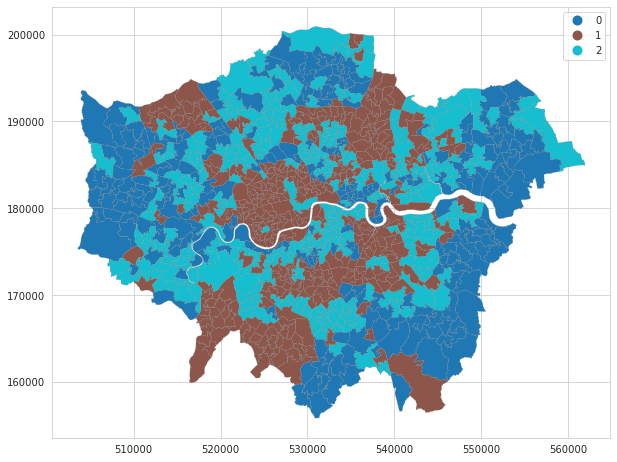

The above result is hard to be interpretet, it seems like this method does not yield the expected results. 
Perhaps trying a different clustering method or a completely different apprach altogher might be more successful

-------------------------------------------------------------------------------------------------------------------------

# Ward Profiles

In [502]:
# Load in the Airbnb data 
ward_profiles = pd.read_csv('https://github.com/DaphneBdn/fsds_assessment3/blob/main/Data/raw/ward-profiles-excel-version.csv?raw=true',encoding= 'latin-1')
ward_profiles.tail(3)

Ward name Old code   New code  Population - 2015  \
657  Westminster     00BK  E09000033         230,550.00   
658       London        H  E12000007       8,632,850.00   
659      England      921  E92000001      54,613,400.00   

     Children aged 0-15 - 2015  Working-age (16-64) - 2015  \
657                  33,900.00                  170,350.00   
658               1,726,900.00                5,923,600.00   
659              10,335,450.00               34,540,350.00   

     Older people aged 65+ - 2015  % All Children aged 0-15 - 2015  \
657                     26,300.00                            14.70   
658                    982,400.00                            20.00   
659                  9,737,650.00                            18.90   

     % All Working-age (16-64) - 2015  % All Older people aged 65+ - 2015  \
657                             73.90                               11.40   
658                             68.60                               11.40   
659                             63.20                               17.80   

     ...  A-Level Average Point Score Per Student - 2013/14  \
657  ...                                             680.50   
658  ...                                             689.90   
659  ...                                             696.30   

     A-Level Average Point Score Per Entry; 2013/14  Crime rate - 2014/15  \
657                                          210.20                238.30   
658                                          211.40                 83.30   
659                                          211.50                 66.90   

     Violence against the person rate - 2014/15  \
657                                       39.50   
658                                       23.40   
659                                       13.40   

     Deliberate Fires per 1,000 population - 2014  \
657                                          0.20   
658                                          0.50   
659                                           NaN   

     % area that is open space - 2014  Cars per household - 2011  \
657                             28.60                       0.50   
658                             39.10                       0.80   
659                               NaN                       1.10   

     Average Public Transport Accessibility score - 2014  \
657                                               6.50     
658                                               3.80     
659                                                NaN     

     % travel by bicycle to work - 2011  Turnout at Mayoral election - 2012  
657                                4.80                               37.70  
658                                4.00                               34.20  
659                                2.90                                 NaN  

[3 rows x 67 columns]

In [562]:
keep_ward=["Ward name",
          "New code",
           "Median Age - 2013", 
           "Population density (persons per sq km) - 2013",
           "% BAME - 2011",
           "Median Household income estimate (2012/13)",
           "% Flat, maisonette or apartment - 2011",
           "% with Level 4 qualifications and above - 2011",
           "Average Public Transport Accessibility score - 2014" ]

In [564]:
wards=ward_profiles[keep_ward]

In [565]:
wards = wards.rename(columns={'Area_name':'Borough',
                          "New code":'Ward code',
                          "Median Age - 2013": "Median Age",
                          "Population density (persons per sq km) - 2013":"Pop density",
                          "% BAME - 2011":"BAME perc",
                          "Median Household income estimate (2012/13)":"Median income",
                          "% Flat, maisonette or apartment - 2011": "Flat perc",
                          "% with Level 4 qualifications and above - 2011": "High educ perc",
                          "Average Public Transport Accessibility score - 2014": "Transport"})
wards.tail()

Ward name  Ward code  Median Age  Pop density  BAME perc  \
655  Waltham Forest  E09000031       33.00     6,897.00      47.80   
656      Wandsworth  E09000032       32.00     8,853.90      28.60   
657     Westminster  E09000033       34.00    10,285.80      38.30   
658          London  E12000007       33.00     5,292.60      40.20   
659         England  E92000001       39.00       413.50      14.60   

     Median income  Flat perc  High educ perc  Transport  
655      39,460.00      41.20           30.00       3.60  
656      66,220.00      65.90           53.60       4.30  
657      80,760.00      89.20           50.30       6.50  
658      51,770.00      52.20           37.70       3.80  
659      30,763.30      21.60           27.20        NaN

In [566]:

wards[wards.isna().any(axis=1)]

Ward name  Ward code  Median Age  Pop density  BAME perc  Median income  \
659   England  E92000001       39.00       413.50      14.60      30,763.30   

     Flat perc  High educ perc  Transport  
659      21.60           27.20        NaN

In [567]:
wards.drop(index=[658,659], inplace=True)
wards.tail()

Ward name  Ward code  Median Age  Pop density  BAME perc  \
653          Sutton  E09000029       38.00     4,480.30      21.40   
654   Tower Hamlets  E09000030       29.00    12,564.70      54.80   
655  Waltham Forest  E09000031       33.00     6,897.00      47.80   
656      Wandsworth  E09000032       32.00     8,853.90      28.60   
657     Westminster  E09000033       34.00    10,285.80      38.30   

     Median income  Flat perc  High educ perc  Transport  
653      49,170.00      35.40           30.10       2.90  
654      45,720.00      85.90           41.00       5.00  
655      39,460.00      41.20           30.00       3.60  
656      66,220.00      65.90           53.60       4.30  
657      80,760.00      89.20           50.30       6.50

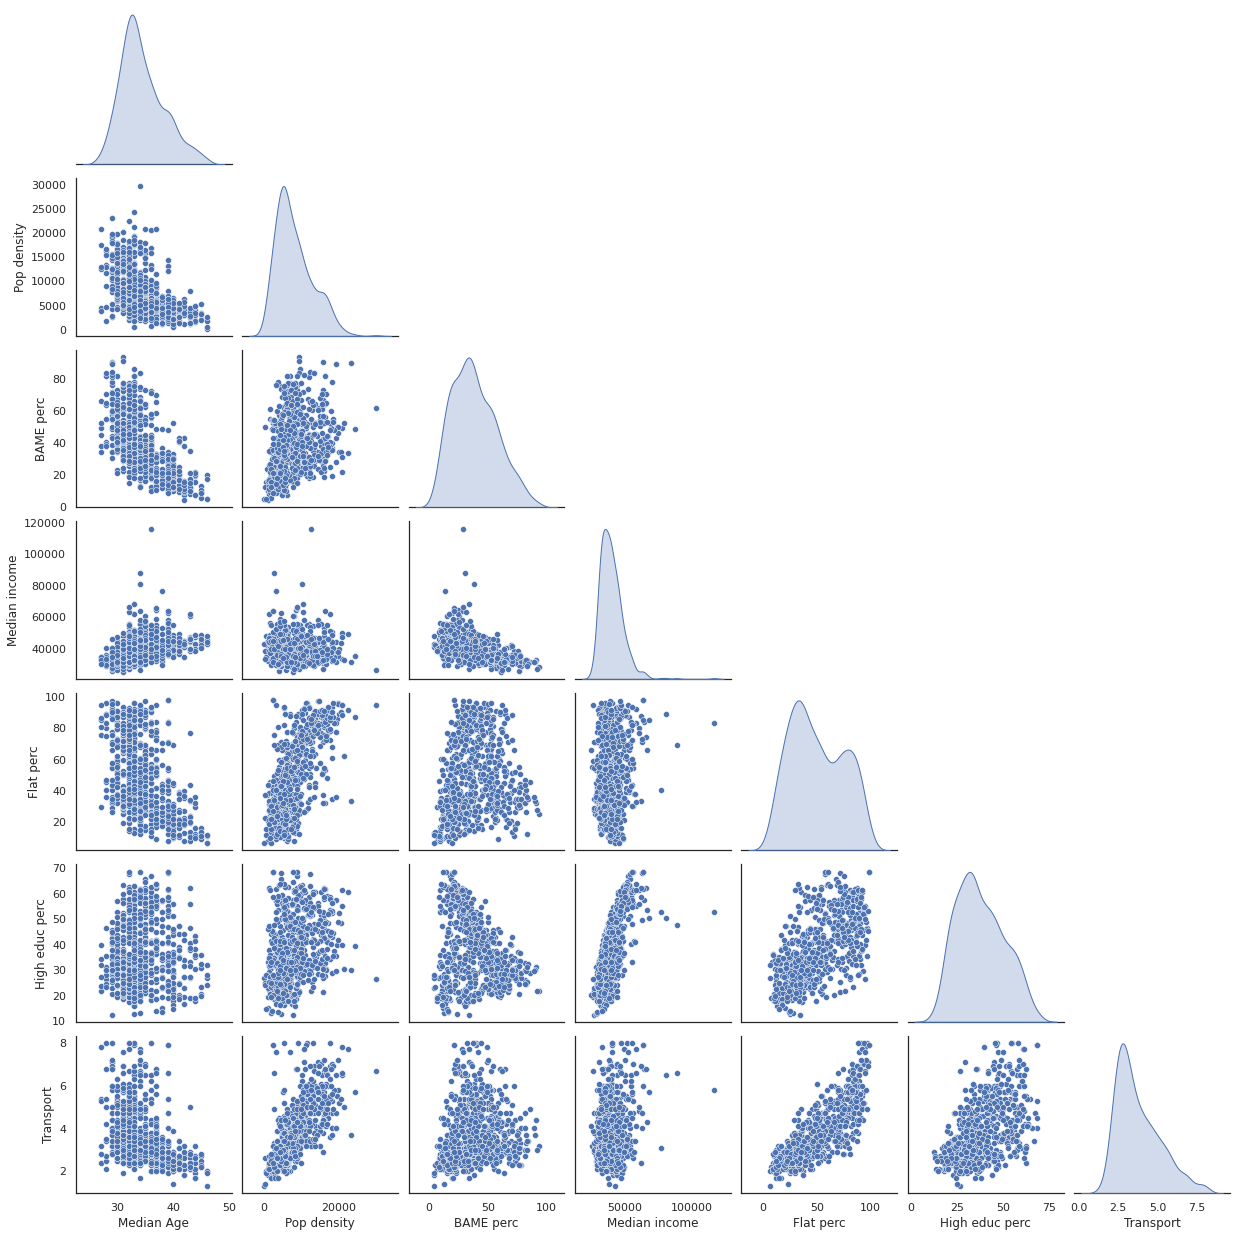

In [568]:
sns.set(style="white")
sns.pairplot(data=wards, diag_kind='kde', corner=True)

In [ ]:
# WARDS GEOMETRY

In [166]:
ldn_wards = gpd.read_file('https://github.com/DaphneBdn/fsds_assessment3/blob/main/Data/raw/statistical-gis-boundaries-london/ESRI/London_Borough_Excluding_MHW.shp?raw=true',driver='ESRI Shapefile')
ldn_wards.plot()

DriverError: '/vsimem/f74d3a88a6e74d6a9abcd58fc295d917' not recognized as a supported file format.

Data/raw/statistical-gis-boundaries-london/ESRI/London_Ward_CityMerged.shp


<AxesSubplot:>

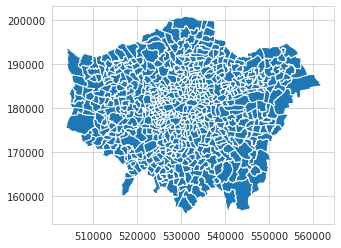

In [345]:
dataloc_geo = os.path.join("Data","raw", "statistical-gis-boundaries-london","ESRI", "London_Ward_CityMerged.shp")
print(dataloc_geo)

wards_pc = gpd.read_file( dataloc_geo )
wards_pc.plot()

# Note: would be nice to add the river when plotting

In [188]:
wards_pc.head()

NAME   GSS_CODE  HECTARES  NONLD_AREA  LB_GSS_CD  \
0       Chessington South  E05000405   755.173         0.0  E09000021   
1  Tolworth and Hook Rise  E05000414   259.464         0.0  E09000021   
2              Berrylands  E05000401   145.390         0.0  E09000021   
3               Alexandra  E05000400   268.506         0.0  E09000021   
4                Beverley  E05000402   187.821         0.0  E09000021   

                BOROUGH  POLY_ID  \
0  Kingston upon Thames    50840   
1  Kingston upon Thames   117160   
2  Kingston upon Thames    50449   
3  Kingston upon Thames    50456   
4  Kingston upon Thames   117161   

                                            geometry  
0  POLYGON ((516401.600 160201.800, 516407.300 16...  
1  POLYGON ((517829.600 165447.100, 517837.100 16...  
2  POLYGON ((518107.500 167303.400, 518114.300 16...  
3  POLYGON ((520480.000 166909.800, 520490.700 16...  
4  POLYGON ((522071.000 168144.900, 522063.900 16...

In [511]:
wards_pc[wards_pc.isna().any(axis=1)]

Empty GeoDataFrame
Columns: [NAME, GSS_CODE, HECTARES, NONLD_AREA, LB_GSS_CD, BOROUGH, POLY_ID, geometry]
Index: []

Data/raw/statistical-gis-boundaries-london/ESRI/London_Ward_CityMerged.shp


<AxesSubplot:>

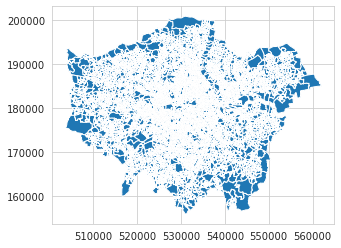

In [347]:
dataloc_lsoa = os.path.join("Data","raw", "statistical-gis-boundaries-london","ESRI", "LSOA_2011_London_gen_MHW.shp")
print(dataloc_geo)

lsoa_pc = gpd.read_file( dataloc_lsoa )
lsoa_pc.plot()

# Note: would be nice to add the river when plotting

In [349]:
lsoa_pc.head()

LSOA11CD                   LSOA11NM   MSOA11CD                  MSOA11NM  \
0  E01000001        City of London 001A  E02000001        City of London 001   
1  E01000002        City of London 001B  E02000001        City of London 001   
2  E01000003        City of London 001C  E02000001        City of London 001   
3  E01000005        City of London 001E  E02000001        City of London 001   
4  E01000006  Barking and Dagenham 016A  E02000017  Barking and Dagenham 016   

     LAD11CD               LAD11NM    RGN11CD RGN11NM  USUALRES  HHOLDRES  \
0  E09000001        City of London  E12000007  London      1465      1465   
1  E09000001        City of London  E12000007  London      1436      1436   
2  E09000001        City of London  E12000007  London      1346      1250   
3  E09000001        City of London  E12000007  London       985       985   
4  E09000002  Barking and Dagenham  E12000007  London      1703      1699   

   COMESTRES  POPDEN  HHOLDS  AVHHOLDSZ  \
0          0   112.9     876        1.7   
1          0    62.9     830        1.7   
2         96   227.7     817        1.5   
3          0    52.0     467        2.1   
4          4   116.2     543        3.1   

                                            geometry  
0  POLYGON ((532105.092 182011.230, 532162.491 18...  
1  POLYGON ((532746.813 181786.891, 532671.688 18...  
2  POLYGON ((532135.145 182198.119, 532158.250 18...  
3  POLYGON ((533807.946 180767.770, 533649.063 18...  
4  POLYGON ((545122.049 184314.931, 545271.917 18...

In [350]:
codes=["MSOA11CD","LAD11CD"]
lsoa_pc=lsoa_pc[codes]
lsoa_pc

MSOA11CD    LAD11CD
0     E02000001  E09000001
1     E02000001  E09000001
2     E02000001  E09000001
3     E02000001  E09000001
4     E02000017  E09000002
...         ...        ...
4830  E02000319  E09000011
4831  E02000314  E09000011
4832  E02000319  E09000011
4833  E02000314  E09000011
4834  E02006931  E09000011

[4835 rows x 2 columns]

In [512]:
wards_pc = wards_pc.to_crs('epsg:27700')

In [526]:
joined_wards = gpd.sjoin(gdf, wards_pc, how='right', op='within').drop(columns=['latitude','longitude','index_left'])
joined_wards.head()


name            property_type  \
0    Cosy detached studio- walking distance to CWOA!        Entire guesthouse   
0       Chessington Retreat Near World of Adventures  Entire residential home   
0              Chessington World of Adventures House  Entire residential home   
0                                  Wimbledon Terrace  Entire residential home   
0  Chessington Staycation : Close to   CWOAResort...  Entire residential home   

         room_type  price  availability_365  number_of_reviews_l30d  \
0  Entire home/apt  86.00               316                       7   
0  Entire home/apt  86.00                18                       1   
0  Entire home/apt 125.00                54                       0   
0  Entire home/apt 195.00                54                       0   
0  Entire home/apt 154.00               259                       2   

  first_review last_review last_review                NAME   GSS_CODE  \
0   2021-05-01  2021-10-09   2021-10-09  Chessington South  E05000405   
0   2019-08-02  2021-10-10   2021-10-10  Chessington South  E05000405   
0   2020-02-28  2020-02-28   2020-02-28  Chessington South  E05000405   
0   2020-02-09  2020-08-16   2020-08-16  Chessington South  E05000405   
0   2021-08-28  2021-09-27   2021-09-27  Chessington South  E05000405   

   HECTARES  NONLD_AREA  LB_GSS_CD               BOROUGH  POLY_ID  \
0    755.17        0.00  E09000021  Kingston upon Thames    50840   
0    755.17        0.00  E09000021  Kingston upon Thames    50840   
0    755.17        0.00  E09000021  Kingston upon Thames    50840   
0    755.17        0.00  E09000021  Kingston upon Thames    50840   
0    755.17        0.00  E09000021  Kingston upon Thames    50840   

                                            geometry  
0  POLYGON ((516401.600 160201.800, 516407.300 16...  
0  POLYGON ((516401.600 160201.800, 516407.300 16...  
0  POLYGON ((516401.600 160201.800, 516407.300 16...  
0  POLYGON ((516401.600 160201.800, 516407.300 16...  
0  POLYGON ((516401.600 160201.800, 516407.300 16...

In [352]:
test = joined_wards.groupby(['GSS_CODE'])['price'].agg(Count='count').reset_index() # msoa listings grouped counts
test.head()

GSS_CODE  Count
0  E05000026     33
1  E05000027     13
2  E05000028     11
3  E05000029     11
4  E05000030      6

In [353]:
test.loc[test["GSS_CODE"]=="E05000405"]


GSS_CODE  Count
379  E05000405     10

In [527]:
#insert new columns

# count of listings per ward
joined_wards["listings_count"]=joined_wards.groupby(["GSS_CODE"])["price"].transform("count")

In [528]:
#calculate density of listings per ward

joined_wards["listings_density"]=joined_wards["listings_count"]/joined_wards["HECTARES"]
joined_wards.head(2)


name            property_type  \
0  Cosy detached studio- walking distance to CWOA!        Entire guesthouse   
0     Chessington Retreat Near World of Adventures  Entire residential home   

         room_type  price  availability_365  number_of_reviews_l30d  \
0  Entire home/apt  86.00               316                       7   
0  Entire home/apt  86.00                18                       1   

  first_review last_review last_review                NAME   GSS_CODE  \
0   2021-05-01  2021-10-09   2021-10-09  Chessington South  E05000405   
0   2019-08-02  2021-10-10   2021-10-10  Chessington South  E05000405   

   HECTARES  NONLD_AREA  LB_GSS_CD               BOROUGH  POLY_ID  \
0    755.17        0.00  E09000021  Kingston upon Thames    50840   
0    755.17        0.00  E09000021  Kingston upon Thames    50840   

                                            geometry  listings_count  \
0  POLYGON ((516401.600 160201.800, 516407.300 16...              10   
0  POLYGON ((516401.600 160201.800, 516407.300 16...              10   

   listings_density  
0              0.01  
0              0.01

In [529]:
#Some wards may have no listings which will result in 0 values 
(joined_wards['listings_count']==0).sum()

0

In [530]:
joined_wards[joined_wards.isna().any(axis=1)]

name                     property_type        room_type  price  \
247  NaN       Private room in rental unit     Private room  72.00   
407  NaN           Entire residential home  Entire home/apt 150.00   
454  NaN                Entire rental unit  Entire home/apt 147.00   
511  NaN       Private room in rental unit     Private room  55.00   
531  NaN       Private room in rental unit     Private room  49.00   
554  NaN  Private room in residential home     Private room  30.00   
563  NaN                Entire rental unit  Entire home/apt  80.00   
593  NaN  Private room in residential home     Private room  20.00   

     availability_365  number_of_reviews_l30d first_review last_review  \
247                 0                       0   2015-10-26  2015-10-26   
407                 0                       0   2016-08-01  2016-07-29   
454               102                       0   2019-01-01  2019-08-28   
511                 0                       0   2015-08-14  2015-08-14   
531                 0                       0   2018-04-02  2020-02-16   
554               358                       0   2016-11-29  2016-11-29   
563               165                       0   2013-12-19  2018-10-16   
593                 0                       0   2015-12-06  2015-12-06   

    last_review                          NAME   GSS_CODE  HECTARES  \
247   2015-10-26                  Rotherhithe  E05000549    149.05   
407   2016-07-29               Wimbledon Park  E05000474    231.01   
454   2019-08-28        Shepherd's Bush Green  E05000263    106.82   
511   2015-08-14                 Kentish Town  E05000139    102.89   
531   2020-02-16  Spitalfields and Banglatown  E05000587     63.77   
554   2016-11-29                      Dalston  E05000235     92.66   
563   2018-10-16              Hackney Central  E05000237     78.03   
593   2015-12-06                 Custom House  E05000479    206.34   

     NONLD_AREA  LB_GSS_CD                 BOROUGH  POLY_ID  \
247       12.97  E09000028               Southwark   117355   
407        0.00  E09000024                  Merton    51250   
454        0.00  E09000013  Hammersmith and Fulham   117158   
511        0.00  E09000007                  Camden   117292   
531        0.00  E09000030           Tower Hamlets    50754   
554        0.00  E09000012                 Hackney   117336   
563        0.00  E09000012                 Hackney   117337   
593        0.00  E09000025                  Newham   116824   

                                              geometry  listings_count  \
247  POLYGON ((534783.300 179871.300, 534832.000 17...             144   
407  POLYGON ((526499.900 171092.800, 526507.300 17...              80   
454  POLYGON ((522783.400 179513.200, 522764.200 17...             193   
511  POLYGON ((529153.600 185861.400, 529222.700 18...             166   
531  POLYGON ((534509.100 181726.700, 534484.300 18...             384   
554  POLYGON ((533452.100 184773.100, 533483.300 18...             352   
563  POLYGON ((534946.200 184544.000, 534888.400 18...             251   
593  POLYGON ((540666.700 180464.300, 540677.400 18...              66   

     listings_density  
247              0.97  
407              0.35  
454              1.81  
511              1.61  
531              6.02  
554              3.80  
563              3.22  
593              0.32

In [541]:
wards.head(2)

Ward name  Ward code  Mean Age  Pop density  BAME perc  \
0                City of London  E09000001     41.30     2,538.10      21.40   
1  Barking and Dagenham - Abbey  E05000026     29.50    10,500.00      71.90   

   Median income  Flat perc  High educ perc  Transport  
0      63,620.00      98.00           68.40       7.90  
1      33,920.00      66.30           34.50       6.00

In [532]:
joined_wards.head(2)

name            property_type  \
0  Cosy detached studio- walking distance to CWOA!        Entire guesthouse   
0     Chessington Retreat Near World of Adventures  Entire residential home   

         room_type  price  availability_365  number_of_reviews_l30d  \
0  Entire home/apt  86.00               316                       7   
0  Entire home/apt  86.00                18                       1   

  first_review last_review last_review                NAME   GSS_CODE  \
0   2021-05-01  2021-10-09   2021-10-09  Chessington South  E05000405   
0   2019-08-02  2021-10-10   2021-10-10  Chessington South  E05000405   

   HECTARES  NONLD_AREA  LB_GSS_CD               BOROUGH  POLY_ID  \
0    755.17        0.00  E09000021  Kingston upon Thames    50840   
0    755.17        0.00  E09000021  Kingston upon Thames    50840   

                                            geometry  listings_count  \
0  POLYGON ((516401.600 160201.800, 516407.300 16...              10   
0  POLYGON ((516401.600 160201.800, 516407.300 16...              10   

   listings_density  
0              0.01  
0              0.01

In [ ]:
"Ward code"
"GSS_CODE"
print(clustA["Ward code"].values.tolist())

In [542]:
wards["Ward code"]

0      E09000001
1      E05000026
2      E05000027
3      E05000028
4      E05000029
         ...    
653    E09000029
654    E09000030
655    E09000031
656    E09000032
657    E09000033
Name: Ward code, Length: 658, dtype: object

In [544]:
joined_wards["GSS_CODE"]

0      E05000405
0      E05000405
0      E05000405
0      E05000405
0      E05000405
         ...    
624    E09000001
624    E09000001
624    E09000001
624    E09000001
624    E09000001
Name: GSS_CODE, Length: 48874, dtype: object

In [615]:
#merge the profiles data with the previously joined dataframe file 
London_profiles = pd.merge( joined_wards, wards,left_on = "GSS_CODE", right_on = "Ward code", how = "left")

In [616]:
# check it is still a geodataframe
type(London_profiles)

geopandas.geodataframe.GeoDataFrame

In [617]:
London_profiles.tail(5)

name                property_type  \
49117      The Upholstery Workshop           Entire rental unit   
49118  Luxury Room near Old street  Private room in rental unit   
49119  Luxury Room near Old street  Private room in rental unit   
49120   single room in Clerkenwell  Private room in rental unit   
49121   single room in Clerkenwell  Private room in rental unit   

             room_type  price  availability_365  number_of_reviews_l30d  \
49117  Entire home/apt 116.00               209                       1   
49118     Private room  35.00                 0                       0   
49119     Private room  35.00                 0                       0   
49120     Private room  40.00               253                       0   
49121     Private room  40.00               253                       0   

      first_review last_review last_review             NAME  ...  \
49117   2017-03-14  2020-12-26   2020-12-26  City of London  ...   
49118   2016-01-25  2016-01-25   2016-01-25  City of London  ...   
49119   2016-01-25  2016-01-25   2016-01-25  City of London  ...   
49120   2016-10-24  2019-12-30   2019-12-30  City of London  ...   
49121   2016-10-24  2019-12-30   2019-12-30  City of London  ...   

      listings_density       Ward name  Ward code Median Age Pop density  \
49117             0.79  City of London  E09000001      39.00    2,538.10   
49118             0.79  City of London  E09000001      39.00    2,538.10   
49119             0.79  City of London  E09000001      39.00    2,538.10   
49120             0.79  City of London  E09000001      39.00    2,538.10   
49121             0.79  City of London  E09000001      39.00    2,538.10   

       BAME perc Median income  Flat perc  High educ perc Transport  
49117      21.40     63,620.00      98.00           68.40      7.90  
49118      21.40     63,620.00      98.00           68.40      7.90  
49119      21.40     63,620.00      98.00           68.40      7.90  
49120      21.40     63,620.00      98.00           68.40      7.90  
49121      21.40     63,620.00      98.00           68.40      7.90  

[5 rows x 28 columns]

In [620]:
London_profiles.drop_duplicates(subset="GSS_CODE", inplace=True)


In [621]:
London_profiles.isna().sum()

name                      0
property_type             0
room_type                 0
price                     0
availability_365          0
number_of_reviews_l30d    0
first_review              0
last_review               0
last_review               0
NAME                      0
GSS_CODE                  0
HECTARES                  0
NONLD_AREA                0
LB_GSS_CD                 0
BOROUGH                   0
POLY_ID                   0
geometry                  0
listings_count            0
listings_density          0
Ward name                 0
Ward code                 0
Median Age                0
Pop density               0
BAME perc                 0
Median income             0
Flat perc                 0
High educ perc            0
Transport                 0
dtype: int64

In [622]:
London_profiles.drop(columns=["Ward name", "Ward code","NONLD_AREA","POLY_ID","name","property_type","room_type","price","availability_365","number_of_reviews_l30d","first_review","last_review"], inplace=True)

In [574]:
London_profiles.tail(2)

Median Age  Pop density  BAME perc  Median income  Flat perc  \
48622       33.00     8,250.00      30.90      31,860.00      12.60   
48626       39.00     2,538.10      21.40      63,620.00      98.00   

       High educ perc  Transport last_review             NAME   GSS_CODE  \
48622           16.00       2.70   2017-11-29        Parsloes  E05000037   
48626           68.40       7.90   2018-07-08  City of London  E09000001   

       HECTARES  LB_GSS_CD               BOROUGH  \
48622    124.38  E09000002  Barking and Dagenham   
48626    314.94  E09000001        City of London   

                                                geometry  listings_count  \
48622  POLYGON ((547381.600 185753.600, 547377.500 18...               4   
48626  POLYGON ((531361.300 180691.000, 531313.200 18...             248   

       listings_density  
48622              0.03  
48626              0.79

In [623]:
# extract the column names
cols_prof=London_profiles.columns
print(cols_prof)


Index(['last_review ', 'NAME', 'GSS_CODE', 'HECTARES', 'LB_GSS_CD', 'BOROUGH',
       'geometry', 'listings_count', 'listings_density', 'Median Age',
       'Pop density', 'BAME perc', 'Median income', 'Flat perc',
       'High educ perc', 'Transport'],
      dtype='object')


In [624]:
colsA=['Median Age', 
       'Pop density', 
       'BAME perc',
       'Median income',
       'Flat perc', 
       'High educ perc', 
       'Transport',
       'listings_density']

clustA=London_profiles[colsA]
clustA

Median Age  Pop density  BAME perc  Median income  Flat perc  \
0           37.00     1,375.00      13.00      38,310.00      20.90   
10          36.00     3,961.50      27.20      37,840.00      22.00   
17          36.00     6,466.70      18.10      42,330.00      54.70   
35          39.00     3,537.00      29.80      41,390.00      12.00   
44          37.00     5,447.40      32.60      40,700.00      30.40   
...           ...          ...        ...            ...        ...   
48600       34.00     6,781.30      44.00      37,180.00      27.80   
48605       36.00     3,028.60      24.80      37,400.00      18.40   
48611       34.00     2,985.30      37.90      33,920.00      34.50   
48622       33.00     8,250.00      30.90      31,860.00      12.60   
48626       39.00     2,538.10      21.40      63,620.00      98.00   

       High educ perc  Transport  listings_density  
0               25.30       2.40              0.01  
10              30.00       2.30              0.03  
17              48.40       2.80              0.12  
35              32.70       2.20              0.03  
44              41.70       2.80              0.14  
...               ...        ...               ...  
48600           22.40       2.90              0.03  
48605           18.50       2.30              0.02  
48611           19.50       2.30              0.03  
48622           16.00       2.70              0.03  
48626           68.40       7.90              0.79  

[625 rows x 8 columns]

In [625]:
clustA.tail(5)

Median Age  Pop density  BAME perc  Median income  Flat perc  \
48600       34.00     6,781.30      44.00      37,180.00      27.80   
48605       36.00     3,028.60      24.80      37,400.00      18.40   
48611       34.00     2,985.30      37.90      33,920.00      34.50   
48622       33.00     8,250.00      30.90      31,860.00      12.60   
48626       39.00     2,538.10      21.40      63,620.00      98.00   

       High educ perc  Transport  listings_density  
48600           22.40       2.90              0.03  
48605           18.50       2.30              0.02  
48611           19.50       2.30              0.03  
48622           16.00       2.70              0.03  
48626           68.40       7.90              0.79

In [626]:
clustA.describe()

Median Age  Pop density  BAME perc  Median income  Flat perc  \
count      625.00       625.00     625.00         625.00     625.00   
mean        34.48     8,243.21      38.74      39,263.70      49.72   
std          3.95     4,865.83      18.92       7,454.24      24.61   
min         27.00       181.00       4.10      25,090.00       6.30   
25%         32.00     4,710.50      23.50      33,600.00      29.40   
50%         34.00     7,050.00      36.10      38,200.00      46.10   
75%         37.00    10,961.50      52.30      43,470.00      71.40   
max         46.00    29,750.00      93.70      88,330.00      98.00   

       High educ perc  Transport  listings_density  
count          625.00     625.00            625.00  
mean            37.66       3.77              0.69  
std             12.86       1.40              1.14  
min             12.50       1.30              0.00  
25%             27.30       2.70              0.05  
50%             35.50       3.40              0.19  
75%             47.00       4.60              0.78  
max             68.70       8.00              9.08

In [ ]:
### data preparation for k-means

In [627]:
clustA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 625 entries, 0 to 48626
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Median Age        625 non-null    float64
 1   Pop density       625 non-null    float64
 2   BAME perc         625 non-null    float64
 3   Median income     625 non-null    float64
 4   Flat perc         625 non-null    float64
 5   High educ perc    625 non-null    float64
 6   Transport         625 non-null    float64
 7   listings_density  625 non-null    float64
dtypes: float64(8)
memory usage: 43.9 KB


In [628]:
clustA.isna().sum()

Median Age          0
Pop density         0
BAME perc           0
Median income       0
Flat perc           0
High educ perc      0
Transport           0
listings_density    0
dtype: int64

In [629]:
print(type(clustA["Median income"]))

<class 'pandas.core.series.Series'>


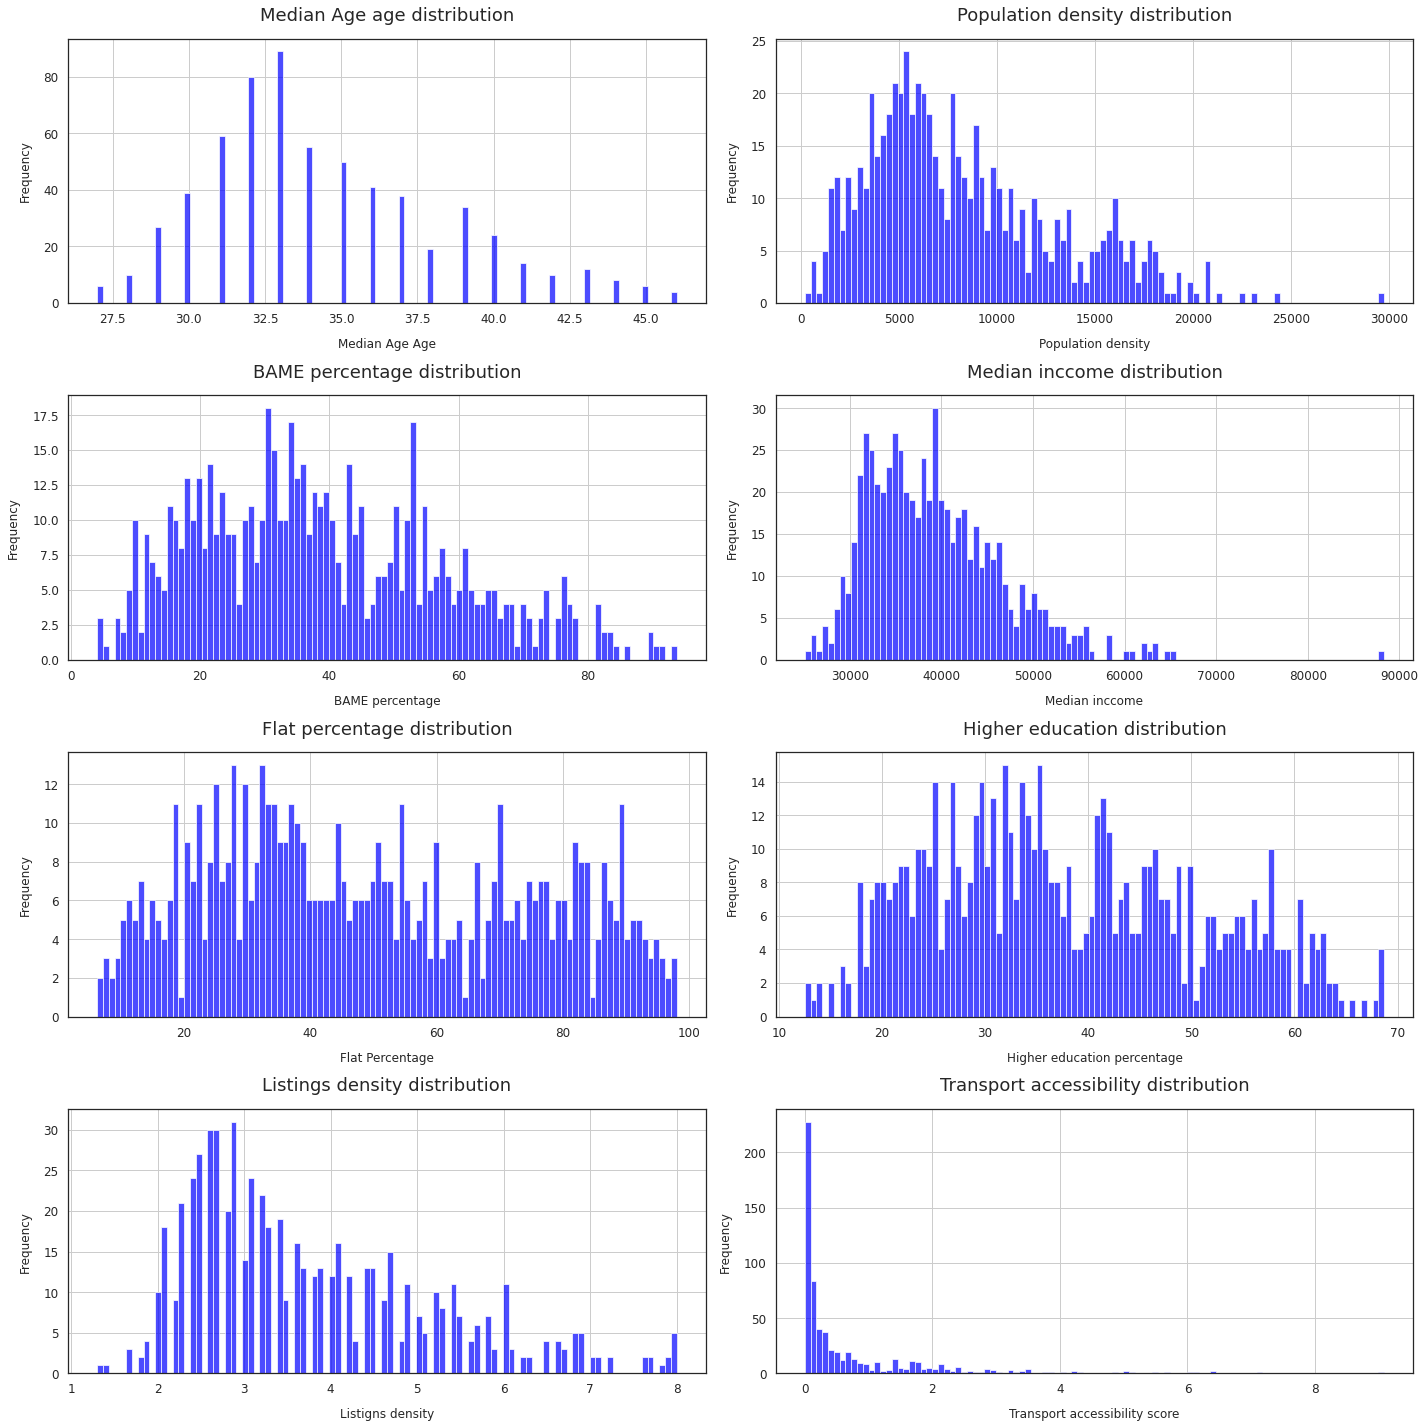

In [630]:
# code below from Philip Wilkinson : https://github.com/PhilipDW183/Convenience_store/blob/main/Convenience%20store%20exploration.ipynb

#set the columns we are interested in
columns = ['Median Age', 
       'Pop density', 
       'BAME perc',
       'Median income',
       'Flat perc', 
       'High educ perc', 
       'Transport',
       'listings_density']

#set the histogram titles
hist_titles = ["Median Age age distribution",
              "Population density distribution",
              "BAME percentage distribution",
              "Median inccome distribution",
              "Flat percentage distribution",
              "Higher education distribution",
              "Listings density distribution",
              "Transport accessibility distribution" ]
#set the acis labels
axis_labels = ["Median Age Age", 
              "Population density",
              "BAME percentage",
              "Median inccome",
              "Flat Percentage",
              "Higher education percentage",
              "Listigns density",
              "Transport accessibility score"]

#create a base axis for teh plots
fig, ax = plt.subplots(4,2, figsize = (20,20))
#flatten the axis to make it easy to iteratre over
axis = ax.flatten()

#iterate over each columns using the labels information already set up
for i, col in enumerate(columns):
    
    #create the histogram using the column
    London_profiles[col].hist(bins = 100, ax = axis[i],
                                       color = "blue",
                                       alpha = 0.7)
    #add label information
    axis[i].set_title(hist_titles[i], fontsize = 18, pad = 18)
    axis[i].set_ylabel("Frequency", fontsize  =12, labelpad = 12)
    axis[i].set_xlabel(f"{axis_labels[i]}", fontsize = 12, labelpad = 12)
    axis[i].tick_params(axis = "both", labelsize = 12)

#remove the unused axis
#axis[5].set_axis_off()
#keep the layout tight
plt.tight_layout()
#show the plot 
plt.show()

NOTE: Population, education, listings, transport are heavily skewed
Log transform?

#### Initialise the Scalers and Transformers

In [586]:
import sklearn
from sklearn.neighbors import NearestNeighbors
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import PowerTransformer, RobustScaler, StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans, DBSCAN, OPTICS
from esda.adbscan import ADBSCAN

import random
random.seed(42)    # For reproducibility
np.random.seed(42) # For reproducibility

# Make numeric display a bit neater
pd.set_option('display.float_format', lambda x: '{:,.2f}'.format(x))

In [378]:
rbs = RobustScaler(quantile_range=[0.025,0.975])
mms = MinMaxScaler(feature_range=(-1,1))
pts = PowerTransformer(method='yeo-johnson')

In [631]:
# Rescale the columns 
for c in clustA.columns:
    clustA[c] = mms.fit_transform(clustA[c].values.reshape(-1,1))
clustA.head(20)

/opt/conda/envs/sds2021/lib/python3.9/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)
/opt/conda/envs/sds2021/lib/python3.9/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)
/opt/conda/envs/sds2021/lib/python3.9/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexe

Median Age  Pop density  BAME perc  Median income  Flat perc  \
0          0.05        -0.92      -0.80          -0.58      -0.68   
10        -0.05        -0.74      -0.48          -0.60      -0.66   
17        -0.05        -0.57      -0.69          -0.45       0.06   
35         0.26        -0.77      -0.43          -0.48      -0.88   
44         0.05        -0.64      -0.36          -0.51      -0.47   
71        -0.26        -0.85      -0.30          -0.35      -0.22   
106        0.16        -0.69      -0.76          -0.62      -0.76   
108       -0.16        -0.58      -0.67          -0.43       0.12   
125        0.37        -0.65      -0.40          -0.47      -0.73   
133       -0.68        -0.49      -0.62          -0.37       0.39   
164       -0.68        -0.60      -0.57          -0.48       0.35   
218       -0.37        -0.28      -0.61          -0.35      -0.11   
258       -0.47        -0.47      -0.40          -0.70      -0.07   
296        0.16        -0.59      -0.35          -0.39      -0.69   
306        0.47        -0.73      -0.17          -0.47      -0.78   
330        0.37        -0.60      -0.70          -0.26      -0.59   
358        0.79        -0.90      -0.75          -0.44      -0.90   
365        1.00        -0.88      -0.65          -0.36      -1.00   
373        0.47        -0.82      -0.53          -0.32      -0.88   
392       -0.26        -0.68      -0.10          -0.70      -0.13   

     High educ perc  Transport  listings_density  
0             -0.54      -0.67             -1.00  
10            -0.38      -0.70             -0.99  
17             0.28      -0.55             -0.97  
35            -0.28      -0.73             -0.99  
44             0.04      -0.55             -0.97  
71             0.14      -0.64             -0.98  
106           -0.63      -0.67             -1.00  
108            0.41      -0.40             -0.98  
125           -0.22      -0.58             -0.99  
133            0.27      -0.28             -0.95  
164            0.23      -0.13             -0.94  
218            0.49      -0.16             -0.93  
258           -0.17      -0.31             -0.94  
296            0.24      -0.70             -0.99  
306           -0.09      -0.61             -0.98  
330            0.38      -0.70             -0.96  
358           -0.37      -0.82             -1.00  
365           -0.31      -0.79             -1.00  
373           -0.20      -0.64             -0.99  
392           -0.37      -0.31             -0.98

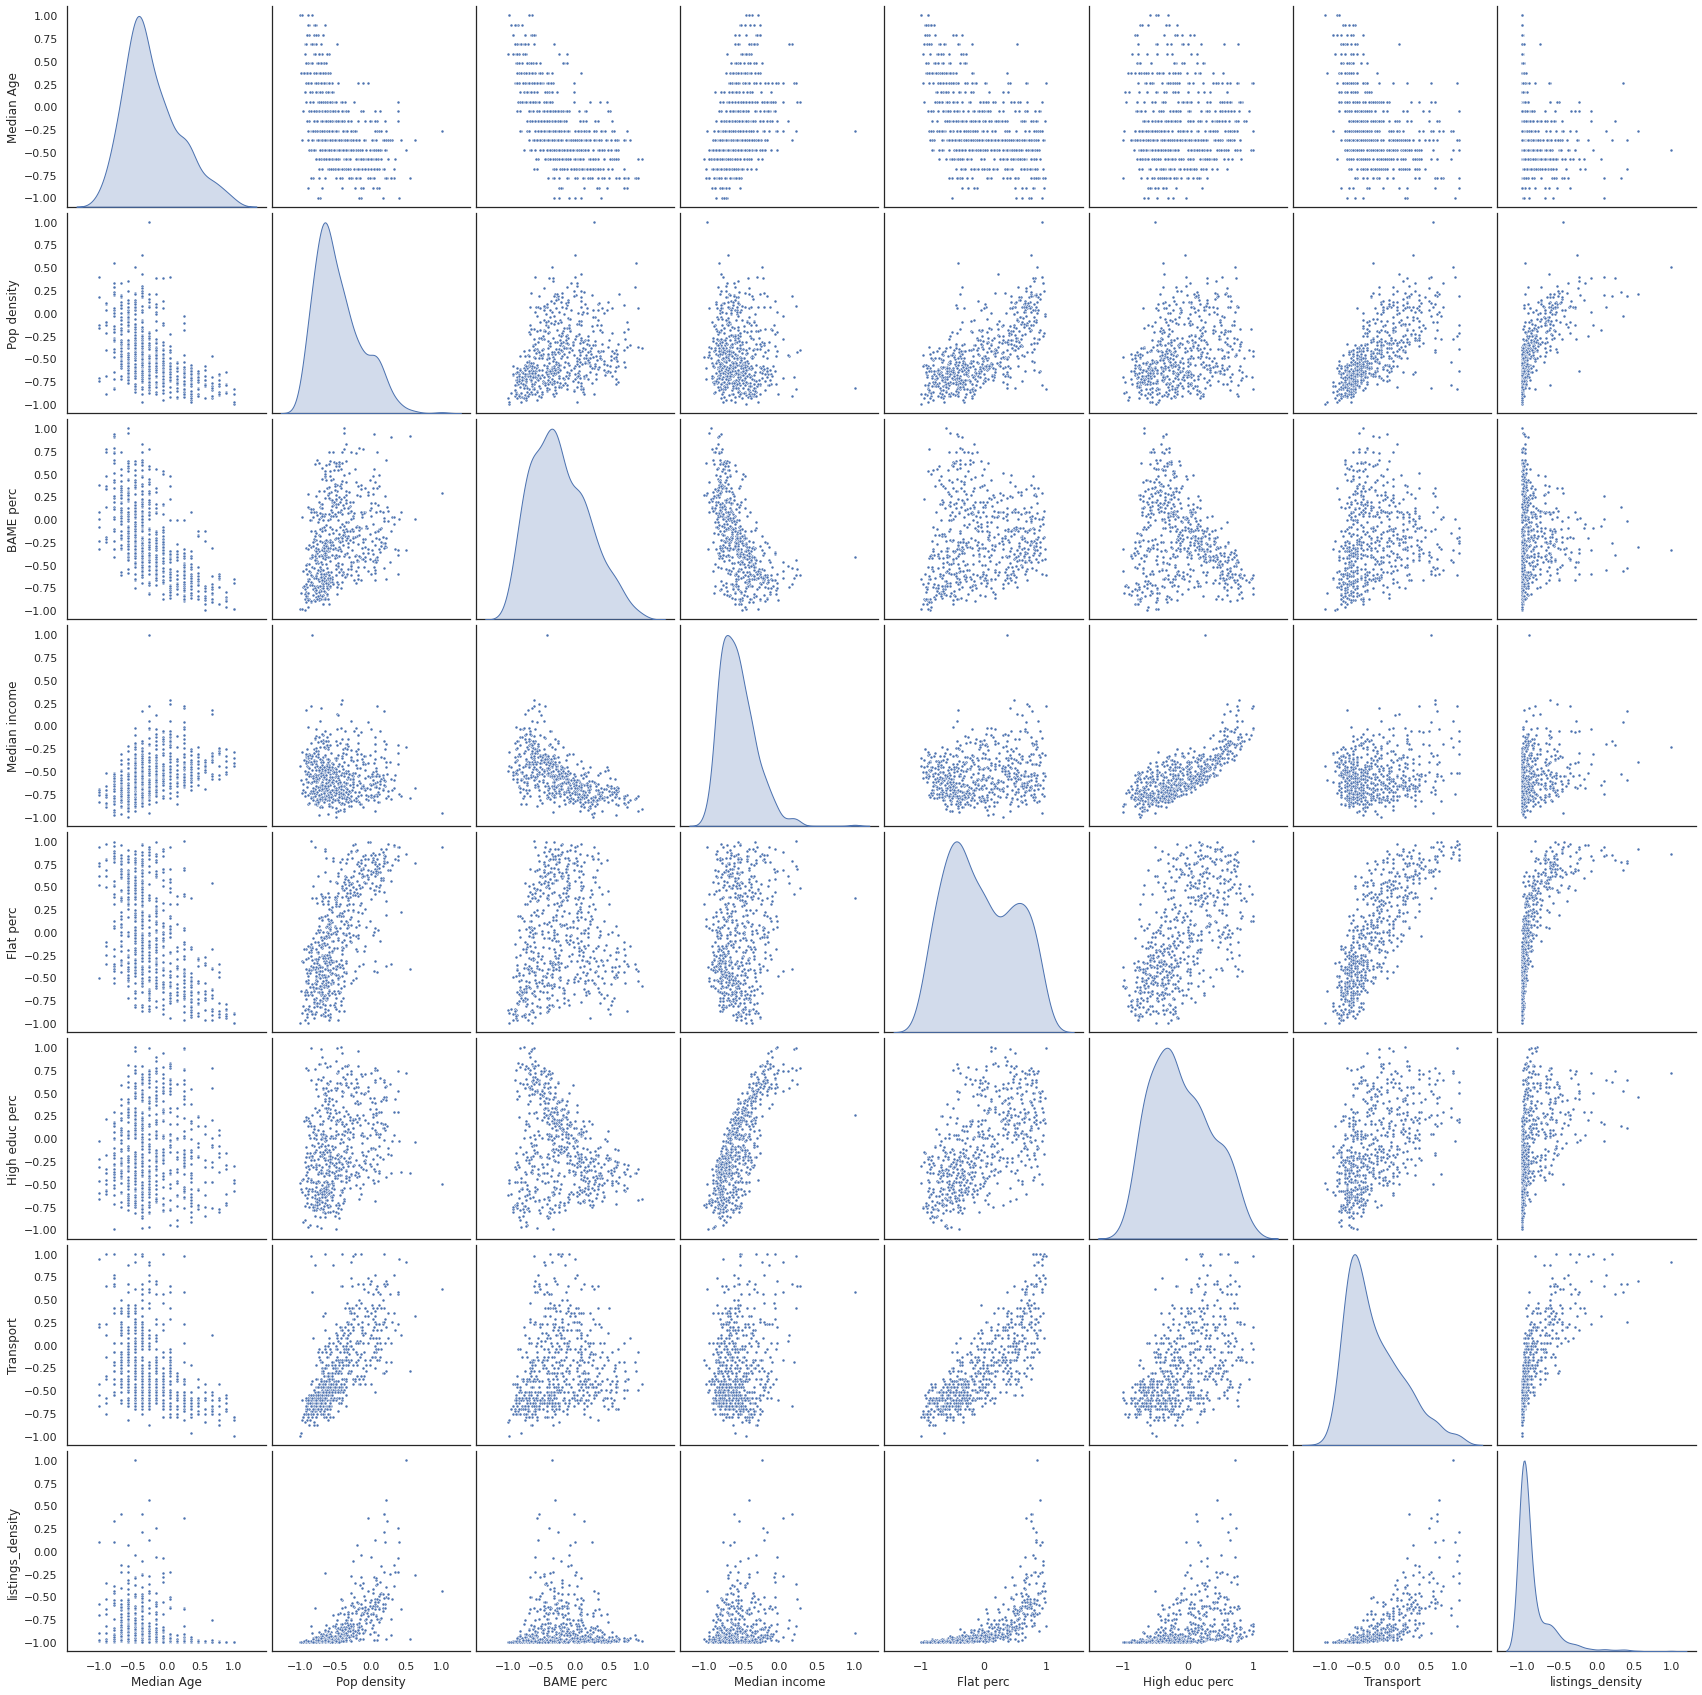

In [591]:
sns.set(style="white")
sns.pairplot(clustA, markers=".", height=3, diag_kind='kde');

In [632]:
#import the necessary libraries
from sklearn import metrics
from sklearn.cluster import KMeans

#create an empty list
list_SSE = []
#set the range of clusters to evaluate
min_k = 1
max_k = 11
range_k = range(min_k, max_k)

In [633]:
#iterate over the range
for i in range_k:
    #perform the clustering algorithm
    km = KMeans(n_clusters = i,
               init = "random",
               n_init = 10,
               max_iter = 300,
               tol = 1e-04, 
               random_state = 22)
    #fit this to the data
    km.fit(clustA[columns])
    #add the SEE score
    list_SSE.append(km.inertia_)   

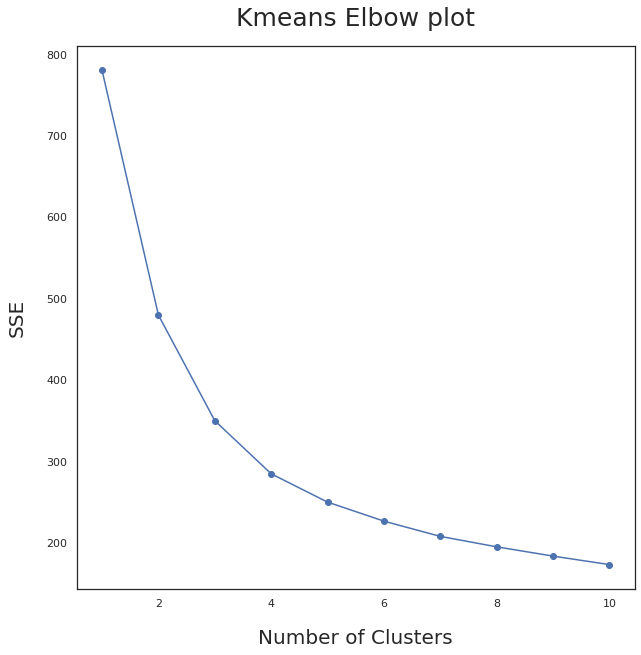

In [634]:


#create the base plots
fig, ax = plt.subplots(1,1, figsize = (10,10))

#add the data to the axis
ax.plot(range_k, list_SSE, marker = "o")

#add the necessary labels
ax.set_xlabel("Number of Clusters", fontsize = 20, labelpad = 20)
ax.set_ylabel("SSE", fontsize =20, labelpad = 20)
ax.set_title("Kmeans Elbow plot", fontsize = 25, pad = 20)

plt.show()



In [635]:


#for the silhouette score
import random

#create an empty list
silhouette = []

#iteratre over the number of clusters to evaluate
for i in range(2,10):
    
    #create an empty list to hold the averages
    average = []
    #perform the clustering algorithm several times for each number of clusters
    for x in range(1,10):
        #set the number of clusters
        k_cluster = i
        #generate a arandom seed number
        random_seed = random.randint(1,101)
        #apply the KMeans clustering algorithm
        kmeans_method = KMeans(n_clusters = k_cluster,
                              random_state = random_seed)
        kmeans_method.fit(clustA[columns])
        #extract the labels
        labels = kmeans_method.labels_
        #extract the silhouette score
        a = metrics.silhouette_score(clustA[columns], labels)
        #append the result
        average.append(a)
    #clauclate the average silhouette score for each number of clusters 
    silhouette.append(sum(average)/len(average))



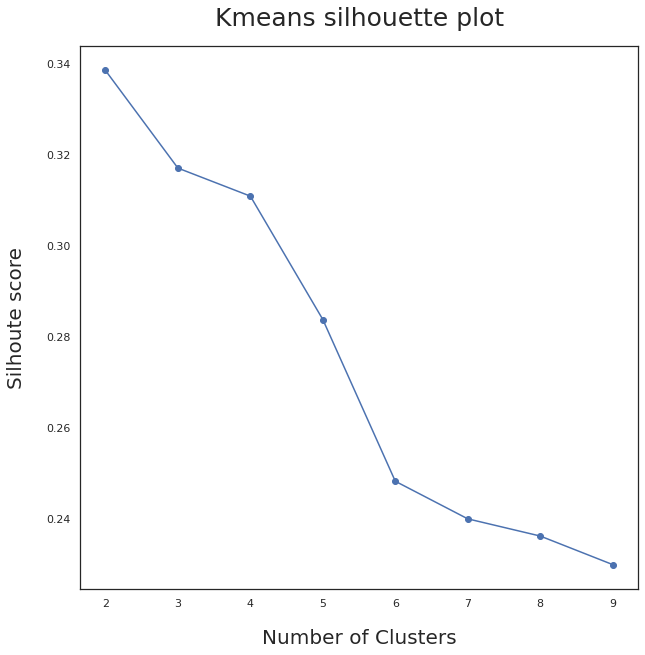

In [636]:
#create a base axis
fig, ax = plt.subplots(1,1, figsize = (10,10))

#plot the results
ax.plot(range(2,10), silhouette, marker = "o")

#add the lbels
ax.set_xlabel("Number of Clusters", fontsize = 20, labelpad = 20)
ax.set_ylabel("Silhoute score", fontsize =20, labelpad = 20)
ax.set_title("Kmeans silhouette plot", fontsize = 25, pad = 20)

plt.show()

Text(0.5, 1.0, 'Kmeans Elbow plot')

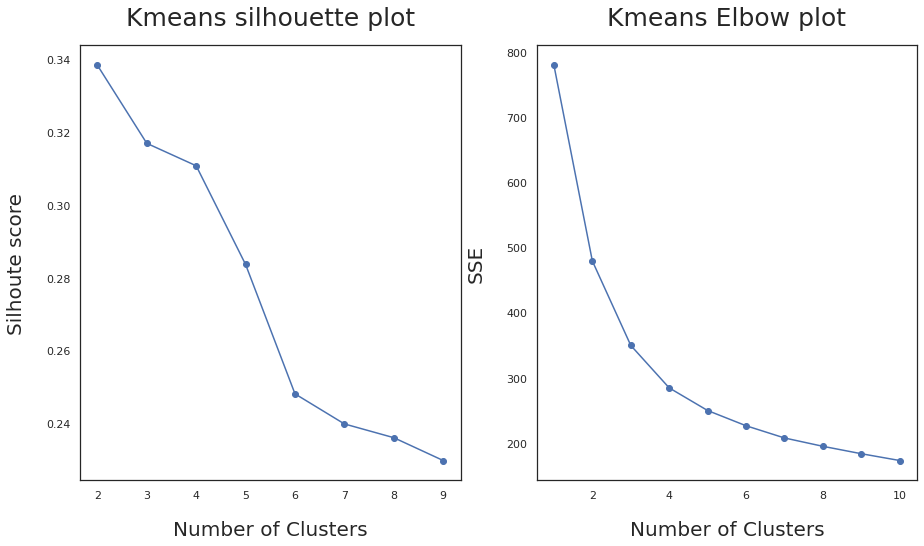

In [637]:


#combine both plots
fig, ax = plt.subplots(1,2, figsize = (15,8))

ax[0].plot(range(2,10), silhouette, marker = "o")
ax[0].set_xlabel("Number of Clusters", fontsize = 20, labelpad = 20)
ax[0].set_ylabel("Silhoute score", fontsize =20, labelpad = 20)
ax[0].set_title("Kmeans silhouette plot", fontsize = 25, pad = 20)

ax[1].plot(range_k, list_SSE, marker = "o")
ax[1].set_xlabel("Number of Clusters", fontsize = 20, labelpad = 20)
ax[1].set_ylabel("SSE", fontsize =20, labelpad = 20)
ax[1].set_title("Kmeans Elbow plot", fontsize = 25, pad = 20)



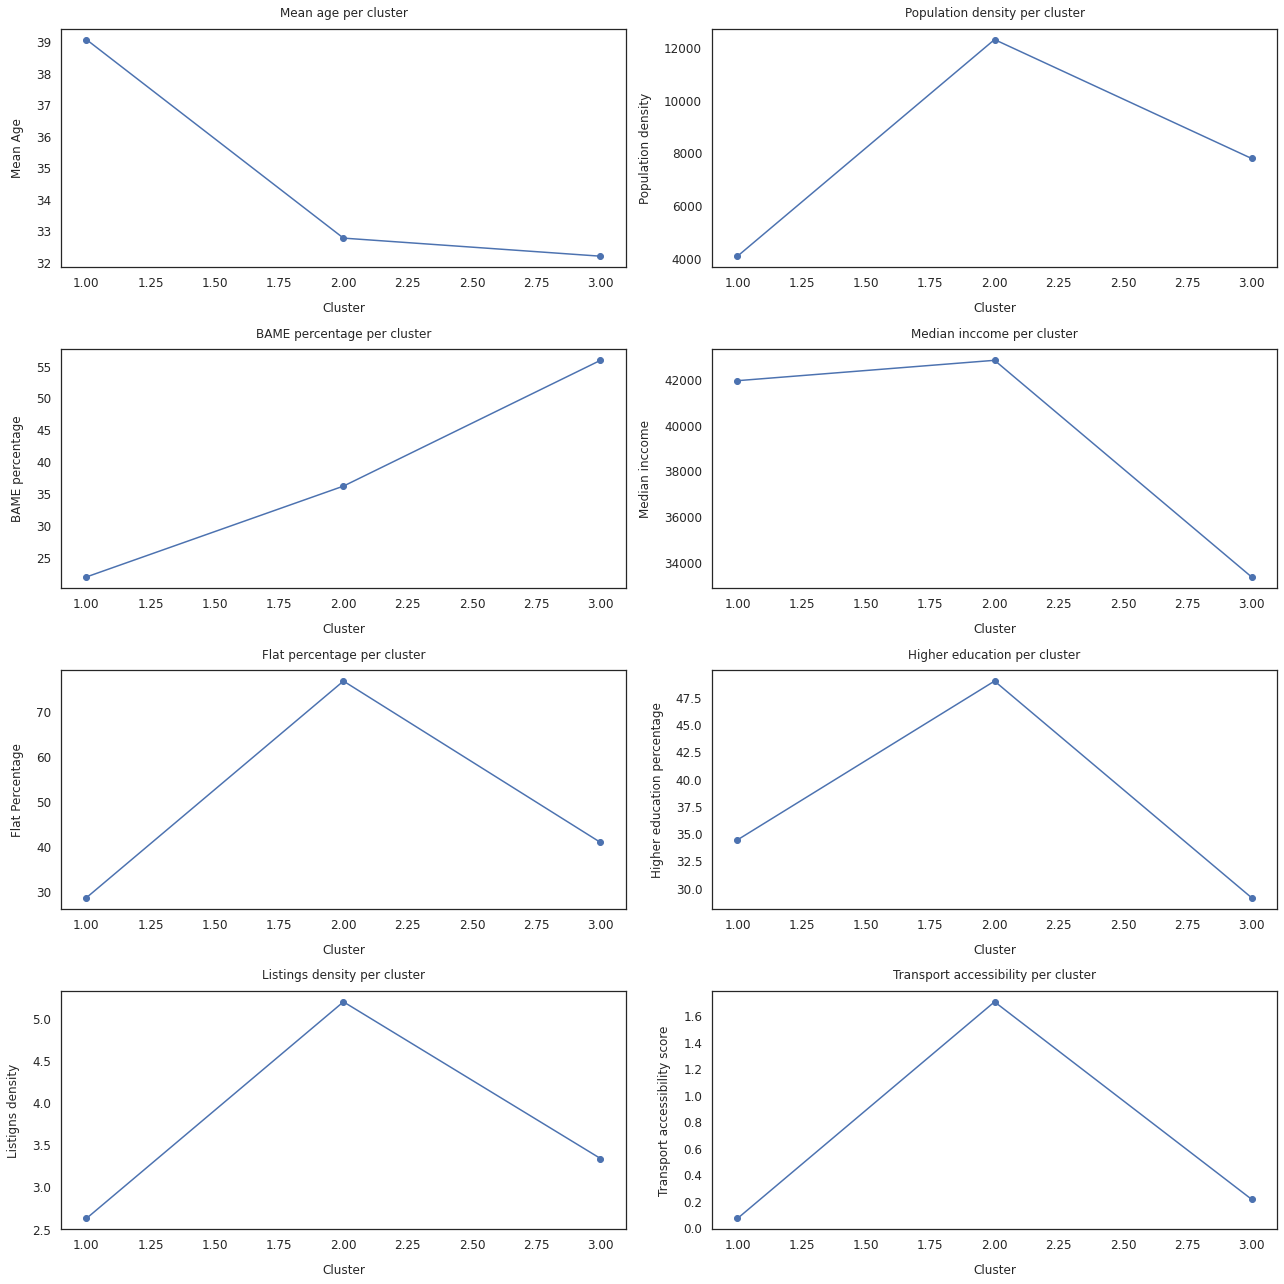

In [638]:
#perform the clustering with the chosen number of clusters
kmeans_method = KMeans(n_clusters = 3,
                        random_state = 22,
                      n_init = 10)
kmeans_method.fit(clustA[columns])


#creating plots for the results to understand the means


#set the titles
titles = [ "Mean age per cluster",
              "Population density per cluster",
              "BAME percentage per cluster",
              "Median inccome per cluster",
              "Flat percentage per cluster",
              "Higher education per cluster",
              "Listings density per cluster",
              "Transport accessibility per cluster" ]
#set the labels
ylabels = ["Mean Age", 
              "Population density",
              "BAME percentage",
              "Median inccome",
              "Flat Percentage",
              "Higher education percentage",
              "Listigns density",
              "Transport accessibility score"]
#extract the cluster labels and add these back to the data
labels = kmeans_method.labels_
London_profiles["labels"] = labels
London_profiles["labels"] = London_profiles["labels"] + 1

#create a base plot
fig, ax = plt.subplots(4,2, figsize = (18,18))
#flatten the axis
axis = ax.flatten()

#iterate over each column to create plots for each 
for i, col in enumerate(columns):
    #create an empty dictionary
    col_dict = {}
     #iterate over each label
        
    for label in London_profiles["labels"].unique().tolist():
        #crete a new dataframe for each label
        label_df = London_profiles[London_profiles["labels"] == label]
        #add the mean to the dataframe
        col_dict[label] = label_df[col].mean()
    #convert the dictionary to a dataframe
    column_df = pd.DataFrame.from_dict(col_dict, orient = "index")
    #reset the index
    column_df.reset_index(inplace=True)
    #sort the values by the index
    column_df.sort_values(by = "index", inplace=True)

        #plot the results
    axis[i].plot(column_df["index"], column_df[0],
                marker = "o")
    
    #set the plots up
    axis[i].set_title(titles[i], fontsize = 12, pad = 12)
    axis[i].set_xlabel("Cluster", fontsize = 12, labelpad = 12)
    axis[i].set_ylabel(ylabels[i], fontsize =12, labelpad = 12)
    axis[i].tick_params(axis = "both", labelsize = 12)


#set the layout to tight so no overalp
plt.tight_layout()
 

In [489]:
type(clustA["labels"])

pandas.core.series.Series

In [485]:
type(clustA["labels"].values.tolist())

list

In [493]:
print(clustA["labels"].values.tolist().unique())

AttributeError: 'list' object has no attribute 'unique'

In [490]:
type(clustA["labels"].unique())


numpy.ndarray

In [494]:
type(clustA["labels"].unique().tolist())


list

In [495]:
print(clustA["labels"].unique().tolist())

[2, 1, 3]


In [639]:


#extract the number of stores within each 
London_profiles["labels"].value_counts()



2    218
3    218
1    189
Name: labels, dtype: int64

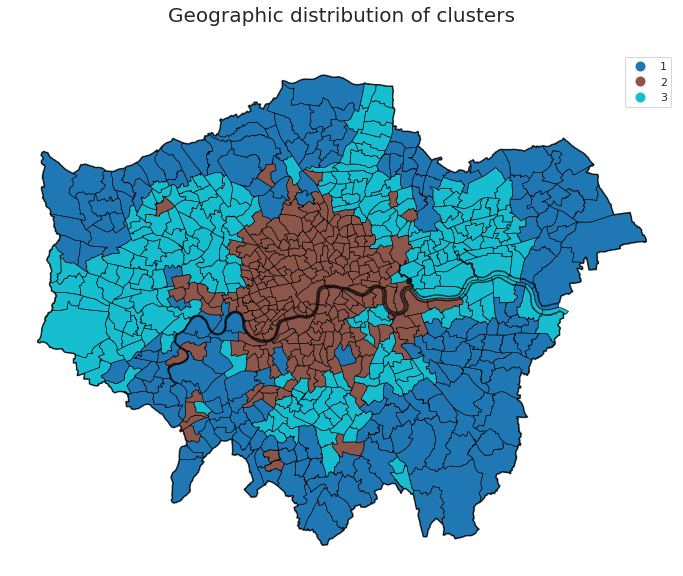

In [652]:
# map the clusters
fig, ax = plt.subplots(1,1, figsize = (12,12))
ldn_shape.boundary.plot(ax = ax, color = "black", alpha = 0.7)
London_profiles.plot(ax = ax,column='labels',categorical = True, legend=True,
          edgecolor='black',linewidth=0.6, figsize=(10,8));
#set the title
ax.set_title("Geographic distribution of clusters", fontsize = 20,
            pad = 30)
ax.set_axis_off()

# Repeat with different scaling?

In [775]:
London_profiles["ln_income"]= np.log(London_profiles["Median income"])
London_profiles["ln_listings"]=np.log(London_profiles["listings_density"])
London_profiles

last_review                     NAME   GSS_CODE  HECTARES  LB_GSS_CD  \
0       2021-10-09       Chessington South  E05000405    755.17  E09000021   
10      2021-03-20  Tolworth and Hook Rise  E05000414    259.46  E09000021   
17      2021-09-09              Berrylands  E05000401    145.39  E09000021   
35      2020-02-16               Alexandra  E05000400    268.51  E09000021   
44      2019-02-17                Beverley  E05000402    187.82  E09000021   
...            ...                     ...        ...       ...        ...   
48600   2019-10-05               Whalebone  E05000042    155.40  E09000002   
48605   2021-09-13               Eastbrook  E05000030    345.06  E09000002   
48611   2021-09-13          Chadwell Heath  E05000029    338.42  E09000002   
48622   2017-11-29                Parsloes  E05000037    124.38  E09000002   
48626   2018-07-08          City of London  E09000001    314.94  E09000001   

                    BOROUGH  \
0      Kingston upon Thames   
10     Kingston upon Thames   
17     Kingston upon Thames   
35     Kingston upon Thames   
44     Kingston upon Thames   
...                     ...   
48600  Barking and Dagenham   
48605  Barking and Dagenham   
48611  Barking and Dagenham   
48622  Barking and Dagenham   
48626        City of London   

                                                geometry  listings_count  \
0      POLYGON ((516401.600 160201.800, 516407.300 16...              10   
10     POLYGON ((517829.600 165447.100, 517837.100 16...               7   
17     POLYGON ((518107.500 167303.400, 518114.300 16...              18   
35     POLYGON ((520480.000 166909.800, 520490.700 16...               9   
44     POLYGON ((522071.000 168144.900, 522063.900 16...              27   
...                                                  ...             ...   
48600  POLYGON ((549410.700 187450.700, 549391.200 18...               5   
48605  POLYGON ((549991.500 184928.500, 549988.900 18...               6   
48611  POLYGON ((547715.200 187914.200, 547712.500 18...              11   
48622  POLYGON ((547381.600 185753.600, 547377.500 18...               4   
48626  POLYGON ((531361.300 180691.000, 531313.200 18...             248   

       listings_density  Median Age  Pop density  BAME perc  Median income  \
0                  0.01       37.00     1,375.00      13.00      38,310.00   
10                 0.03       36.00     3,961.50      27.20      37,840.00   
17                 0.12       36.00     6,466.70      18.10      42,330.00   
35                 0.03       39.00     3,537.00      29.80      41,390.00   
44                 0.14       37.00     5,447.40      32.60      40,700.00   
...                 ...         ...          ...        ...            ...   
48600              0.03       34.00     6,781.30      44.00      37,180.00   
48605              0.02       36.00     3,028.60      24.80      37,400.00   
48611              0.03       34.00     2,985.30      37.90      33,920.00   
48622              0.03       33.00     8,250.00      30.90      31,860.00   
48626              0.79       39.00     2,538.10      21.40      63,620.00   

       Flat perc  High educ perc  Transport  labels  ln_income  ln_listings  \
0          20.90           25.30       2.40       1      10.55        -4.32   
10         22.00           30.00       2.30       1      10.54        -3.61   
17         54.70           48.40       2.80       6      10.65        -2.09   
35         12.00           32.70       2.20       1      10.63        -3.40   
44         30.40           41.70       2.80       6      10.61        -1.94   
...          ...             ...        ...     ...        ...          ...   
48600      27.80           22.40       2.90       5      10.52        -3.44   
48605      18.40           18.50       2.30       1      10.53        -4.05   
48611      34.50           19.50       2.30       5      10.43        -3.43   
48622      12.60           16.00       2.70       5     

In [778]:
colsB=['Median Age', 
       'Pop density', 
       'BAME perc',
       'ln_income',
       'Flat perc', 
       'High educ perc', 
       'Transport',
       'ln_listings']

clustB=London_profiles[colsB]
clustB

Median Age  Pop density  BAME perc  ln_income  Flat perc  \
0           37.00     1,375.00      13.00      10.55      20.90   
10          36.00     3,961.50      27.20      10.54      22.00   
17          36.00     6,466.70      18.10      10.65      54.70   
35          39.00     3,537.00      29.80      10.63      12.00   
44          37.00     5,447.40      32.60      10.61      30.40   
...           ...          ...        ...        ...        ...   
48600       34.00     6,781.30      44.00      10.52      27.80   
48605       36.00     3,028.60      24.80      10.53      18.40   
48611       34.00     2,985.30      37.90      10.43      34.50   
48622       33.00     8,250.00      30.90      10.37      12.60   
48626       39.00     2,538.10      21.40      11.06      98.00   

       High educ perc  Transport  ln_listings  
0               25.30       2.40        -4.32  
10              30.00       2.30        -3.61  
17              48.40       2.80        -2.09  
35              32.70       2.20        -3.40  
44              41.70       2.80        -1.94  
...               ...        ...          ...  
48600           22.40       2.90        -3.44  
48605           18.50       2.30        -4.05  
48611           19.50       2.30        -3.43  
48622           16.00       2.70        -3.44  
48626           68.40       7.90        -0.24  

[625 rows x 8 columns]

In [752]:
rbs = RobustScaler(quantile_range=[0.025,0.975])
mms = MinMaxScaler(feature_range=(-1,1))
pts = PowerTransformer(method='yeo-johnson')

In [779]:
# Rescale the columns 
for c in clustB.columns:
    clustB[c] = pts.fit_transform(clustB[c].values.reshape(-1,1))
clustB.head(20)

/opt/conda/envs/sds2021/lib/python3.9/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)
/opt/conda/envs/sds2021/lib/python3.9/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)
/opt/conda/envs/sds2021/lib/python3.9/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexe

Median Age  Pop density  BAME perc  ln_income  Flat perc  High educ perc  \
0          0.76        -1.98      -1.56       0.04      -1.22           -0.96   
10         0.53        -0.87      -0.52      -0.03      -1.16           -0.52   
17         0.53        -0.20      -1.14       0.58       0.31            0.87   
35         1.16        -1.01      -0.36       0.47      -1.79           -0.29   
44         0.76        -0.45      -0.20       0.38      -0.72            0.41   
71         0.02        -1.44      -0.04       0.96      -0.19            0.61   
106        0.97        -0.65      -1.39      -0.13      -1.44           -1.21   
108        0.29        -0.22      -1.07       0.68       0.42            1.11   
125        1.34        -0.47      -0.30       0.51      -1.36           -0.15   
133       -1.27         0.10      -0.91       0.89       0.85            0.86   
164       -1.27        -0.28      -0.78       0.47       0.78            0.78   
218       -0.26         0.66      -0.90       0.96       0.02            1.25   
258       -0.57         0.16      -0.29      -0.56       0.08           -0.04   
296        0.97        -0.25      -0.15       0.82      -1.24            0.80   
306        1.52        -0.81       0.27       0.52      -1.50            0.13   
330        1.34        -0.28      -1.18       1.25      -1.00            1.06   
358        1.97        -1.83      -1.35       0.62      -1.88           -0.50   
365        2.22        -1.69      -1.02       0.93      -2.25           -0.35   
373        1.52        -1.30      -0.64       1.06      -1.82           -0.11   
392        0.02        -0.61       0.42      -0.57      -0.03           -0.51   

     Transport  ln_listings  
0        -1.13        -1.52  
10       -1.26        -1.15  
17       -0.64        -0.31  
35       -1.41        -1.03  
44       -0.64        -0.23  
71       -1.00        -0.56  
106      -1.13        -1.65  
108      -0.14        -0.42  
125      -0.75        -0.88  
133       0.19         0.02  
164       0.54         0.15  
218       0.47         0.23  
258       0.11         0.15  
296      -1.26        -0.71  
306      -0.87        -0.38  
330      -1.26        -0.11  
358      -1.89        -1.72  
365      -1.72        -1.55  
373      -1.00        -0.96  
392       0.11        -0.51

In [780]:
clustB.columns

Index(['Median Age', 'Pop density', 'BAME perc', 'ln_income', 'Flat perc',
       'High educ perc', 'Transport', 'ln_listings'],
      dtype='object')

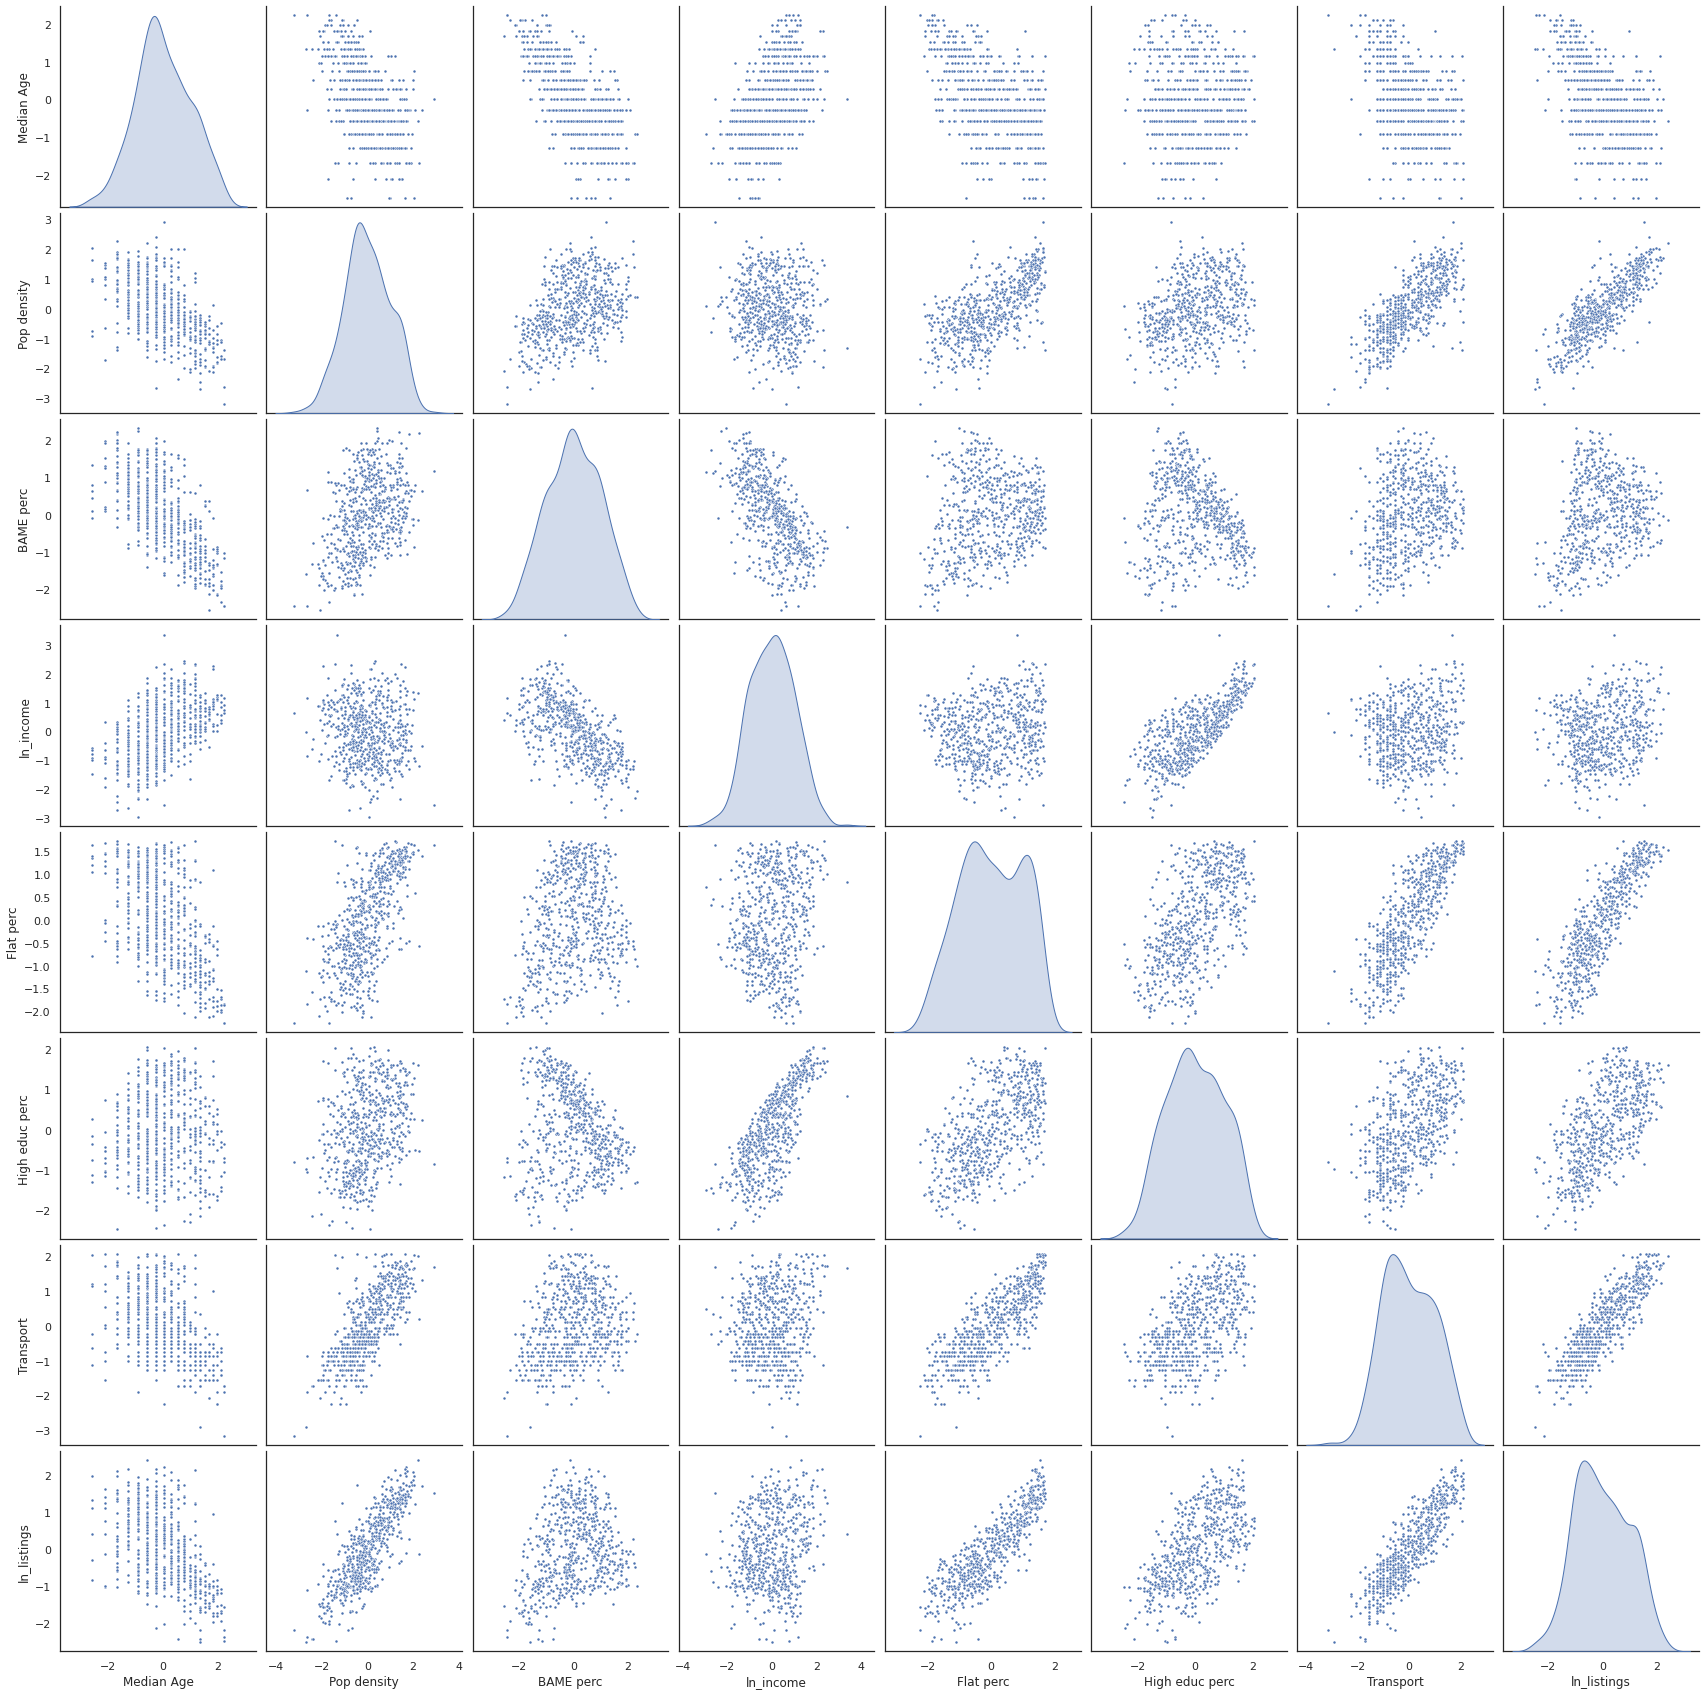

In [712]:
sns.set(style="white")
sns.pairplot(clustB, markers=".", height=3, diag_kind='kde');

In [781]:
columns=['Median Age', 'Pop density', 'BAME perc', 'Flat perc', 'High educ perc',
       'Transport', 'ln_income', 'ln_listings']

In [782]:
#create an empty list
list_SSE = []
#set the range of clusters to evaluate
min_k = 1
max_k = 20
range_k = range(min_k, max_k)

In [783]:
#iterate over the range
for i in range_k:
    #perform the clustering algorithm
    km = KMeans(n_clusters = i,
               init = "random",
               n_init = 10,
               max_iter = 300,
               tol = 1e-04, 
               random_state = 22)
    #fit this to the data
    km.fit(clustB[columns])
    #add the SEE score
    list_SSE.append(km.inertia_)   

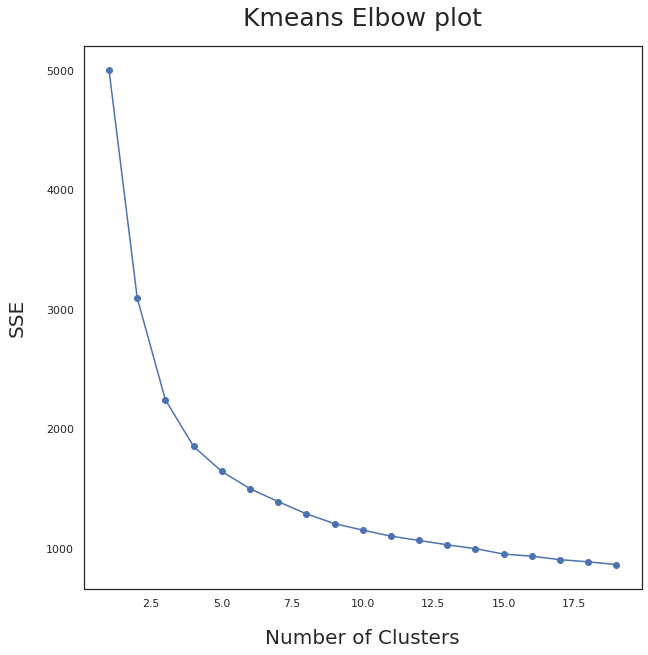

In [784]:


#create the base plots
fig, ax = plt.subplots(1,1, figsize = (10,10))

#add the data to the axis
ax.plot(range_k, list_SSE, marker = "o")

#add the necessary labels
ax.set_xlabel("Number of Clusters", fontsize = 20, labelpad = 20)
ax.set_ylabel("SSE", fontsize =20, labelpad = 20)
ax.set_title("Kmeans Elbow plot", fontsize = 25, pad = 20)

plt.show()



In [785]:


#for the silhouette score
import random

#create an empty list
silhouette = []

#iteratre over the number of clusters to evaluate
for i in range(2,20):
    
    #create an empty list to hold the averages
    average = []
    #perform the clustering algorithm several times for each number of clusters
    for x in range(1,20):
        #set the number of clusters
        k_cluster = i
        #generate a arandom seed number
        random_seed = random.randint(1,101)
        #apply the KMeans clustering algorithm
        kmeans_method = KMeans(n_clusters = k_cluster,
                              random_state = random_seed)
        kmeans_method.fit(clustB[columns])
        #extract the labels
        labels = kmeans_method.labels_
        #extract the silhouette score
        a = metrics.silhouette_score(clustB[columns], labels)
        #append the result
        average.append(a)
    #clauclate the average silhouette score for each number of clusters 
    silhouette.append(sum(average)/len(average))



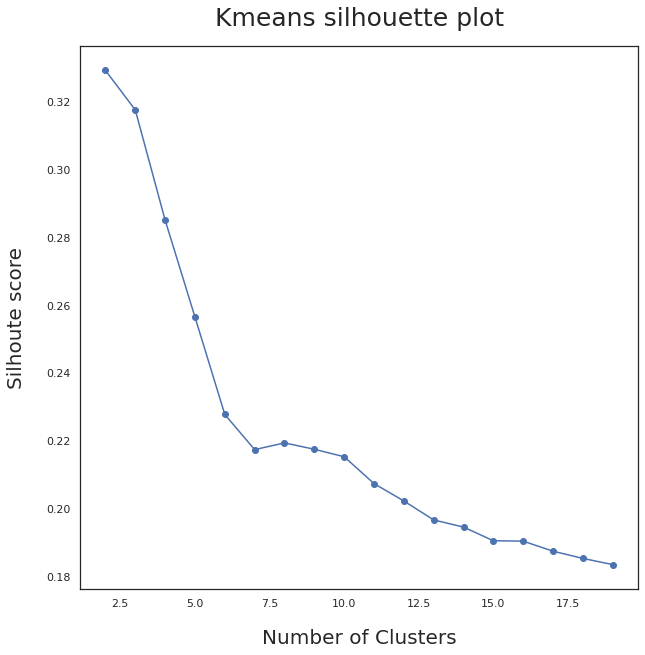

In [786]:
#create a base axis
fig, ax = plt.subplots(1,1, figsize = (10,10))

#plot the results
ax.plot(range(2,20), silhouette, marker = "o")

#add the lbels
ax.set_xlabel("Number of Clusters", fontsize = 20, labelpad = 20)
ax.set_ylabel("Silhoute score", fontsize =20, labelpad = 20)
ax.set_title("Kmeans silhouette plot", fontsize = 25, pad = 20)

plt.show()

Text(0.5, 1.0, 'Kmeans Elbow plot')

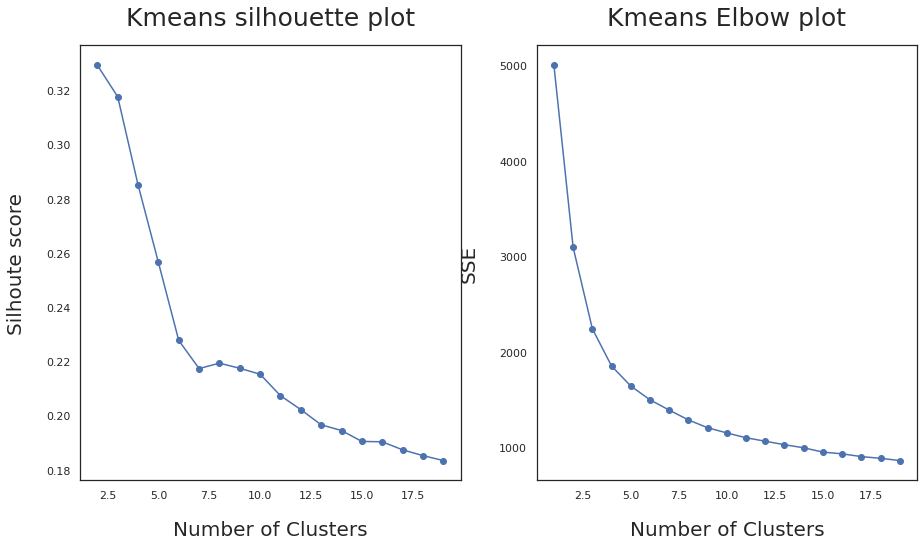

In [787]:
#combine both plots
fig, ax = plt.subplots(1,2, figsize = (15,8))

ax[0].plot(range(2,20), silhouette, marker = "o")
ax[0].set_xlabel("Number of Clusters", fontsize = 20, labelpad = 20)
ax[0].set_ylabel("Silhoute score", fontsize =20, labelpad = 20)
ax[0].set_title("Kmeans silhouette plot", fontsize = 25, pad = 20)

ax[1].plot(range_k, list_SSE, marker = "o")
ax[1].set_xlabel("Number of Clusters", fontsize = 20, labelpad = 20)
ax[1].set_ylabel("SSE", fontsize =20, labelpad = 20)
ax[1].set_title("Kmeans Elbow plot", fontsize = 25, pad = 20)



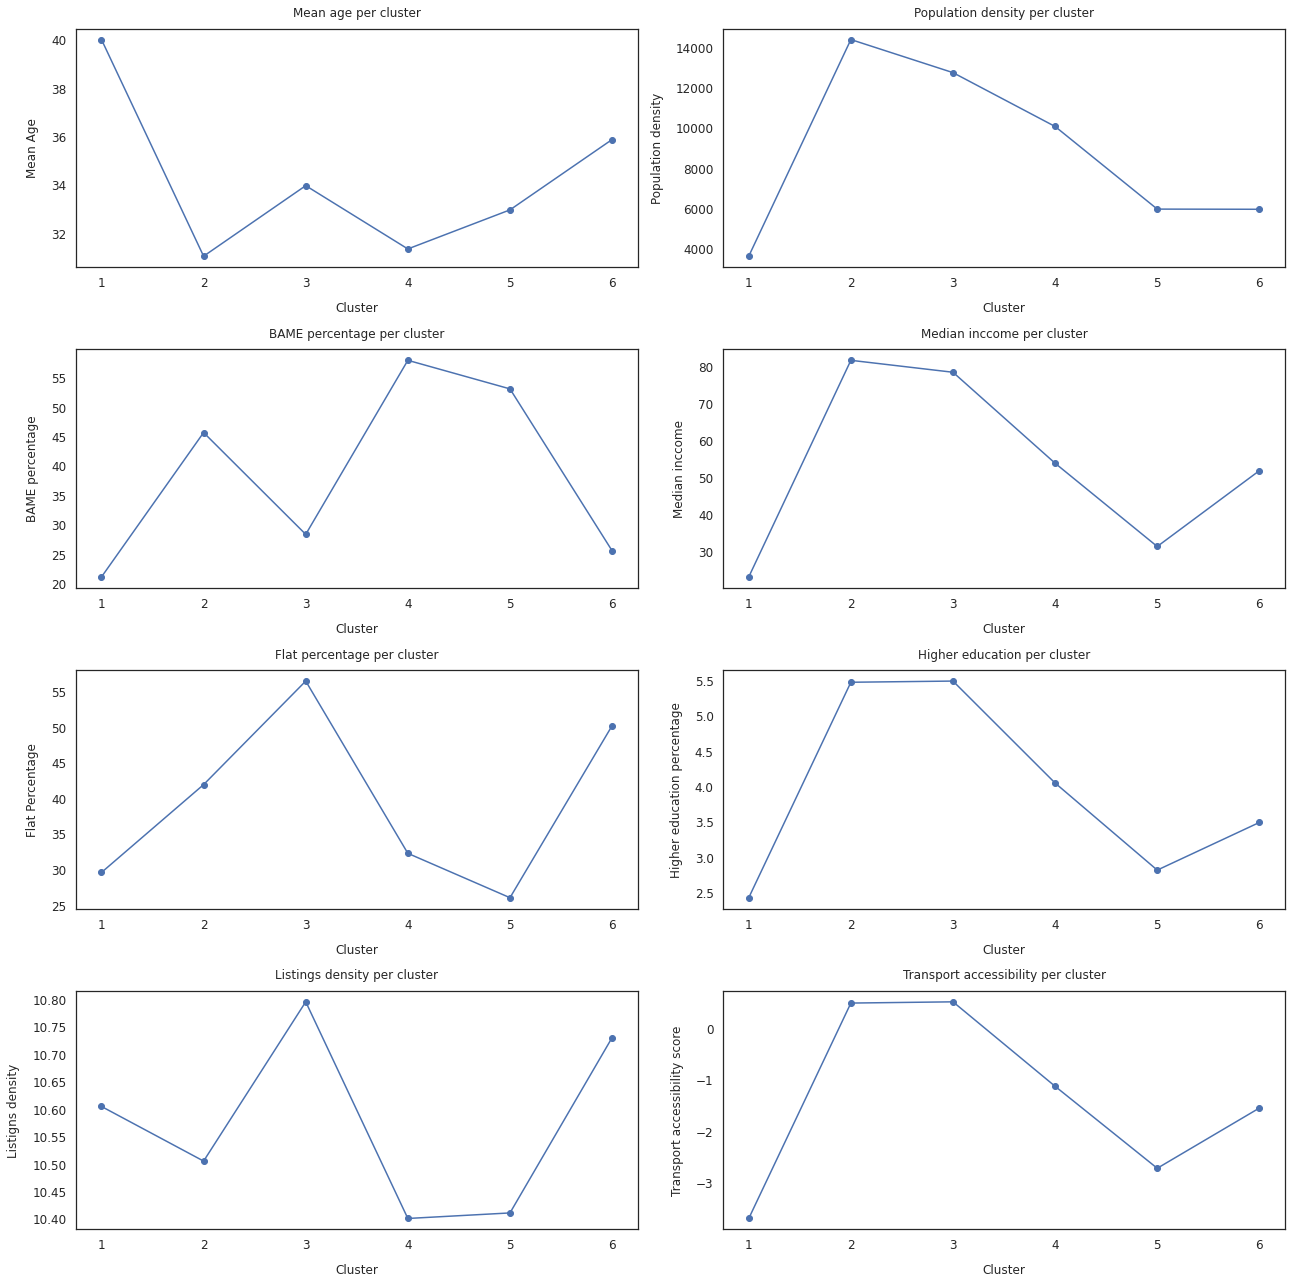

In [788]:
#perform the clustering with the chosen number of clusters
kmeans_method = KMeans(n_clusters = 6,
                        random_state = 22,
                      n_init = 10)
kmeans_method.fit(clustB[columns])


#creating plots for the results to understand the means


#set the titles
titles = [ "Mean age per cluster",
              "Population density per cluster",
              "BAME percentage per cluster",
              "Median inccome per cluster",
              "Flat percentage per cluster",
              "Higher education per cluster",
              "Listings density per cluster",
              "Transport accessibility per cluster" ]
#set the labels
ylabels = ["Mean Age", 
              "Population density",
              "BAME percentage",
              "Median inccome",
              "Flat Percentage",
              "Higher education percentage",
              "Listigns density",
              "Transport accessibility score"]
#extract the cluster labels and add these back to the data
labels = kmeans_method.labels_
London_profiles["labels"] = labels
London_profiles["labels"] = London_profiles["labels"] + 1

#create a base plot
fig, ax = plt.subplots(4,2, figsize = (18,18))
#flatten the axis
axis = ax.flatten()

#iterate over each column to create plots for each 
for i, col in enumerate(columns):
    #create an empty dictionary
    col_dict = {}
     #iterate over each label
        
    for label in London_profiles["labels"].unique().tolist():
        #crete a new dataframe for each label
        label_df = London_profiles[London_profiles["labels"] == label]
        #add the mean to the dataframe
        col_dict[label] = label_df[col].mean()
    #convert the dictionary to a dataframe
    column_df = pd.DataFrame.from_dict(col_dict, orient = "index")
    #reset the index
    column_df.reset_index(inplace=True)
    #sort the values by the index
    column_df.sort_values(by = "index", inplace=True)

        #plot the results
    axis[i].plot(column_df["index"], column_df[0],
                marker = "o")
    
    #set the plots up
    axis[i].set_title(titles[i], fontsize = 12, pad = 12)
    axis[i].set_xlabel("Cluster", fontsize = 12, labelpad = 12)
    axis[i].set_ylabel(ylabels[i], fontsize =12, labelpad = 12)
    axis[i].tick_params(axis = "both", labelsize = 12)


#set the layout to tight so no overalp
plt.tight_layout()
 

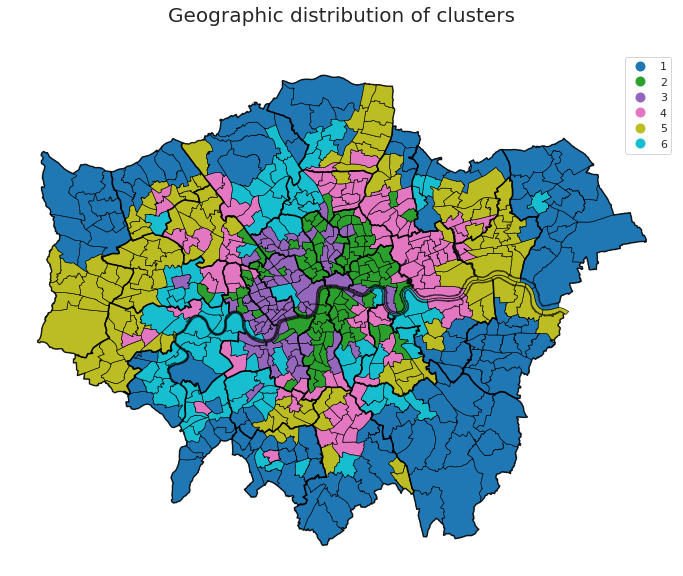

In [774]:
# map the clusters
fig, ax = plt.subplots(1,1, figsize = (12,12))
boros.boundary.plot(ax = ax, color = "black", alpha = 0.7)
London_profiles.plot(ax = ax,column='labels',categorical = True, legend=True,
          edgecolor='black',linewidth=0.6, figsize=(10,8));
#set the title
ax.set_title("Geographic distribution of clusters", fontsize = 20,
            pad = 30)
ax.set_axis_off()

# Hierarchical

In [723]:
London_profiles["ln_income"]= np.log(London_profiles["Median income"])
London_profiles["ln_listings"]=np.log(London_profiles["listings_density"])
London_profiles

last_review                     NAME   GSS_CODE  HECTARES  LB_GSS_CD  \
0       2021-10-09       Chessington South  E05000405    755.17  E09000021   
10      2021-03-20  Tolworth and Hook Rise  E05000414    259.46  E09000021   
17      2021-09-09              Berrylands  E05000401    145.39  E09000021   
35      2020-02-16               Alexandra  E05000400    268.51  E09000021   
44      2019-02-17                Beverley  E05000402    187.82  E09000021   
...            ...                     ...        ...       ...        ...   
48600   2019-10-05               Whalebone  E05000042    155.40  E09000002   
48605   2021-09-13               Eastbrook  E05000030    345.06  E09000002   
48611   2021-09-13          Chadwell Heath  E05000029    338.42  E09000002   
48622   2017-11-29                Parsloes  E05000037    124.38  E09000002   
48626   2018-07-08          City of London  E09000001    314.94  E09000001   

                    BOROUGH  \
0      Kingston upon Thames   
10     Kingston upon Thames   
17     Kingston upon Thames   
35     Kingston upon Thames   
44     Kingston upon Thames   
...                     ...   
48600  Barking and Dagenham   
48605  Barking and Dagenham   
48611  Barking and Dagenham   
48622  Barking and Dagenham   
48626        City of London   

                                                geometry  listings_count  \
0      POLYGON ((516401.600 160201.800, 516407.300 16...              10   
10     POLYGON ((517829.600 165447.100, 517837.100 16...               7   
17     POLYGON ((518107.500 167303.400, 518114.300 16...              18   
35     POLYGON ((520480.000 166909.800, 520490.700 16...               9   
44     POLYGON ((522071.000 168144.900, 522063.900 16...              27   
...                                                  ...             ...   
48600  POLYGON ((549410.700 187450.700, 549391.200 18...               5   
48605  POLYGON ((549991.500 184928.500, 549988.900 18...               6   
48611  POLYGON ((547715.200 187914.200, 547712.500 18...              11   
48622  POLYGON ((547381.600 185753.600, 547377.500 18...               4   
48626  POLYGON ((531361.300 180691.000, 531313.200 18...             248   

       listings_density  Median Age  Pop density  BAME perc  Median income  \
0                  0.01       37.00     1,375.00      13.00      38,310.00   
10                 0.03       36.00     3,961.50      27.20      37,840.00   
17                 0.12       36.00     6,466.70      18.10      42,330.00   
35                 0.03       39.00     3,537.00      29.80      41,390.00   
44                 0.14       37.00     5,447.40      32.60      40,700.00   
...                 ...         ...          ...        ...            ...   
48600              0.03       34.00     6,781.30      44.00      37,180.00   
48605              0.02       36.00     3,028.60      24.80      37,400.00   
48611              0.03       34.00     2,985.30      37.90      33,920.00   
48622              0.03       33.00     8,250.00      30.90      31,860.00   
48626              0.79       39.00     2,538.10      21.40      63,620.00   

       Flat perc  High educ perc  Transport  labels  ln_income  ln_listings  
0          20.90           25.30       2.40       5      10.55        -4.32  
10         22.00           30.00       2.30       5      10.54        -3.61  
17         54.70           48.40       2.80       4      10.65        -2.09  
35         12.00           32.70       2.20       5      10.63        -3.40  
44         30.40           41.70       2.80       4      10.61        -1.94  
...          ...             ...        ...     ...        ...          ...  
48600      27.80           22.40       2.90       2      10.52        -3.44  
48605      18.40           18.50       2.30       5      10.53        -4.05  
48611      34.50           19.50       2.30       2      10.43        -3.43  
48622      12.60           16.00       2.70       2      10.37    

In [724]:
colsB=['Median Age', 
       'Pop density', 
       'BAME perc',
       'ln_income',
       'Flat perc', 
       'High educ perc', 
       'Transport',
       'ln_listings']

clustB=London_profiles[colsB]
clustB

Median Age  Pop density  BAME perc  ln_income  Flat perc  \
0           37.00     1,375.00      13.00      10.55      20.90   
10          36.00     3,961.50      27.20      10.54      22.00   
17          36.00     6,466.70      18.10      10.65      54.70   
35          39.00     3,537.00      29.80      10.63      12.00   
44          37.00     5,447.40      32.60      10.61      30.40   
...           ...          ...        ...        ...        ...   
48600       34.00     6,781.30      44.00      10.52      27.80   
48605       36.00     3,028.60      24.80      10.53      18.40   
48611       34.00     2,985.30      37.90      10.43      34.50   
48622       33.00     8,250.00      30.90      10.37      12.60   
48626       39.00     2,538.10      21.40      11.06      98.00   

       High educ perc  Transport  ln_listings  
0               25.30       2.40        -4.32  
10              30.00       2.30        -3.61  
17              48.40       2.80        -2.09  
35              32.70       2.20        -3.40  
44              41.70       2.80        -1.94  
...               ...        ...          ...  
48600           22.40       2.90        -3.44  
48605           18.50       2.30        -4.05  
48611           19.50       2.30        -3.43  
48622           16.00       2.70        -3.44  
48626           68.40       7.90        -0.24  

[625 rows x 8 columns]

In [378]:
rbs = RobustScaler(quantile_range=[0.025,0.975])
mms = MinMaxScaler(feature_range=(-1,1))
pts = PowerTransformer(method='yeo-johnson')

In [725]:
# Rescale the columns 
for c in clustB.columns:
    clustB[c] = pts.fit_transform(clustB[c].values.reshape(-1,1))
clustB.head(20)

/opt/conda/envs/sds2021/lib/python3.9/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)
/opt/conda/envs/sds2021/lib/python3.9/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)
/opt/conda/envs/sds2021/lib/python3.9/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexe

Median Age  Pop density  BAME perc  ln_income  Flat perc  High educ perc  \
0          0.76        -1.98      -1.56       0.04      -1.22           -0.96   
10         0.53        -0.87      -0.52      -0.03      -1.16           -0.52   
17         0.53        -0.20      -1.14       0.58       0.31            0.87   
35         1.16        -1.01      -0.36       0.47      -1.79           -0.29   
44         0.76        -0.45      -0.20       0.38      -0.72            0.41   
71         0.02        -1.44      -0.04       0.96      -0.19            0.61   
106        0.97        -0.65      -1.39      -0.13      -1.44           -1.21   
108        0.29        -0.22      -1.07       0.68       0.42            1.11   
125        1.34        -0.47      -0.30       0.51      -1.36           -0.15   
133       -1.27         0.10      -0.91       0.89       0.85            0.86   
164       -1.27        -0.28      -0.78       0.47       0.78            0.78   
218       -0.26         0.66      -0.90       0.96       0.02            1.25   
258       -0.57         0.16      -0.29      -0.56       0.08           -0.04   
296        0.97        -0.25      -0.15       0.82      -1.24            0.80   
306        1.52        -0.81       0.27       0.52      -1.50            0.13   
330        1.34        -0.28      -1.18       1.25      -1.00            1.06   
358        1.97        -1.83      -1.35       0.62      -1.88           -0.50   
365        2.22        -1.69      -1.02       0.93      -2.25           -0.35   
373        1.52        -1.30      -0.64       1.06      -1.82           -0.11   
392        0.02        -0.61       0.42      -0.57      -0.03           -0.51   

     Transport  ln_listings  
0        -1.13        -1.52  
10       -1.26        -1.15  
17       -0.64        -0.31  
35       -1.41        -1.03  
44       -0.64        -0.23  
71       -1.00        -0.56  
106      -1.13        -1.65  
108      -0.14        -0.42  
125      -0.75        -0.88  
133       0.19         0.02  
164       0.54         0.15  
218       0.47         0.23  
258       0.11         0.15  
296      -1.26        -0.71  
306      -0.87        -0.38  
330      -1.26        -0.11  
358      -1.89        -1.72  
365      -1.72        -1.55  
373      -1.00        -0.96  
392       0.11        -0.51

In [726]:
clustB.columns

Index(['Median Age', 'Pop density', 'BAME perc', 'ln_income', 'Flat perc',
       'High educ perc', 'Transport', 'ln_listings'],
      dtype='object')

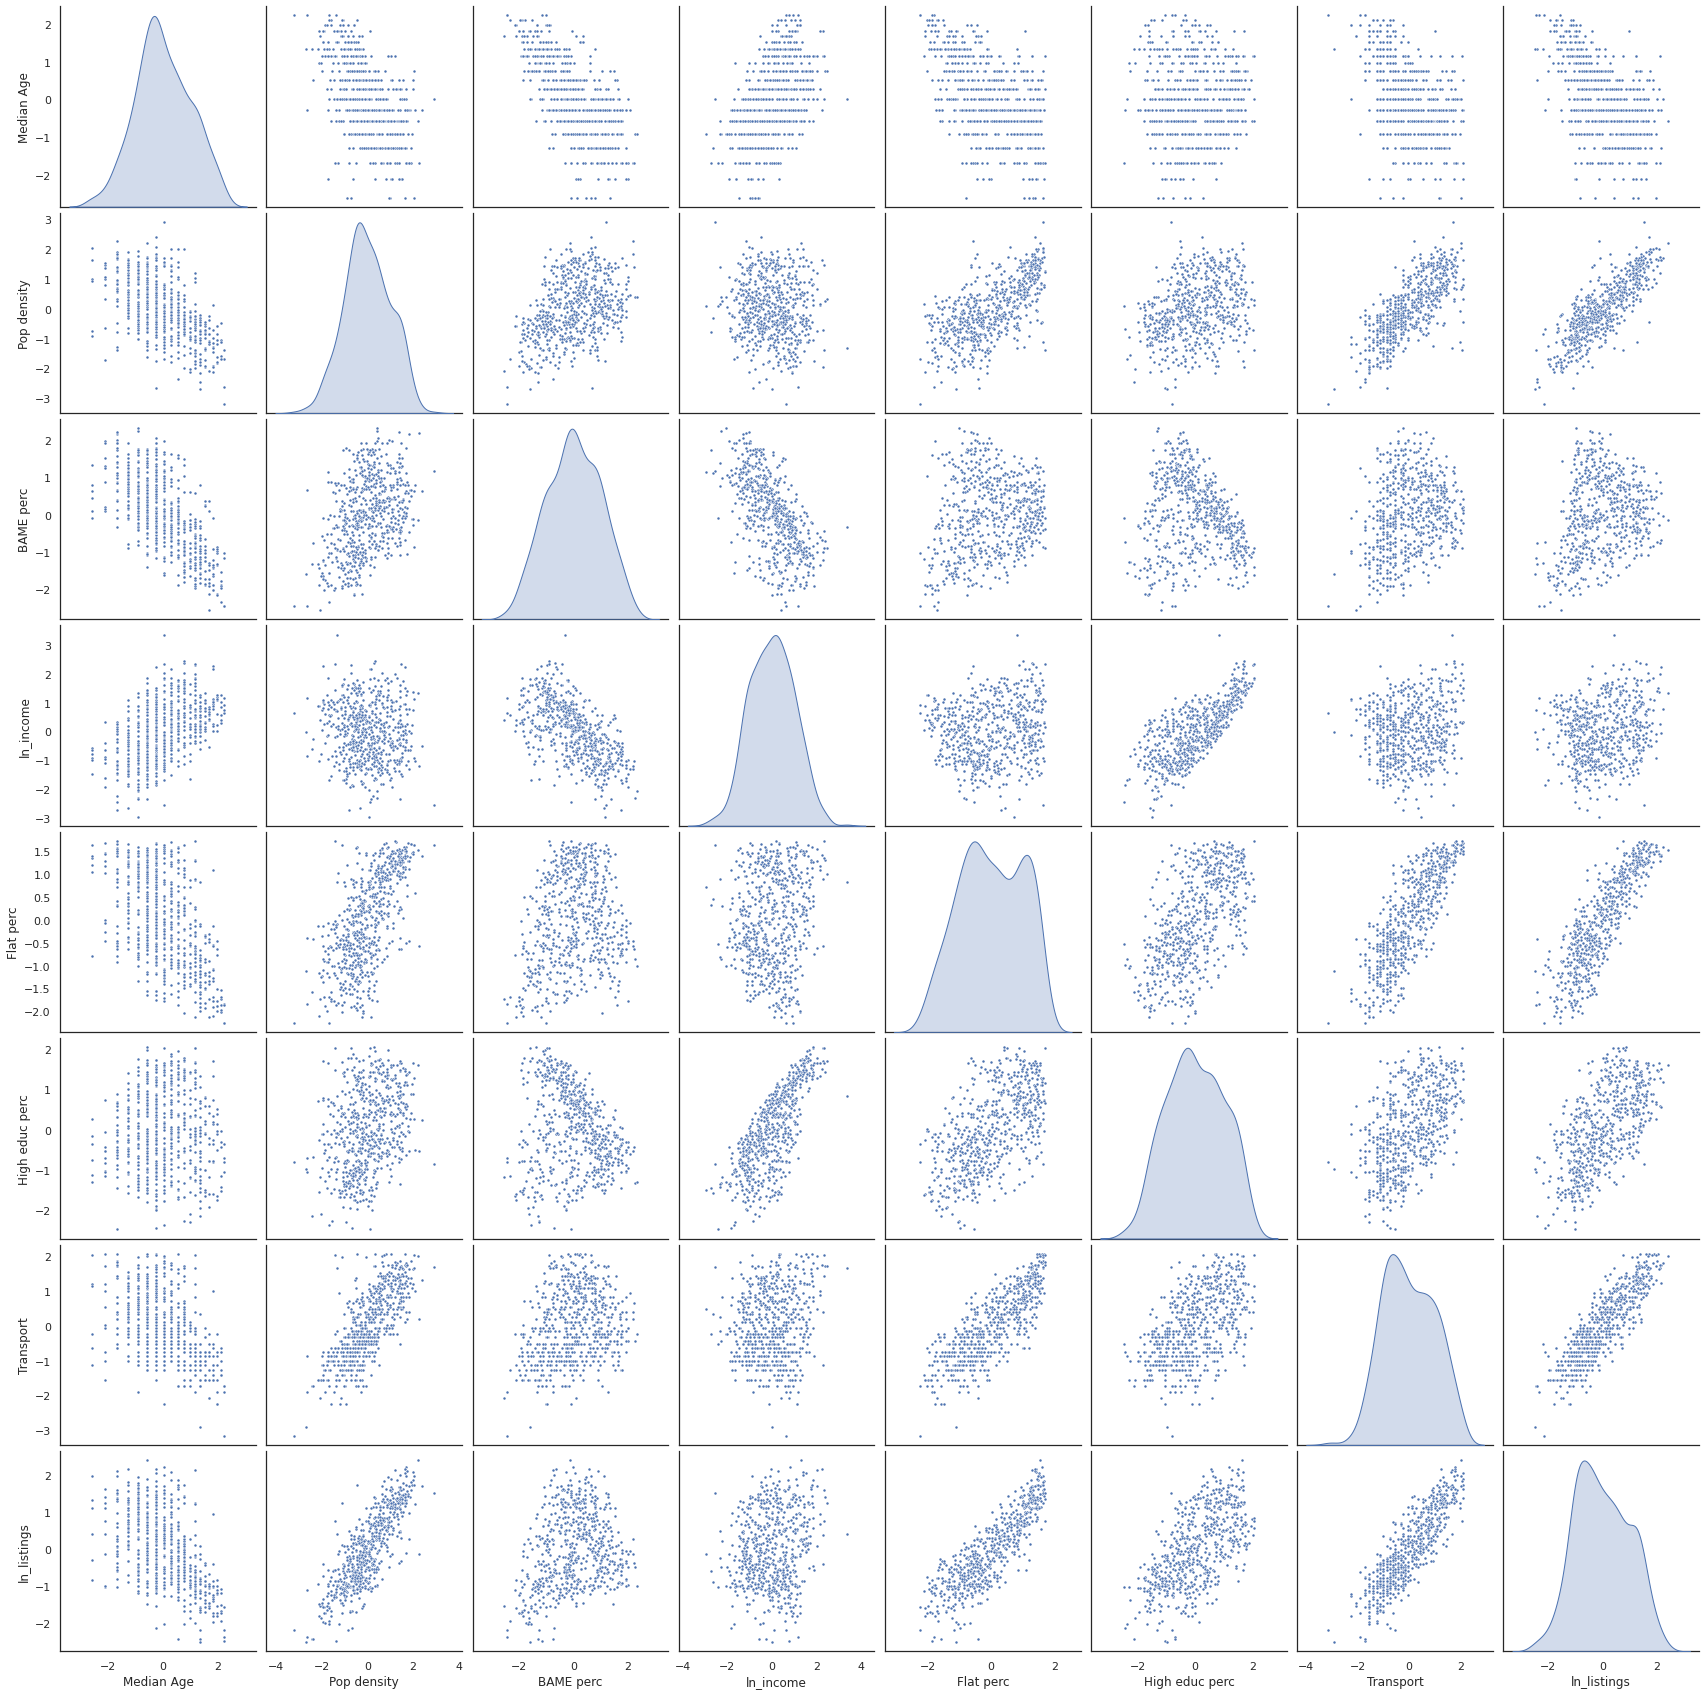

In [712]:
sns.set(style="white")
sns.pairplot(clustB, markers=".", height=3, diag_kind='kde');

In [727]:
columns=['Median Age', 'Pop density', 'BAME perc', 'Flat perc', 'High educ perc',
       'Transport', 'ln_income', 'ln_listings']

In [743]:
#import the necessary module
from sklearn.cluster import AgglomerativeClustering

#create the model setting the number of clusters 
model = AgglomerativeClustering(linkage="ward", distance_threshold = 75 , n_clusters=None)
#fit the model to the data
model.fit(clustB)


AgglomerativeClustering(distance_threshold=75, n_clusters=None)

In [744]:
# add the cluster membership back to the dataframe
London_profiles["Aggl_clus"] = model.labels_


In [733]:
London_profiles

last_review                     NAME   GSS_CODE  HECTARES  LB_GSS_CD  \
0       2021-10-09       Chessington South  E05000405    755.17  E09000021   
10      2021-03-20  Tolworth and Hook Rise  E05000414    259.46  E09000021   
17      2021-09-09              Berrylands  E05000401    145.39  E09000021   
35      2020-02-16               Alexandra  E05000400    268.51  E09000021   
44      2019-02-17                Beverley  E05000402    187.82  E09000021   
...            ...                     ...        ...       ...        ...   
48600   2019-10-05               Whalebone  E05000042    155.40  E09000002   
48605   2021-09-13               Eastbrook  E05000030    345.06  E09000002   
48611   2021-09-13          Chadwell Heath  E05000029    338.42  E09000002   
48622   2017-11-29                Parsloes  E05000037    124.38  E09000002   
48626   2018-07-08          City of London  E09000001    314.94  E09000001   

                    BOROUGH  \
0      Kingston upon Thames   
10     Kingston upon Thames   
17     Kingston upon Thames   
35     Kingston upon Thames   
44     Kingston upon Thames   
...                     ...   
48600  Barking and Dagenham   
48605  Barking and Dagenham   
48611  Barking and Dagenham   
48622  Barking and Dagenham   
48626        City of London   

                                                geometry  listings_count  \
0      POLYGON ((516401.600 160201.800, 516407.300 16...              10   
10     POLYGON ((517829.600 165447.100, 517837.100 16...               7   
17     POLYGON ((518107.500 167303.400, 518114.300 16...              18   
35     POLYGON ((520480.000 166909.800, 520490.700 16...               9   
44     POLYGON ((522071.000 168144.900, 522063.900 16...              27   
...                                                  ...             ...   
48600  POLYGON ((549410.700 187450.700, 549391.200 18...               5   
48605  POLYGON ((549991.500 184928.500, 549988.900 18...               6   
48611  POLYGON ((547715.200 187914.200, 547712.500 18...              11   
48622  POLYGON ((547381.600 185753.600, 547377.500 18...               4   
48626  POLYGON ((531361.300 180691.000, 531313.200 18...             248   

       listings_density  Median Age  Pop density  BAME perc  Median income  \
0                  0.01       37.00     1,375.00      13.00      38,310.00   
10                 0.03       36.00     3,961.50      27.20      37,840.00   
17                 0.12       36.00     6,466.70      18.10      42,330.00   
35                 0.03       39.00     3,537.00      29.80      41,390.00   
44                 0.14       37.00     5,447.40      32.60      40,700.00   
...                 ...         ...          ...        ...            ...   
48600              0.03       34.00     6,781.30      44.00      37,180.00   
48605              0.02       36.00     3,028.60      24.80      37,400.00   
48611              0.03       34.00     2,985.30      37.90      33,920.00   
48622              0.03       33.00     8,250.00      30.90      31,860.00   
48626              0.79       39.00     2,538.10      21.40      63,620.00   

       Flat perc  High educ perc  Transport  labels  ln_income  ln_listings  \
0          20.90           25.30       2.40       5      10.55        -4.32   
10         22.00           30.00       2.30       5      10.54        -3.61   
17         54.70           48.40       2.80       4      10.65        -2.09   
35         12.00           32.70       2.20       5      10.63        -3.40   
44         30.40           41.70       2.80       4      10.61        -1.94   
...          ...             ...        ...     ...        ...          ...   
48600      27.80           22.40       2.90       2      10.52        -3.44   
48605      18.40           18.50       2.30       5      10.53        -4.05   
48611      34.50           19.50       2.30       2      10.43        -3.43   
48622      12.60           16.00       2.70       2     

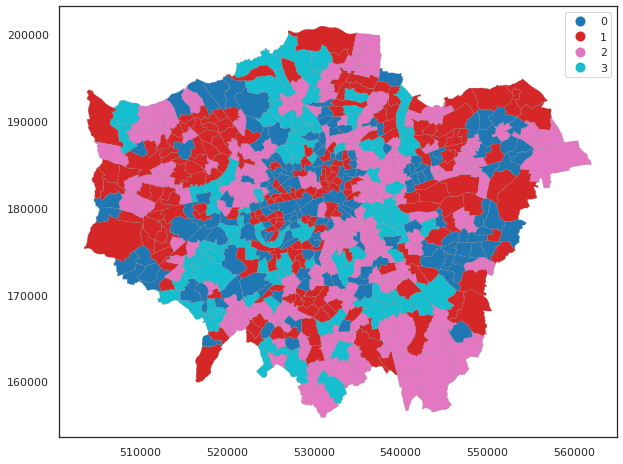

In [745]:
# map the clusters

London_profiles.plot(column='Aggl_clus',categorical = True, legend=True,
          edgecolor='grey',linewidth=0.2, figsize=(10,8));

ax.set_axis_off()

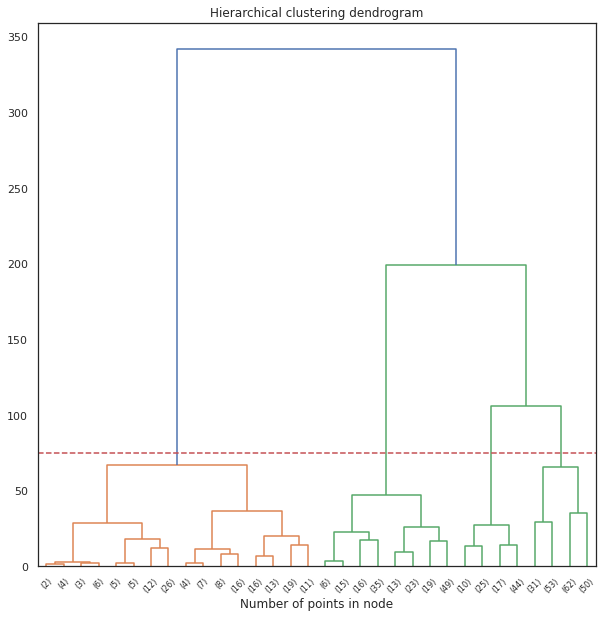

In [746]:
# the code below was copied from Philip Wilkinson: https://github.com/PhilipDW183/London_crime_clusters/blob/main/London_Crime.ipynb 

import numpy as np
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):
    
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count +=1
            else:
                current_count += counts[child_idx-n_samples]
        counts[i] = current_count
        
    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                     counts]).astype(float)
    
    dendrogram(linkage_matrix, **kwargs)

fig, ax = plt.subplots(figsize = (10,10))
ax.set_title("Hierarchical clustering dendrogram")
#plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p=4)
plt.axhline(y = 75, color = "r", linestyle = "--")
ax.set_xlabel("Number of points in node")
plt.show()

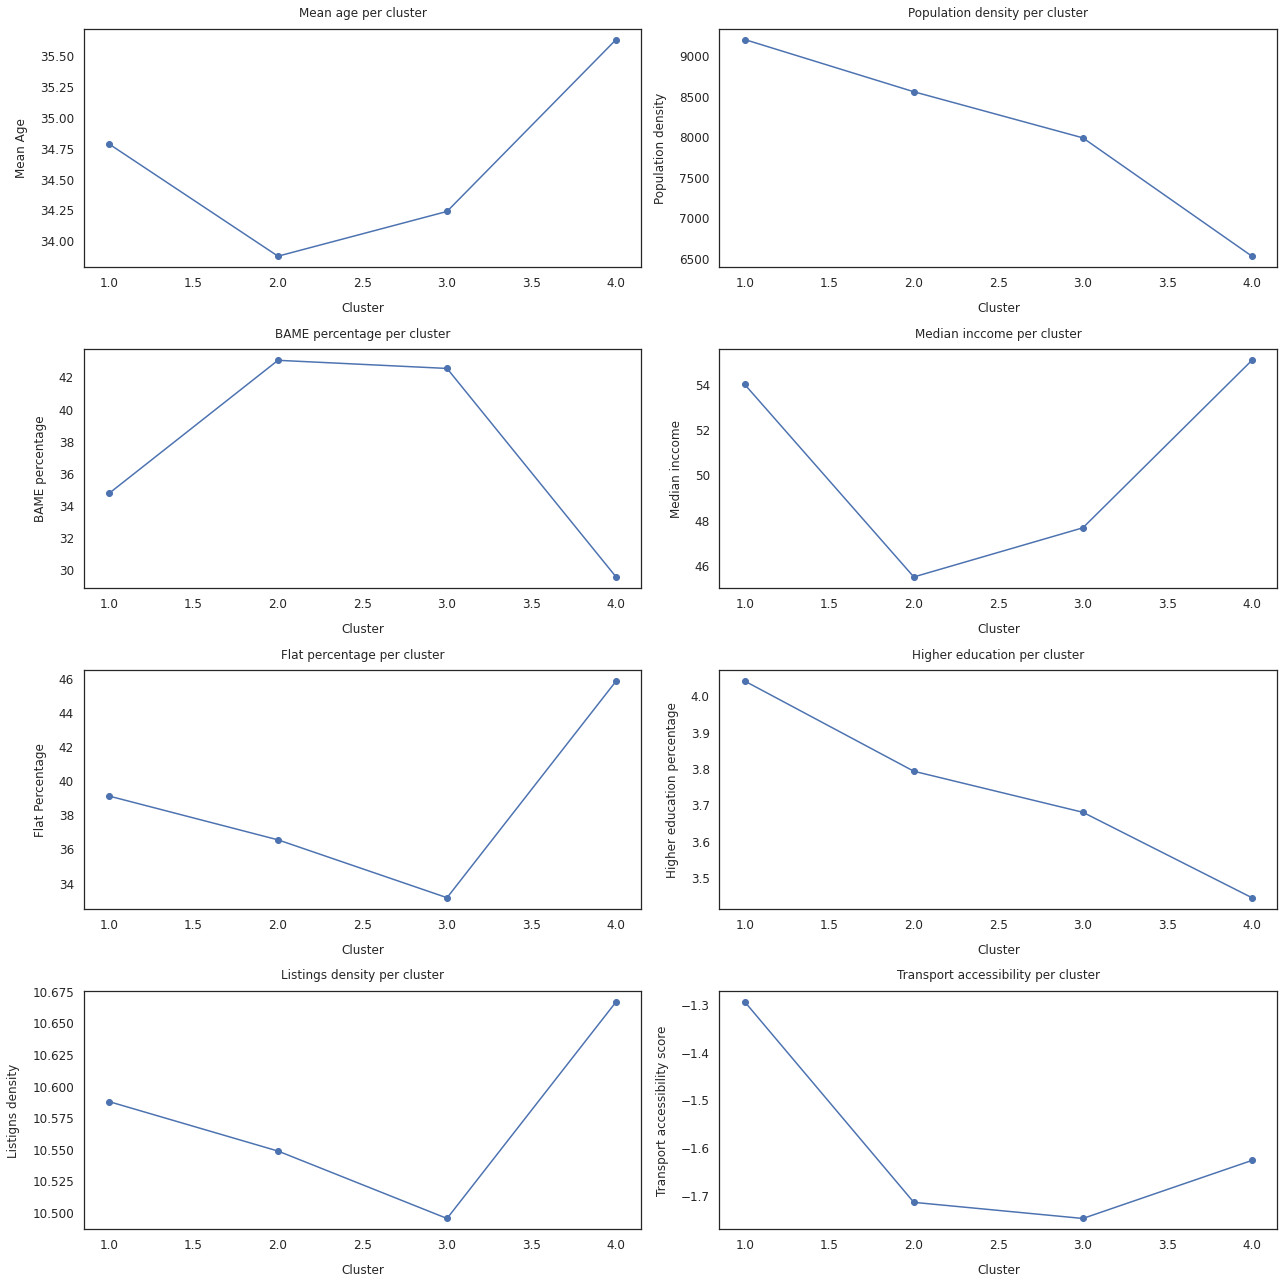

In [748]:
#creating plots for the results to understand the means


#set the titles
titles = [ "Mean age per cluster",
              "Population density per cluster",
              "BAME percentage per cluster",
              "Median inccome per cluster",
              "Flat percentage per cluster",
              "Higher education per cluster",
              "Listings density per cluster",
              "Transport accessibility per cluster" ]
#set the labels
ylabels = ["Mean Age", 
              "Population density",
              "BAME percentage",
              "Median inccome",
              "Flat Percentage",
              "Higher education percentage",
              "Listigns density",
              "Transport accessibility score"]
#extract the cluster labels and add these back to the data
labels = model.labels_
London_profiles["labels"] = labels
London_profiles["labels"] = London_profiles["labels"] + 1

#create a base plot
fig, ax = plt.subplots(4,2, figsize = (18,18))
#flatten the axis
axis = ax.flatten()

#iterate over each column to create plots for each 
for i, col in enumerate(columns):
    #create an empty dictionary
    col_dict = {}
     #iterate over each label
        
    for label in London_profiles["labels"].unique().tolist():
        #crete a new dataframe for each label
        label_df = London_profiles[London_profiles["labels"] == label]
        #add the mean to the dataframe
        col_dict[label] = label_df[col].mean()
    #convert the dictionary to a dataframe
    column_df = pd.DataFrame.from_dict(col_dict, orient = "index")
    #reset the index
    column_df.reset_index(inplace=True)
    #sort the values by the index
    column_df.sort_values(by = "index", inplace=True)

        #plot the results
    axis[i].plot(column_df["index"], column_df[0],
                marker = "o")
    
    #set the plots up
    axis[i].set_title(titles[i], fontsize = 12, pad = 12)
    axis[i].set_xlabel("Cluster", fontsize = 12, labelpad = 12)
    axis[i].set_ylabel(ylabels[i], fontsize =12, labelpad = 12)
    axis[i].tick_params(axis = "both", labelsize = 12)


#set the layout to tight so no overalp
plt.tight_layout()

In [749]:
London_profiles

last_review                     NAME   GSS_CODE  HECTARES  LB_GSS_CD  \
0       2021-10-09       Chessington South  E05000405    755.17  E09000021   
10      2021-03-20  Tolworth and Hook Rise  E05000414    259.46  E09000021   
17      2021-09-09              Berrylands  E05000401    145.39  E09000021   
35      2020-02-16               Alexandra  E05000400    268.51  E09000021   
44      2019-02-17                Beverley  E05000402    187.82  E09000021   
...            ...                     ...        ...       ...        ...   
48600   2019-10-05               Whalebone  E05000042    155.40  E09000002   
48605   2021-09-13               Eastbrook  E05000030    345.06  E09000002   
48611   2021-09-13          Chadwell Heath  E05000029    338.42  E09000002   
48622   2017-11-29                Parsloes  E05000037    124.38  E09000002   
48626   2018-07-08          City of London  E09000001    314.94  E09000001   

                    BOROUGH  \
0      Kingston upon Thames   
10     Kingston upon Thames   
17     Kingston upon Thames   
35     Kingston upon Thames   
44     Kingston upon Thames   
...                     ...   
48600  Barking and Dagenham   
48605  Barking and Dagenham   
48611  Barking and Dagenham   
48622  Barking and Dagenham   
48626        City of London   

                                                geometry  listings_count  \
0      POLYGON ((516401.600 160201.800, 516407.300 16...              10   
10     POLYGON ((517829.600 165447.100, 517837.100 16...               7   
17     POLYGON ((518107.500 167303.400, 518114.300 16...              18   
35     POLYGON ((520480.000 166909.800, 520490.700 16...               9   
44     POLYGON ((522071.000 168144.900, 522063.900 16...              27   
...                                                  ...             ...   
48600  POLYGON ((549410.700 187450.700, 549391.200 18...               5   
48605  POLYGON ((549991.500 184928.500, 549988.900 18...               6   
48611  POLYGON ((547715.200 187914.200, 547712.500 18...              11   
48622  POLYGON ((547381.600 185753.600, 547377.500 18...               4   
48626  POLYGON ((531361.300 180691.000, 531313.200 18...             248   

       listings_density  Median Age  Pop density  BAME perc  Median income  \
0                  0.01       37.00     1,375.00      13.00      38,310.00   
10                 0.03       36.00     3,961.50      27.20      37,840.00   
17                 0.12       36.00     6,466.70      18.10      42,330.00   
35                 0.03       39.00     3,537.00      29.80      41,390.00   
44                 0.14       37.00     5,447.40      32.60      40,700.00   
...                 ...         ...          ...        ...            ...   
48600              0.03       34.00     6,781.30      44.00      37,180.00   
48605              0.02       36.00     3,028.60      24.80      37,400.00   
48611              0.03       34.00     2,985.30      37.90      33,920.00   
48622              0.03       33.00     8,250.00      30.90      31,860.00   
48626              0.79       39.00     2,538.10      21.40      63,620.00   

       Flat perc  High educ perc  Transport  labels  ln_income  ln_listings  \
0          20.90           25.30       2.40       2      10.55        -4.32   
10         22.00           30.00       2.30       2      10.54        -3.61   
17         54.70           48.40       2.80       4      10.65        -2.09   
35         12.00           32.70       2.20       3      10.63        -3.40   
44         30.40           41.70       2.80       3      10.61        -1.94   
...          ...             ...        ...     ...        ...          ...   
48600      27.80           22.40       2.90       3      10.52        -3.44   
48605      18.40           18.50       2.30       2      10.53        -4.05   
48611      34.50           19.50       2.30       1      10.43        -3.43   
48622      12.60           16.00       2.70       3     

In [747]:


agglom_means_T.reset_index(inplace=True)

#get the colours
colors = ["blue", "red", "pink", "tab:cyan"]

#create subplots for each cluster
fig, ax = plt.subplots(1,4, figsize = (15,8), sharey = True, sharex = True)
#flatten the axis
axis = ax.flatten()

#going over each column
for i, col  in enumerate(agglom_means_T.columns):
    #ignore the index column
    if col != "index":
        ax = axis[i-1]
        #plot the bar chart
        ax.bar(height = agglom_means_T[col], x=agglom_means_T["index"], color = colors[i-1] )
        #rotate the x-ticks
        ax.set_xticklabels(labels =agglom_means_T["index"], rotation = 90)
        #set the title
        ax.set_title(f"Cluster {col}", fontsize = 20)



NameError: name 'agglom_means_T' is not defined

In [604]:
London_profiles["labels"].unique().tolist()

[1, 2, 3]